In [1]:
# In this script we leave out the results of SAM 5% and ptensor, and make the plots look better for printing

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
from matplotlib.font_manager import FontProperties
from fractions import Fraction
from scipy.interpolate import interp1d
import os

In [4]:
ResultsFolder='/Users/burbol2/Desktop/NewVersion4_copies_delete'
FolderForPlots = ResultsFolder + "/plots"
plotsfolder = ResultsFolder + "/plots"

In [5]:
percentages = [0, 5, 11, 17, 21, 25, 33, 41, 50,66]
Waters=[2000, 3000, 4000, 5000, 6500, 7000, 8000, 9000]

mac_theta_w = np.zeros(len(percentages))
sigma_w = np.zeros(len(percentages))

#mac_theta_m = np.zeros(len(percentages))
#sigma_m = np.zeros(len(percentages))

mac_theta_s = np.zeros(len(percentages))
sigma_s = np.zeros(len(percentages))

# In the following dictionaries we will save the raw input data
angles_w = {}
radii_w = {}

#angles_m = {}
#radii_m = {}

angles_s = {}
radii_s = {}

# In the following dictionaries we will save the results for the cos(theta) and 1/r_base, and their errorbars. 
# We will call them the "results-dictionaries"
theta_w = {}
rbase_w = {}
errortheta_w = {}
error_rbase_w = {}
start_theta_w = {}
end_theta_w = {}
start_rbase_w = {}
end_rbase_w = {}
equil_theta_w = {}
equil_rbase_w = {}

#theta_m = {}
#rbase_m = {}
#errortheta_m = {}
#error_rbase_m = {}
#start_theta_m = {}
#end_theta_m = {}
#start_rbase_m = {}
#end_rbase_m = {}
#equil_theta_m = {}
#equil_rbase_m = {}

theta_s = {}
rbase_s = {}
errortheta_s = {}
error_rbase_s = {}
start_theta_s = {}
end_theta_s = {}
start_rbase_s = {}
end_rbase_s = {}
equil_theta_s = {}
equil_rbase_s = {}

# For each surface we will store 10 results corresponding to the 10 droplets in each system. This means that in every 
# entry of the "results-dictionaries" we will store a list of 10 elements. Thus, now we store in them lists with 10 zeros. 

for system in percentages:
    
    theta_w[system] = []
    rbase_w[system] = []
    errortheta_w[system] = []
    error_rbase_w[system] = []
    start_theta_w[system] = []
    end_theta_w[system] = []
    start_rbase_w[system] = []
    end_rbase_w[system] = []
    equil_theta_w[system] = []
    equil_rbase_w[system] = []
    
    #theta_m[system] = []
    #rbase_m[system] = []
    #errortheta_m[system] = []
    #error_rbase_m[system] = []
    #start_theta_m[system] = []
    #end_theta_m[system] = []
    #start_rbase_m[system] = []
    #end_rbase_m[system] = []
    #equil_theta_m[system] = []
    #equil_rbase_m[system] = []
    
    theta_s[system] = []
    rbase_s[system] = []
    errortheta_s[system] = []
    error_rbase_s[system] = []
    start_theta_s[system] = []
    end_theta_s[system] = []
    start_rbase_s[system] = []
    end_rbase_s[system] = []
    equil_theta_s[system] = []
    equil_rbase_s[system] = []

In [6]:
# We create an array named "t" with the time values. We use the length of the longest simulation.

maxlength=100 #maximum length in ns
t = np.zeros(2*maxlength)
i=0
for d in frange(0, maxlength, 0.5,closed=0):
    t[i] = d
    i = i + 1

In [7]:
# We save the data in the arrays "theta_all" and "rbase_all"
SAMs=[0,5,11,17,21,25,33,41] # Here we use only the SAMs with Contact Angles. Not the systems with complete wetting.

# Here we create two dictionaries named "angles" and "radii". Each dictionary consists of a set of "key: value" pairs, each one corresponding to a different system. The keys are (also) a pair of numbers "b, c".
# "b" refers to the OH-coverage percentage of the SAM, and "c" to the number of water molecules of the droplet. For example, the key "5, 1000" refers to the system with a surface with 5% OH-coverage, 
# and a droplet with 1000 water molecules. The value corresponding to each key is an array with the 40 calculated angles/base radii, that belong to that system. For example: "radii[(11, 3000)]" would give back
# the array with the 40 calculated values of the base radii corresponding to the system with a surface with 11% OH-coverage, and a droplet with 3000 water molecules.
os.chdir(ResultsFolder)
for b in SAMs:
    theta_data_w, rbase_data_w = np.loadtxt('Contact_Angles2_WaterPeak_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    #theta_data_m, rbase_data_m = np.loadtxt('Contact_Angles2_MiddlePoint_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    #theta_data_m, rbase_data_m = np.loadtxt('Contact_Angles2_GDS_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    theta_data_s, rbase_data_s = np.loadtxt('Contact_Angles2_SAMPeak_s'+str(b)+'.txt', skiprows=2, usecols = (0,1),unpack=True)
    k = 0
    for c in Waters:
        # First data with z=0 at the first water peak
        z = b, c
        th_w = [0] *(2*maxlength)
        r_w = [0] *(2*maxlength)
        #th_m = [0] *(2*maxlength)
        #r_m = [0] *(2*maxlength)
        th_s = [0] *(2*maxlength)
        r_s = [0] *(2*maxlength)
        i=k*(2*maxlength)
        j=(k+1)*(2*maxlength)
        #print "z=", z, "i=", i, "j=", j
        m = 0
        for l in range(i,j):
            th_w[m]=theta_data_w[l]
            r_w[m]=rbase_data_w[l]
            m = m +1
        angles_w[z] = th_w
        radii_w[z] = r_w
        
        #m = 0
        #for l in range(i,j):
        #    th_m[m]=theta_data_m[l]
        #    r_m[m]=rbase_data_m[l]
        #    m = m +1
        #angles_m[z] = th_m
        #radii_m[z] = r_m
        
        m = 0
        for l in range(i,j):
            th_s[m]=theta_data_s[l]
            r_s[m]=rbase_data_s[l]
            m = m +1
        angles_s[z] = th_s
        radii_s[z] = r_s

        k=k+1
os.chdir(FolderForPlots)

In [8]:
# Print some values as a test
z=5,8000
w=11
print angles_w[z][w]
#print angles_m[z][w]
print angles_s[z][w]
print radii_w[z][w]
#print radii_m[z][w]
print radii_s[z][w]

132.007928842
139.23052041
2.90863929034
2.55625355621


In [9]:
# func is the function of a line, that will be used in the linear fits
def func(x, a, b):
    return a*x + b

#endpoint returns the integer "end": the last data point different then "nan"
def endpoint(theta):
	for end in range(20, len(theta)):
		 if math.isnan(theta[end]):
			    break
	return (end-1)

# The following functions will be used to calculate the block averages and the errorbars
# The function naive_variance will only be used inside the function blockAverage
def naive_variance(data):
    n = 0
    Sum = 0
    Sum_sqr = 0
 
    for x in data:
        n = n + 1
        Sum = Sum + x
        Sum_sqr = Sum_sqr + x*x
 
    variance = (Sum_sqr - (Sum*Sum)/n)/(n - 1)
    return variance

def blockAverage(datastream, Nblocks):
    
    # FIRST WE CREATE AN ARRAY TO STORE THE MEAN VALUES OF THE DATA BLOCKS (blockMean)
    blockMean = np.zeros(Nblocks)  
        
    # Nobs is the number of points (observations) in our data
    Nobs = len(datastream) 
    # BlockSize is the size of each block of data
    BlockSize = int(Nobs//Nblocks) 
    #print "BlockSize=", BlockSize
    
    if Nblocks==1:
        errorbar = naive_variance(datastream)
        return errorbar

    else:
       # WE CALCULATE IN A LOOP THE MEAN VALUES OF EACH DATA BLOCK (blockMean)
        for i in range(0,Nblocks-1):
            ibeg = i*BlockSize
            iend = (i+1)*BlockSize
            blockMean[i] = mean(datastream[ibeg:iend])
        # WE TREAT THE LAST BLOCK SEPARATELY, BECAUSE WE HAVE TO TAKE INTO ACCOUNT THE POSSIBLE REMAINING POINTS 
        # WHEN THE NUMBER OF DATA POINTS ISN'T A MULTIPLE OF THE NUMBER OF BLOCKS
        #print "Last block"
        ibeg = (Nblocks-1)*BlockSize
        iend = Nobs
        blockMean[Nblocks-1] = mean(datastream[ibeg:iend])
     
        errorbar = (np.std(blockMean))/sqrt(Nblocks -1) #np.std(blockMean) is the standard deviation of blockMean
        simulavr = mean(blockMean)
        return simulavr, errorbar

#best_start SEARCHS FOR THE STARTING POINT (start) OF BIGGEST TIME INTERVAL where the error interval is smaller then the variation of the data (controlled 
# with a line fit of the data
def best_start(theta,t,omitstart,fixend):

	lastnumber = endpoint(theta)
	endblocks = lastnumber - fixend

	error = np.zeros(endblocks-omitstart) #error will be the total error (of all the points taken each time we choose a different set of data to make the blocks)
	average = np.zeros(endblocks-omitstart) # average is the same, but for the average
	
	slope = np.zeros(endblocks-omitstart)
	intercept = np.zeros(endblocks-omitstart)
	shift = np.zeros(endblocks-omitstart)
	goodblocks = []

	error = error.tolist()
	j=0
	# Loop for finding the "best" interval to do the block averaging
	for i in range (omitstart, endblocks):
		average[j],error[j] = blockAverage((theta[i:lastnumber]),3)
		slope[j], intercept[j], delete1, delete2, delete3 = stats.linregress(t[i:lastnumber],theta[i:lastnumber])
		shift[j] = abs(func(t[i], slope[j], intercept[j]) - func(t[lastnumber], slope[j], intercept[j]))
		if shift[j] <= (2*error[j]):
			goodblocks.append(i)
			#print "i=",i, "shift=",shift[j], "error=",2*error[j]
		j = j+1	 
	if goodblocks==[]:
		#print "not equilibrated yet"
		return None
	else:
		#start = min(goodblocks)+ omitstart
		print "num of good intervals=", len(goodblocks)
		start = min(goodblocks)
		return start

In [10]:
'''
Documentation on adjusting the subplots:
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

********************************************************************
For adjusting the legend box:

Padding and spacing between various elements use following
keywords parameters. These values are measure in font-size
units. E.g., a fontsize of 10 points and a handlelength=5
implies a handlelength of 50 points.  Values from rcParams
will be used if None.

=====================================================================
Keyword       |    Description
=====================================================================
borderpad          the fractional whitespace inside the legend border
labelspacing       the vertical space between the legend entries
handlelength       the length of the legend handles
handletextpad      the pad between the legend handle and text
borderaxespad      the pad between the axes and legend border
columnspacing      the spacing between columns
'''

'\nDocumentation on adjusting the subplots:\nsubplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)\n\nleft  = 0.125  # the left side of the subplots of the figure\nright = 0.9    # the right side of the subplots of the figure\nbottom = 0.1   # the bottom of the subplots of the figure\ntop = 0.9      # the top of the subplots of the figure\nwspace = 0.2   # the amount of width reserved for blank space between subplots\nhspace = 0.2   # the amount of height reserved for white space between subplots\n\n********************************************************************\nFor adjusting the legend box:\n\nPadding and spacing between various elements use following\nkeywords parameters. These values are measure in font-size\nunits. E.g., a fontsize of 10 points and a handlelength=5\nimplies a handlelength of 50 points.  Values from rcParams\nwill be used if None.\n\n=====================================================================\nKeyword       |    Desc

In [11]:
rcParams['text.usetex'] = True
matplotlib.rcParams['legend.markerscale'] = 0
matplotlib.rcParams['legend.handletextpad'] = 0.1
matplotlib.rcParams['legend.markerscale'] = 2 
matplotlib.rcParams['legend.numpoints'] = 1
matplotlib.rcParams['font.family'] = 'Times New Roman Bold' 
pyplot.rcParams.update({'legend.labelspacing':0.25})

#Direct input 
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 


'''
#COPIED FROM INTERNET AND USED IN LAST CELL:
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 
'''

'\n#COPIED FROM INTERNET AND USED IN LAST CELL:\nplt.rcParams[\'text.latex.preamble\']=[r"\\usepackage{lmodern}"]\n#Options\nparams = {\'text.usetex\' : True,\n          \'font.size\' : 11,\n          \'font.family\' : \'lmodern\',\n          \'text.latex.unicode\': True,\n          }\nplt.rcParams.update(params) \n'

In [12]:
#function copied from internet to plot with axes in radians
def create_pi_labels(a, b, step):

    max_denominator = int(1/step)
    # i added this line and the .limit_denominator to solve an 
    # issue with floating point precision
    # because of floataing point precision Fraction(1/3) would be 
    # Fraction(6004799503160661, 18014398509481984)

    values = np.arange(a, b+step/10, step)
    fracs = [Fraction(x).limit_denominator(max_denominator) for x in values]
    ticks = values*np.pi

    labels = []

    for frac in fracs:
        if frac.numerator==0:
            labels.append(r"$0$")
        elif frac.numerator<0:
            if frac.denominator==1 and abs(frac.numerator)==1:
                labels.append(r"$-\pi$")
            elif frac.denominator==1:
                labels.append(r"$-{}\pi$".format(abs(frac.numerator)))
            else:
                labels.append(r"$-\frac{{{}}}{{{}}} \pi$".format(abs(frac.numerator), frac.denominator))
        else:
            if frac.denominator==1 and frac.numerator==1:
                labels.append(r"$\pi$")
            elif frac.denominator==1:
                labels.append(r"${}\pi$".format(frac.numerator))
            else:
                labels.append(r"$\frac{{{}}}{{{}}} \pi$".format(frac.numerator, frac.denominator))

    return ticks, labels

num of good intervals= 5
for SAM  0 % and  2000  molecules:
num of good intervals= 51
for SAM  0 % and  3000  molecules:
num of good intervals= 20
for SAM  0 % and  4000  molecules:
num of good intervals= 8
for SAM  0 % and  5000  molecules:
num of good intervals= 11
for SAM  0 % and  6500  molecules:
for SAM  0 % and  7000  molecules:
 Not equilibrated!
num of good intervals= 21
for SAM  0 % and  8000  molecules:
num of good intervals= 13
for SAM  0 % and  9000  molecules:


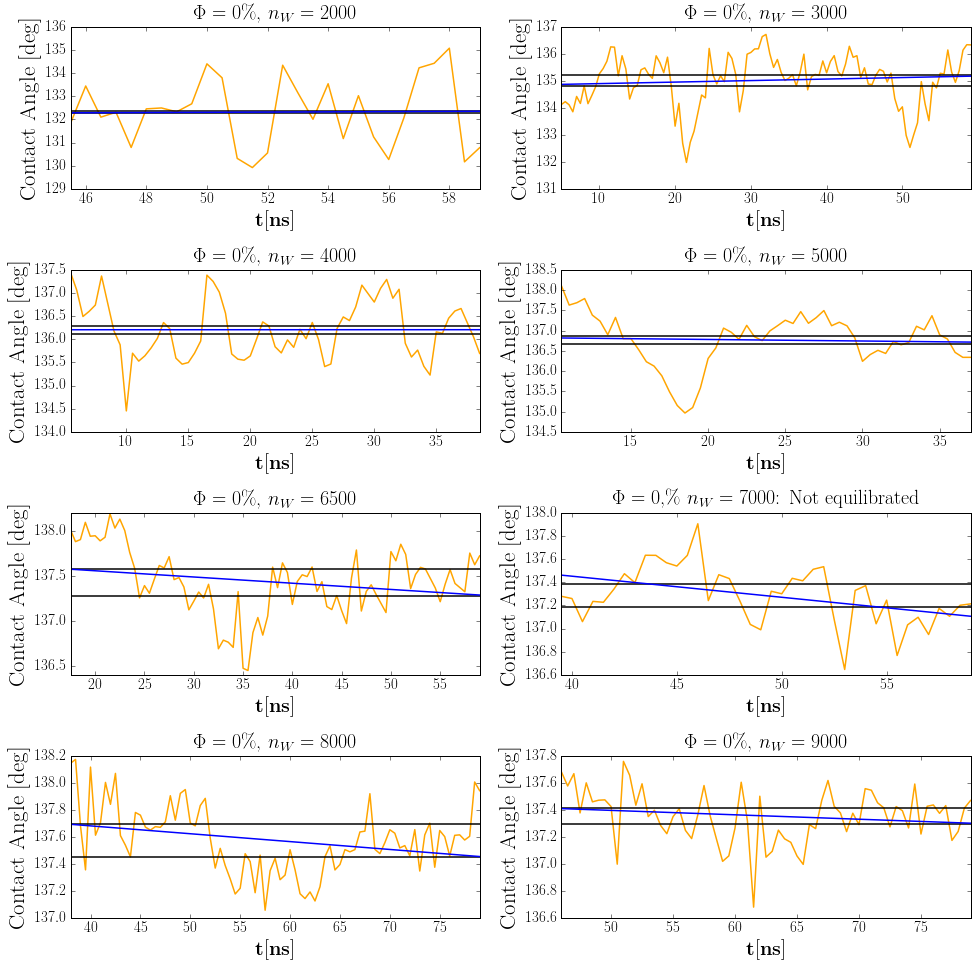

In [13]:
b=0

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

errortheta_w[b]=[]
theta_w[b]=[]
start_theta_w[b]=[]
end_theta_w[b]=[]
equil_theta_w[b]=[]

i = 0
for c in Waters:
    
    n=Waters.index(c)

    theta2 = array(angles_w[(b, c)])
    
    end=endpoint(theta2)
    start=best_start(theta2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(theta2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+',\% $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (errortheta_w[b]).append(errrorbar)
        (theta_w[b]).append(thetamean)
        (start_theta_w[b]).append(start)
        (end_theta_w[b]).append(end)
        (equil_theta_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], theta2[start:end],'-',color='orange',linewidth=1.5)  
    ax.plot(t[start:end], func(t[start:end], 0, thetamean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, thetamean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),'b', label=text,linewidth=1.5)
    
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)

    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    ax.set_xlim([t[start],t[end-1]])    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
plt.show()
fig.savefig('equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
num of good intervals= 5
3000  molec:
num of good intervals= 51
4000  molec:
num of good intervals= 20
5000  molec:
num of good intervals= 8
6500  molec:
num of good intervals= 11
7000  molec:
8000  molec:
num of good intervals= 21
9000  molec:
num of good intervals= 13


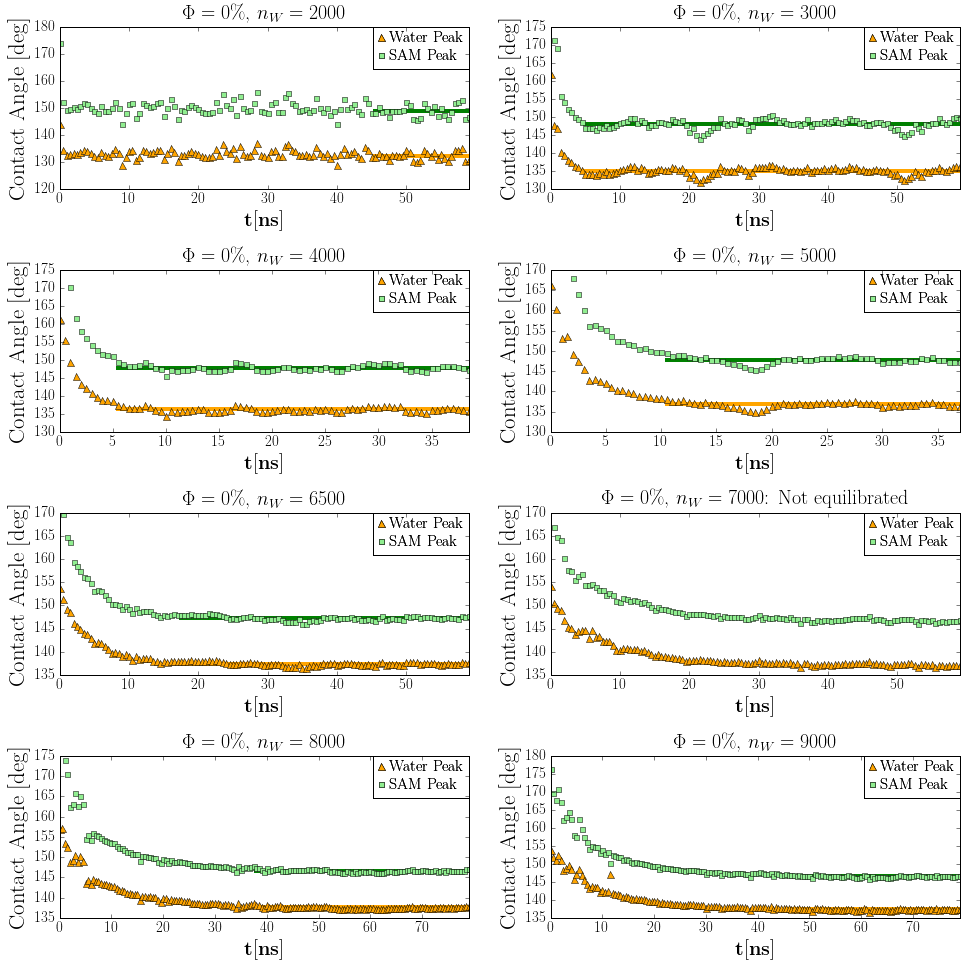

In [14]:
b=0

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#errortheta_m[b]=[]
#theta_m[b]=[]
#start_theta_m[b]=[]
#end_theta_m[b]=[]
#equil_theta_m[b]=[]

errortheta_s[b]=[]
theta_s[b]=[]
start_theta_s[b]=[]
end_theta_s[b]=[]
equil_theta_s[b]=[]

p=0
i = 0
for c in Waters:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    theta2_w = array(angles_w[(b, c)])
    #theta2_m = array(angles_m[(b, c)])
    theta2_s = array(angles_s[(b, c)])
    
    end=endpoint(theta2_w)
    start=best_start(theta2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        thetamean, errrorbar =blockAverage((theta2_w[start:end]),blocksNum) 
        avrg_w = thetamean*avrg_w
        
        #thetamean, errrorbar =blockAverage((theta2_m[start:end]),blocksNum)        
        #avrg_m = thetamean*avrg_m
                
        #(errortheta_m[b]).append(errrorbar)
        #(theta_m[b]).append(thetamean)
        #(start_theta_m[b]).append(start)
        #(end_theta_m[b]).append(end)
        #(equil_theta_m[b]).append(c)
        
        thetamean, errrorbar =blockAverage((theta2_s[start:end]),blocksNum)        
        avrg_s = thetamean*avrg_s
               
        (errortheta_s[b]).append(errrorbar)
        (theta_s[b]).append(thetamean)
        (start_theta_s[b]).append(start)
        (end_theta_s[b]).append(end)
        (equil_theta_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, theta2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, theta2_m,'h', color='gray',label="GDS",markersize=6.0)
    ax.plot(t,theta2_s,'s',label="SAM Peak",color='lightgreen',markersize=5.0)
    ax.set_xlim([t[0],t[end-1]])
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    
    # Create a legend for the first line.
    #first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.2)
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

num of good intervals= 35
for SAM  5 % and  2000  molecules:
num of good intervals= 36
for SAM  5 % and  3000  molecules:
num of good intervals= 30
for SAM  5 % and  4000  molecules:
num of good intervals= 35
for SAM  5 % and  5000  molecules:
num of good intervals= 27
for SAM  5 % and  6500  molecules:
num of good intervals= 18
for SAM  5 % and  7000  molecules:
num of good intervals= 48
for SAM  5 % and  8000  molecules:
num of good intervals= 31
for SAM  5 % and  9000  molecules:


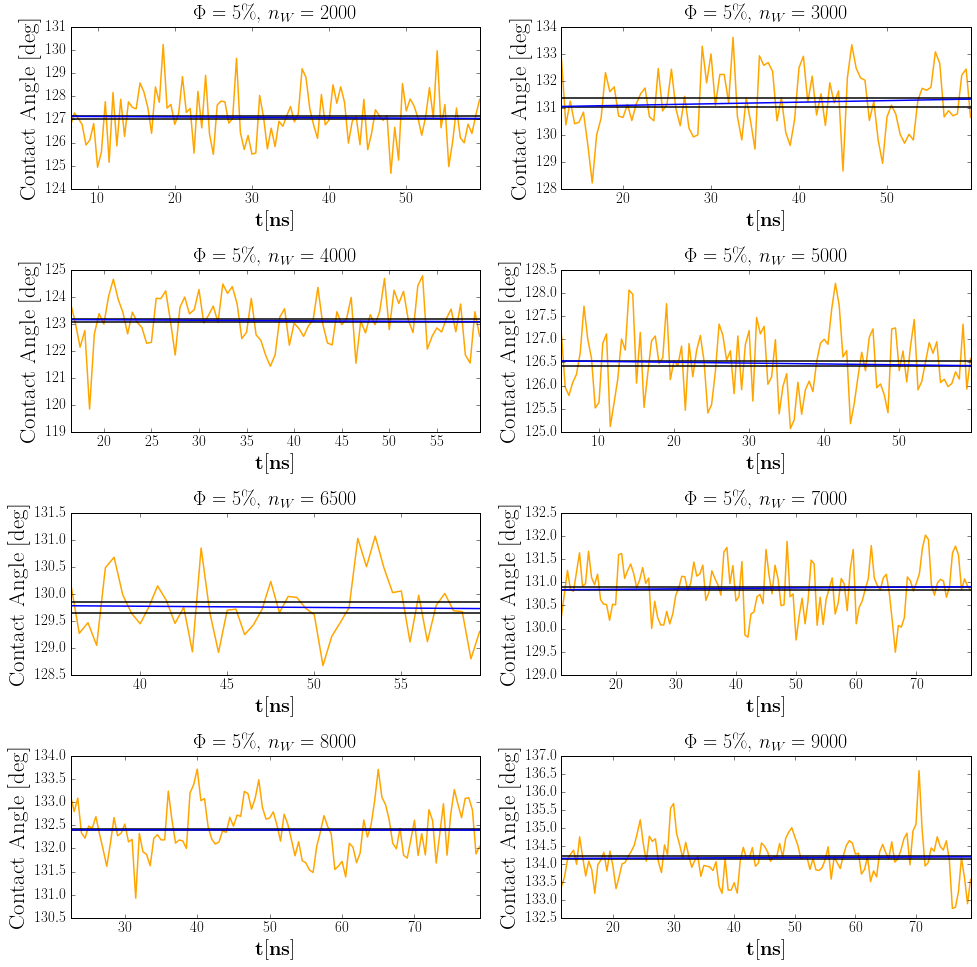

In [15]:
b=5

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

errortheta_w[b]=[]
theta_w[b]=[]
start_theta_w[b]=[]
end_theta_w[b]=[]
equil_theta_w[b]=[]

i = 0
for c in Waters:
    
    n=Waters.index(c)

    theta2 = array(angles_w[(b, c)])
    
    end=endpoint(theta2)
    start=best_start(theta2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(theta2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+',\% $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (errortheta_w[b]).append(errrorbar)
        (theta_w[b]).append(thetamean)
        (start_theta_w[b]).append(start)
        (end_theta_w[b]).append(end)
        (equil_theta_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], theta2[start:end],'-',color='orange',linewidth=1.5)  
    ax.plot(t[start:end], func(t[start:end], 0, thetamean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, thetamean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),'b', label=text,linewidth=1.5)
    
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)

    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    ax.set_xlim([t[start],t[end-1]])    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
plt.show()
fig.savefig('equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
num of good intervals= 35
3000  molec:
num of good intervals= 36
4000  molec:
num of good intervals= 30
5000  molec:
num of good intervals= 35
6500  molec:
num of good intervals= 27
7000  molec:
num of good intervals= 18
8000  molec:
num of good intervals= 48
9000  molec:
num of good intervals= 31


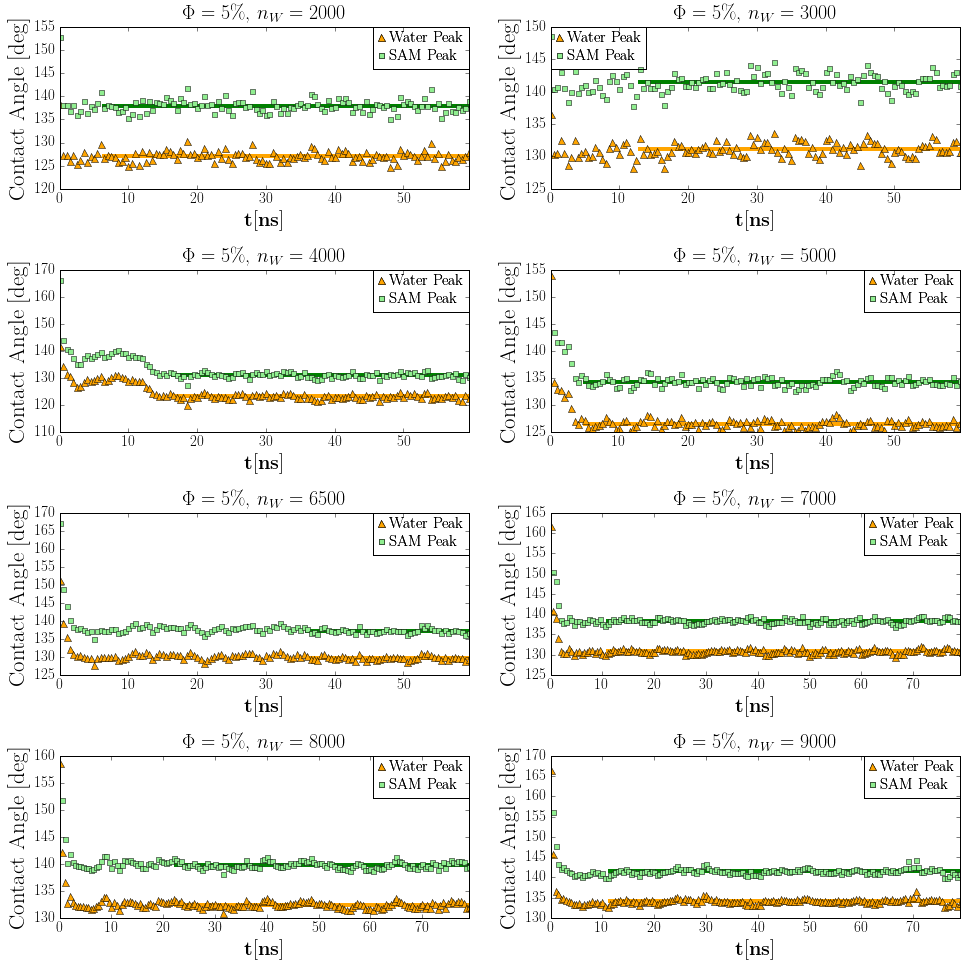

In [16]:
b=5

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#errortheta_m[b]=[]
#theta_m[b]=[]
#start_theta_m[b]=[]
#end_theta_m[b]=[]
#equil_theta_m[b]=[]

errortheta_s[b]=[]
theta_s[b]=[]
start_theta_s[b]=[]
end_theta_s[b]=[]
equil_theta_s[b]=[]

p=0
i = 0
for c in Waters:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    theta2_w = array(angles_w[(b, c)])
    #theta2_m = array(angles_m[(b, c)])
    theta2_s = array(angles_s[(b, c)])
    
    end=endpoint(theta2_w)
    start=best_start(theta2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        thetamean, errrorbar =blockAverage((theta2_w[start:end]),blocksNum) 
        avrg_w = thetamean*avrg_w
        
        #thetamean, errrorbar =blockAverage((theta2_m[start:end]),blocksNum)        
        #avrg_m = thetamean*avrg_m
                
        #(errortheta_m[b]).append(errrorbar)
        #(theta_m[b]).append(thetamean)
        #(start_theta_m[b]).append(start)
        #(end_theta_m[b]).append(end)
        #(equil_theta_m[b]).append(c)
        
        thetamean, errrorbar =blockAverage((theta2_s[start:end]),blocksNum)        
        avrg_s = thetamean*avrg_s
               
        (errortheta_s[b]).append(errrorbar)
        (theta_s[b]).append(thetamean)
        (start_theta_s[b]).append(start)
        (end_theta_s[b]).append(end)
        (equil_theta_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, theta2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, theta2_m,'h', color='gray',label="GDS",markersize=6.0)
    ax.plot(t,theta2_s,'s',label="SAM Peak",color='lightgreen',markersize=5.0)
    ax.set_xlim([t[0],t[end-1]])
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    
    # Create a legend for the first line.
    #first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.2)
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

num of good intervals= 15
for SAM  11 % and  2000  molecules:
num of good intervals= 6
for SAM  11 % and  3000  molecules:
for SAM  11 % and  4000  molecules:
 Not equilibrated!
num of good intervals= 20
for SAM  11 % and  5000  molecules:
num of good intervals= 5
for SAM  11 % and  6500  molecules:
num of good intervals= 28
for SAM  11 % and  7000  molecules:
num of good intervals= 11
for SAM  11 % and  8000  molecules:
num of good intervals= 16
for SAM  11 % and  9000  molecules:


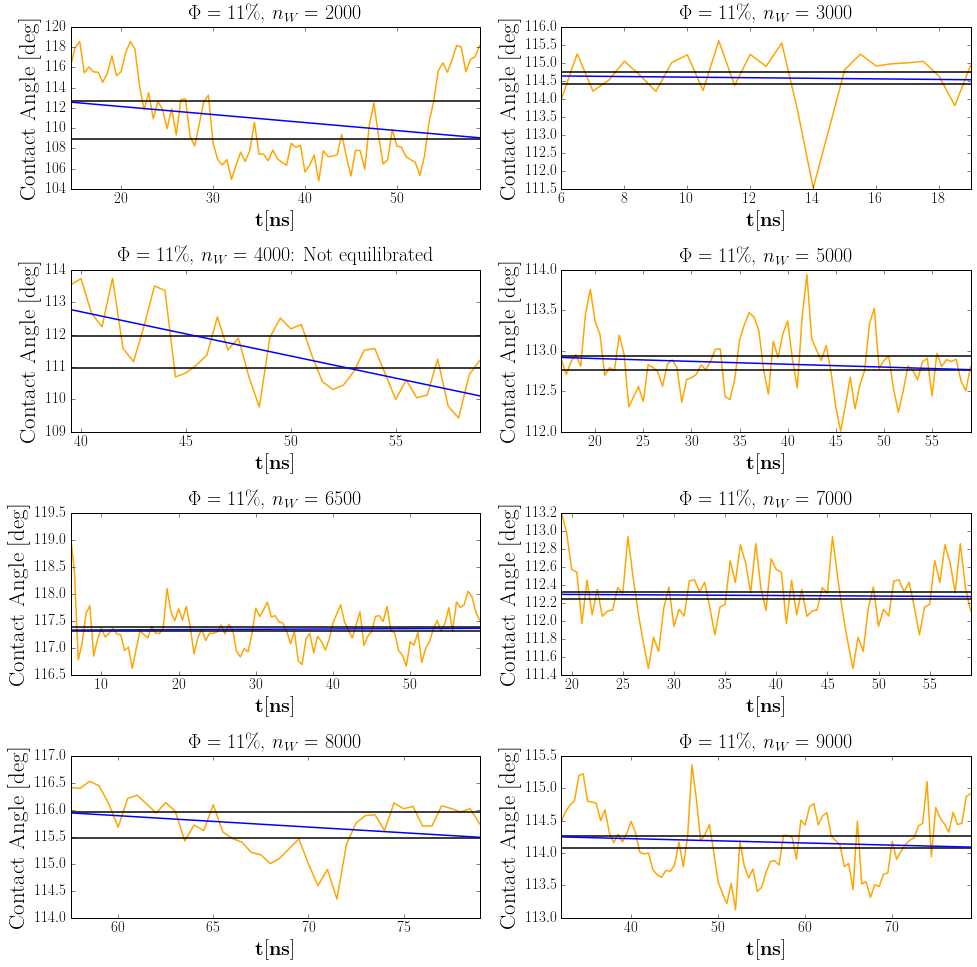

In [17]:
b=11

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

errortheta_w[b]=[]
theta_w[b]=[]
start_theta_w[b]=[]
end_theta_w[b]=[]
equil_theta_w[b]=[]

i = 0
for c in Waters:
    
    n=Waters.index(c)

    theta2 = array(angles_w[(b, c)])
    
    end=endpoint(theta2)
    start=best_start(theta2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(theta2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (errortheta_w[b]).append(errrorbar)
        (theta_w[b]).append(thetamean)
        (start_theta_w[b]).append(start)
        (end_theta_w[b]).append(end)
        (equil_theta_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], theta2[start:end],'-',color='orange',linewidth=1.5)  
    ax.plot(t[start:end], func(t[start:end], 0, thetamean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, thetamean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),'b', label=text,linewidth=1.5)
    
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)

    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    ax.set_xlim([t[start],t[end-1]])    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
plt.show()
fig.savefig('equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
num of good intervals= 15
3000  molec:
num of good intervals= 6
4000  molec:
5000  molec:
num of good intervals= 20
6500  molec:
num of good intervals= 5
7000  molec:
num of good intervals= 28
8000  molec:
num of good intervals= 11
9000  molec:
num of good intervals= 16


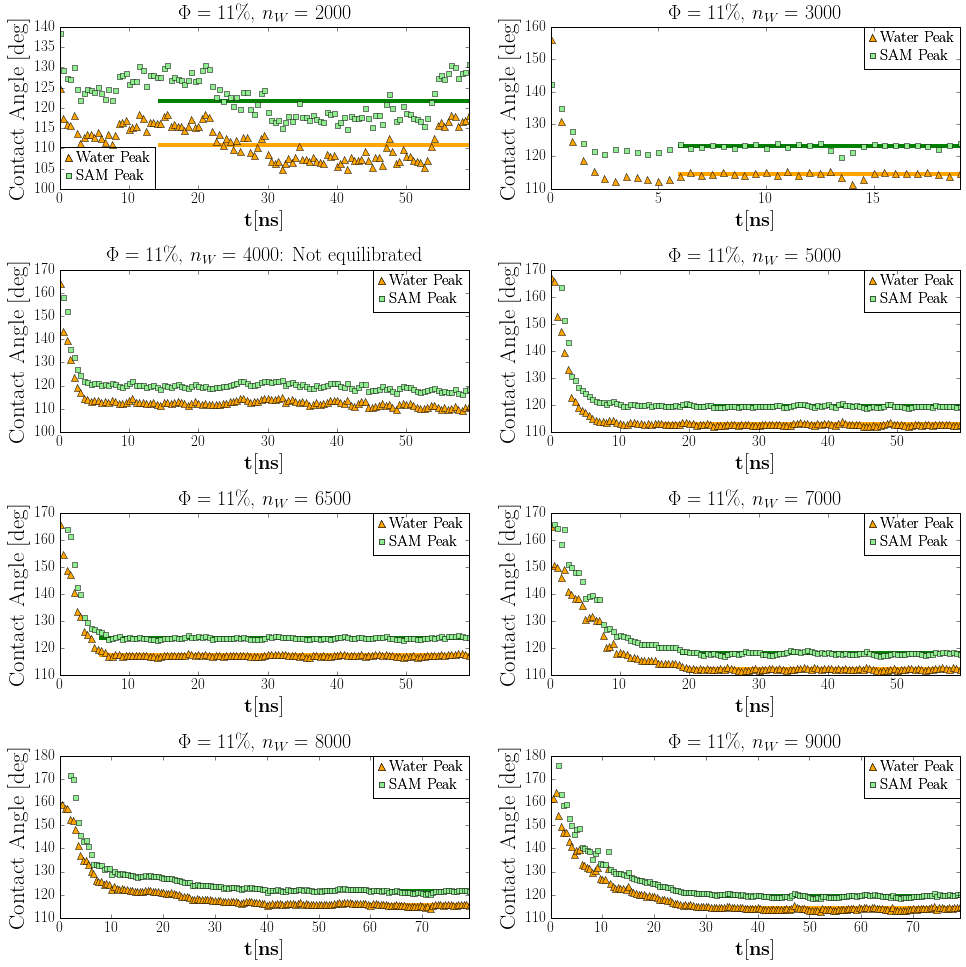

In [18]:
b=11

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#errortheta_m[b]=[]
#theta_m[b]=[]
#start_theta_m[b]=[]
#end_theta_m[b]=[]
#equil_theta_m[b]=[]

errortheta_s[b]=[]
theta_s[b]=[]
start_theta_s[b]=[]
end_theta_s[b]=[]
equil_theta_s[b]=[]

p=0
i = 0
for c in Waters:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    theta2_w = array(angles_w[(b, c)])
    #theta2_m = array(angles_m[(b, c)])
    theta2_s = array(angles_s[(b, c)])
    
    end=endpoint(theta2_w)
    start=best_start(theta2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        thetamean, errrorbar =blockAverage((theta2_w[start:end]),blocksNum) 
        avrg_w = thetamean*avrg_w
        
        #thetamean, errrorbar =blockAverage((theta2_m[start:end]),blocksNum)        
        #avrg_m = thetamean*avrg_m
                
        #(errortheta_m[b]).append(errrorbar)
        #(theta_m[b]).append(thetamean)
        #(start_theta_m[b]).append(start)
        #(end_theta_m[b]).append(end)
        #(equil_theta_m[b]).append(c)
        
        thetamean, errrorbar =blockAverage((theta2_s[start:end]),blocksNum)        
        avrg_s = thetamean*avrg_s
               
        (errortheta_s[b]).append(errrorbar)
        (theta_s[b]).append(thetamean)
        (start_theta_s[b]).append(start)
        (end_theta_s[b]).append(end)
        (equil_theta_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, theta2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, theta2_m,'h', color='gray',label="GDS",markersize=6.0)
    ax.plot(t,theta2_s,'s',label="SAM Peak",color='lightgreen',markersize=5.0)
    ax.set_xlim([t[0],t[end-1]])
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    
    # Create a legend for the first line.
    #first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.2)
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

for SAM  17 % and  2000  molecules:
 Not equilibrated!
num of good intervals= 36
for SAM  17 % and  3000  molecules:
num of good intervals= 15
for SAM  17 % and  4000  molecules:
num of good intervals= 13
for SAM  17 % and  5000  molecules:
num of good intervals= 23
for SAM  17 % and  6500  molecules:
num of good intervals= 29
for SAM  17 % and  7000  molecules:
num of good intervals= 4
for SAM  17 % and  8000  molecules:
num of good intervals= 7
for SAM  17 % and  9000  molecules:


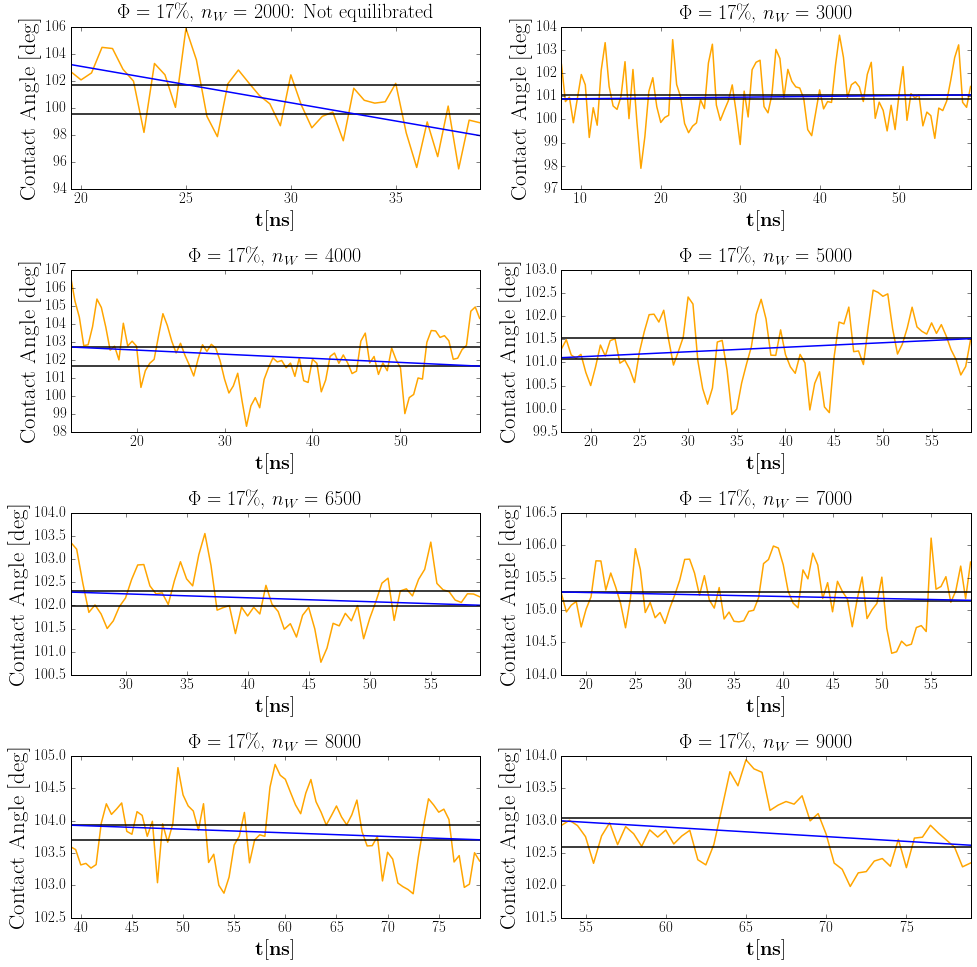

In [19]:
b=17

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

errortheta_w[b]=[]
theta_w[b]=[]
start_theta_w[b]=[]
end_theta_w[b]=[]
equil_theta_w[b]=[]

i = 0
for c in Waters:
    
    n=Waters.index(c)

    theta2 = array(angles_w[(b, c)])
    
    end=endpoint(theta2)
    start=best_start(theta2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(theta2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (errortheta_w[b]).append(errrorbar)
        (theta_w[b]).append(thetamean)
        (start_theta_w[b]).append(start)
        (end_theta_w[b]).append(end)
        (equil_theta_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], theta2[start:end],'-',color='orange',linewidth=1.5)  
    ax.plot(t[start:end], func(t[start:end], 0, thetamean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, thetamean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),'b', label=text,linewidth=1.5)
    
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)

    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    ax.set_xlim([t[start],t[end-1]])    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
plt.show()
fig.savefig('equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
3000  molec:
num of good intervals= 36
4000  molec:
num of good intervals= 15
5000  molec:
num of good intervals= 13
6500  molec:
num of good intervals= 23
7000  molec:
num of good intervals= 29
8000  molec:
num of good intervals= 4
9000  molec:
num of good intervals= 7


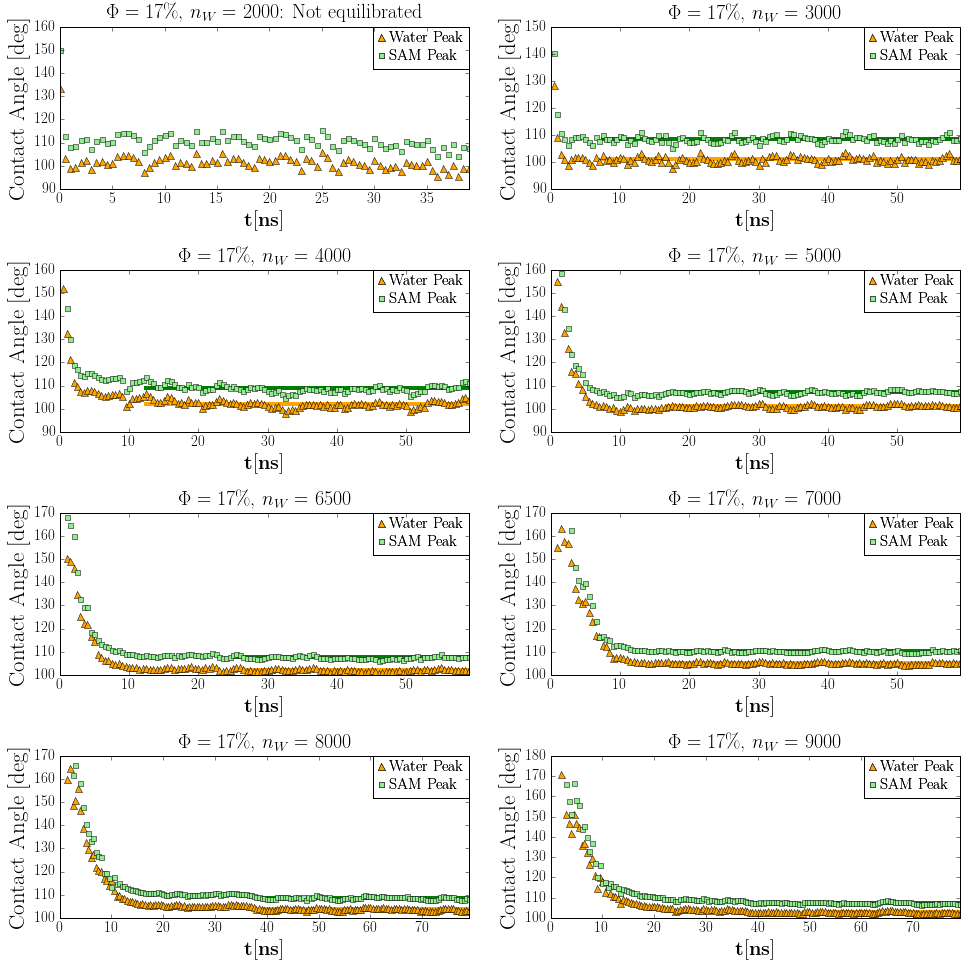

In [20]:
b=17

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#errortheta_m[b]=[]
#theta_m[b]=[]
#start_theta_m[b]=[]
#end_theta_m[b]=[]
#equil_theta_m[b]=[]

errortheta_s[b]=[]
theta_s[b]=[]
start_theta_s[b]=[]
end_theta_s[b]=[]
equil_theta_s[b]=[]

p=0
i = 0
for c in Waters:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    theta2_w = array(angles_w[(b, c)])
    #theta2_m = array(angles_m[(b, c)])
    theta2_s = array(angles_s[(b, c)])
    
    end=endpoint(theta2_w)
    start=best_start(theta2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        thetamean, errrorbar =blockAverage((theta2_w[start:end]),blocksNum) 
        avrg_w = thetamean*avrg_w
        
        #thetamean, errrorbar =blockAverage((theta2_m[start:end]),blocksNum)        
        #avrg_m = thetamean*avrg_m
                
        #(errortheta_m[b]).append(errrorbar)
        #(theta_m[b]).append(thetamean)
        #(start_theta_m[b]).append(start)
        #(end_theta_m[b]).append(end)
        #(equil_theta_m[b]).append(c)
        
        thetamean, errrorbar =blockAverage((theta2_s[start:end]),blocksNum)        
        avrg_s = thetamean*avrg_s
               
        (errortheta_s[b]).append(errrorbar)
        (theta_s[b]).append(thetamean)
        (start_theta_s[b]).append(start)
        (end_theta_s[b]).append(end)
        (equil_theta_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, theta2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, theta2_m,'h', color='gray',label="GDS",markersize=6.0)
    ax.plot(t,theta2_s,'s',label="SAM Peak",color='lightgreen',markersize=5.0)
    ax.set_xlim([t[0],t[end-1]])
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    
    # Create a legend for the first line.
    #first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.2)
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

num of good intervals= 14
for SAM  21 % and  2000  molecules:
num of good intervals= 49
for SAM  21 % and  3000  molecules:
num of good intervals= 13
for SAM  21 % and  4000  molecules:
num of good intervals= 31
for SAM  21 % and  5000  molecules:
num of good intervals= 54
for SAM  21 % and  6500  molecules:
num of good intervals= 34
for SAM  21 % and  9000  molecules:


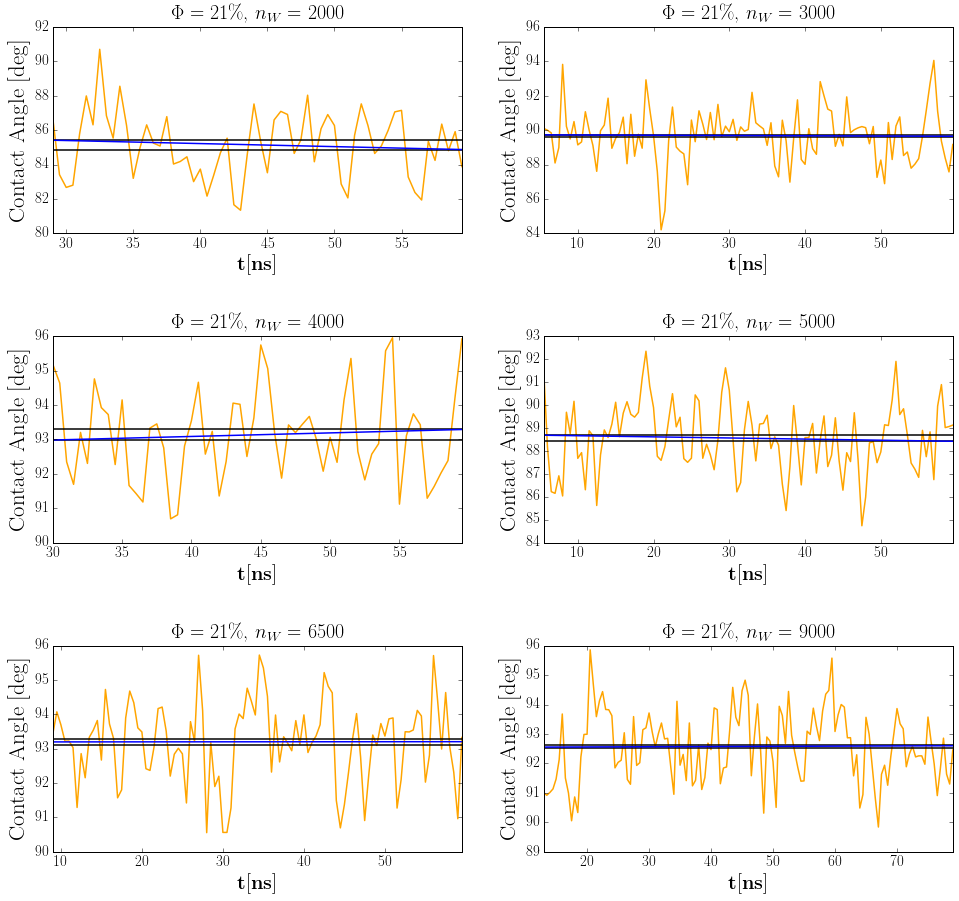

In [21]:
b=21

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

errortheta_w[b]=[]
theta_w[b]=[]
start_theta_w[b]=[]
end_theta_w[b]=[]
equil_theta_w[b]=[]

i = 0
for c in [2000,3000,4000,5000,6500,9000]:
    
    n=Waters.index(c)

    theta2 = array(angles_w[(b, c)])
    
    end=endpoint(theta2)
    start=best_start(theta2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(theta2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+',\% $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (errortheta_w[b]).append(errrorbar)
        (theta_w[b]).append(thetamean)
        (start_theta_w[b]).append(start)
        (end_theta_w[b]).append(end)
        (equil_theta_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], theta2[start:end],'-',color='orange',linewidth=1.5)  
    ax.plot(t[start:end], func(t[start:end], 0, thetamean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, thetamean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),'b', label=text,linewidth=1.5)
    
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)

    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    ax.set_xlim([t[start],t[end-1]])    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
plt.show()
fig.savefig('equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
num of good intervals= 14
3000  molec:
num of good intervals= 49
4000  molec:
num of good intervals= 13
5000  molec:
num of good intervals= 31
6500  molec:
num of good intervals= 54
9000  molec:
num of good intervals= 34


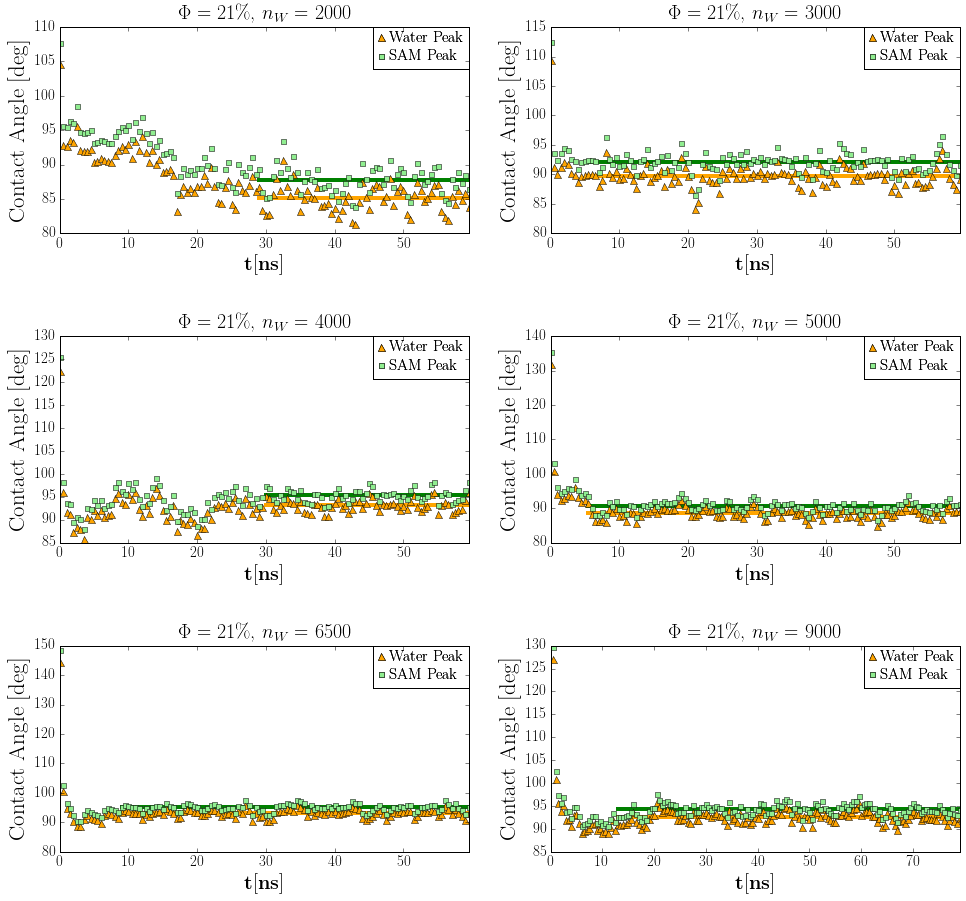

In [22]:
b=21

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#errortheta_m[b]=[]
#theta_m[b]=[]
#start_theta_m[b]=[]
#end_theta_m[b]=[]
#equil_theta_m[b]=[]

errortheta_s[b]=[]
theta_s[b]=[]
start_theta_s[b]=[]
end_theta_s[b]=[]
equil_theta_s[b]=[]

p=0
i = 0
for c in [2000,3000,4000,5000,6500,9000]:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    theta2_w = array(angles_w[(b, c)])
    #theta2_m = array(angles_m[(b, c)])
    theta2_s = array(angles_s[(b, c)])
    
    end=endpoint(theta2_w)
    start=best_start(theta2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        thetamean, errrorbar =blockAverage((theta2_w[start:end]),blocksNum) 
        avrg_w = thetamean*avrg_w
        
        #thetamean, errrorbar =blockAverage((theta2_m[start:end]),blocksNum)        
        #avrg_m = thetamean*avrg_m
                
        #(errortheta_m[b]).append(errrorbar)
        #(theta_m[b]).append(thetamean)
        #(start_theta_m[b]).append(start)
        #(end_theta_m[b]).append(end)
        #(equil_theta_m[b]).append(c)
        
        thetamean, errrorbar =blockAverage((theta2_s[start:end]),blocksNum)        
        avrg_s = thetamean*avrg_s
               
        (errortheta_s[b]).append(errrorbar)
        (theta_s[b]).append(thetamean)
        (start_theta_s[b]).append(start)
        (end_theta_s[b]).append(end)
        (equil_theta_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, theta2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, theta2_m,'h', color='gray',label="GDS",markersize=6.0)
    ax.plot(t,theta2_s,'s',label="SAM Peak",color='lightgreen',markersize=5.0)
    ax.set_xlim([t[0],t[end-1]])
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    
    # Create a legend for the first line.
    #first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.2)
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

num of good intervals= 90
for SAM  25 % and  2000  molecules:
num of good intervals= 38
for SAM  25 % and  3000  molecules:
num of good intervals= 1
for SAM  25 % and  4000  molecules:
num of good intervals= 45
for SAM  25 % and  5000  molecules:
num of good intervals= 5
for SAM  25 % and  6500  molecules:
num of good intervals= 2
for SAM  25 % and  9000  molecules:


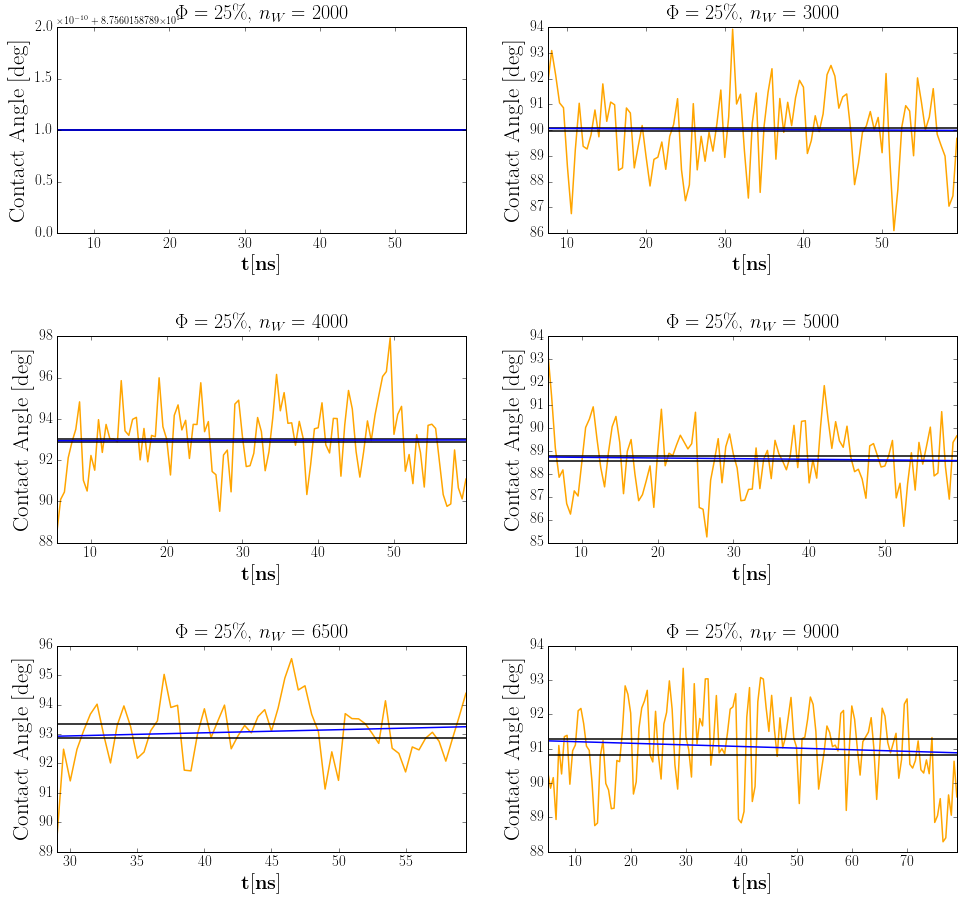

In [23]:
b=25

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

errortheta_w[b]=[]
theta_w[b]=[]
start_theta_w[b]=[]
end_theta_w[b]=[]
equil_theta_w[b]=[]

i = 0
for c in [2000,3000,4000,5000,6500,9000]:
    
    n=Waters.index(c)

    theta2 = array(angles_w[(b, c)])
    
    end=endpoint(theta2)
    start=best_start(theta2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(theta2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+',\% $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (errortheta_w[b]).append(errrorbar)
        (theta_w[b]).append(thetamean)
        (start_theta_w[b]).append(start)
        (end_theta_w[b]).append(end)
        (equil_theta_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], theta2[start:end],'-',color='orange',linewidth=1.5)  
    ax.plot(t[start:end], func(t[start:end], 0, thetamean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, thetamean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),'b', label=text,linewidth=1.5)
    
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)

    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    ax.set_xlim([t[start],t[end-1]])    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
plt.show()
fig.savefig('equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
num of good intervals= 90
3000  molec:
num of good intervals= 38
4000  molec:
num of good intervals= 1
5000  molec:
num of good intervals= 45
6500  molec:
num of good intervals= 5
9000  molec:
num of good intervals= 2


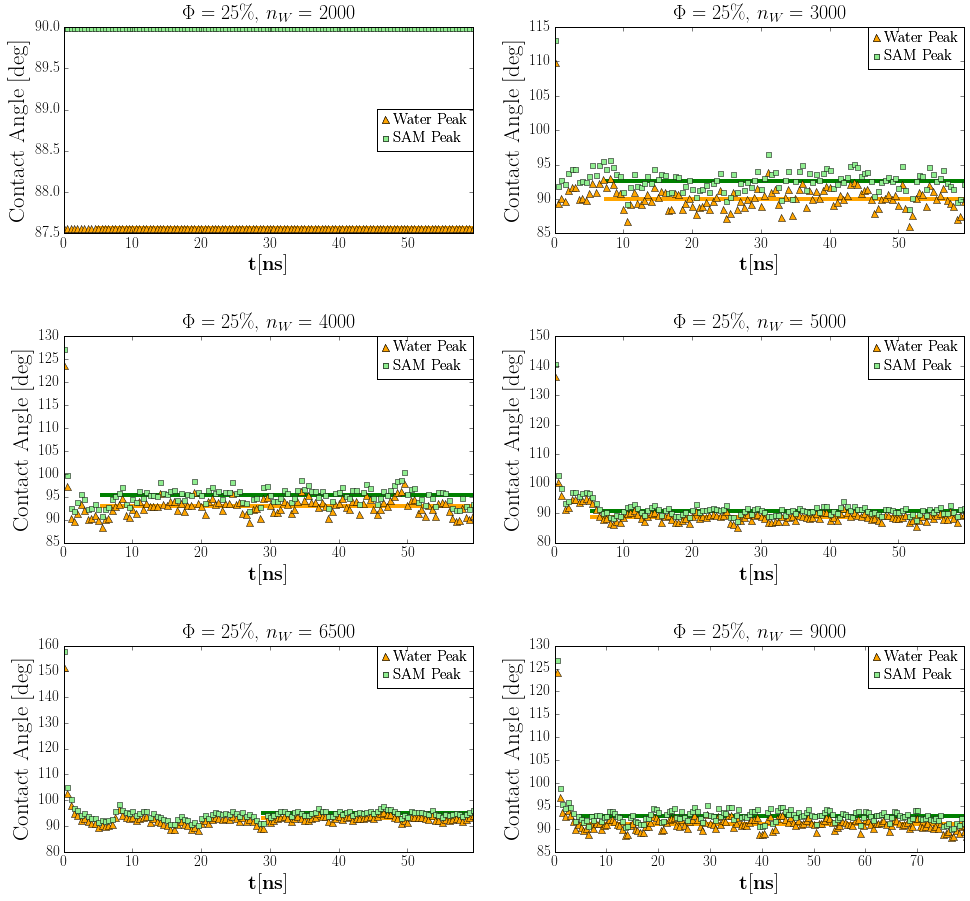

In [24]:
b=25

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#errortheta_m[b]=[]
#theta_m[b]=[]
#start_theta_m[b]=[]
#end_theta_m[b]=[]
#equil_theta_m[b]=[]

errortheta_s[b]=[]
theta_s[b]=[]
start_theta_s[b]=[]
end_theta_s[b]=[]
equil_theta_s[b]=[]

p=0
i = 0
for c in [2000,3000,4000,5000,6500,9000]:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    theta2_w = array(angles_w[(b, c)])
    #theta2_m = array(angles_m[(b, c)])
    theta2_s = array(angles_s[(b, c)])
    
    end=endpoint(theta2_w)
    start=best_start(theta2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        thetamean, errrorbar =blockAverage((theta2_w[start:end]),blocksNum) 
        avrg_w = thetamean*avrg_w
        
        #thetamean, errrorbar =blockAverage((theta2_m[start:end]),blocksNum)        
        #avrg_m = thetamean*avrg_m
                
        #(errortheta_m[b]).append(errrorbar)
        #(theta_m[b]).append(thetamean)
        #(start_theta_m[b]).append(start)
        #(end_theta_m[b]).append(end)
        #(equil_theta_m[b]).append(c)
        
        thetamean, errrorbar =blockAverage((theta2_s[start:end]),blocksNum)        
        avrg_s = thetamean*avrg_s
               
        (errortheta_s[b]).append(errrorbar)
        (theta_s[b]).append(thetamean)
        (start_theta_s[b]).append(start)
        (end_theta_s[b]).append(end)
        (equil_theta_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, theta2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, theta2_m,'h', color='gray',label="GDS",markersize=6.0)
    ax.plot(t,theta2_s,'s',label="SAM Peak",color='lightgreen',markersize=5.0)
    ax.set_xlim([t[0],t[end-1]])
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    
    # Create a legend for the first line.
    #first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.2)
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

num of good intervals= 57
for SAM  33 % and  2000  molecules:
num of good intervals= 25
for SAM  33 % and  3000  molecules:
num of good intervals= 18
for SAM  33 % and  4000  molecules:
num of good intervals= 9
for SAM  33 % and  5000  molecules:
num of good intervals= 54
for SAM  33 % and  6500  molecules:
num of good intervals= 46
for SAM  33 % and  9000  molecules:


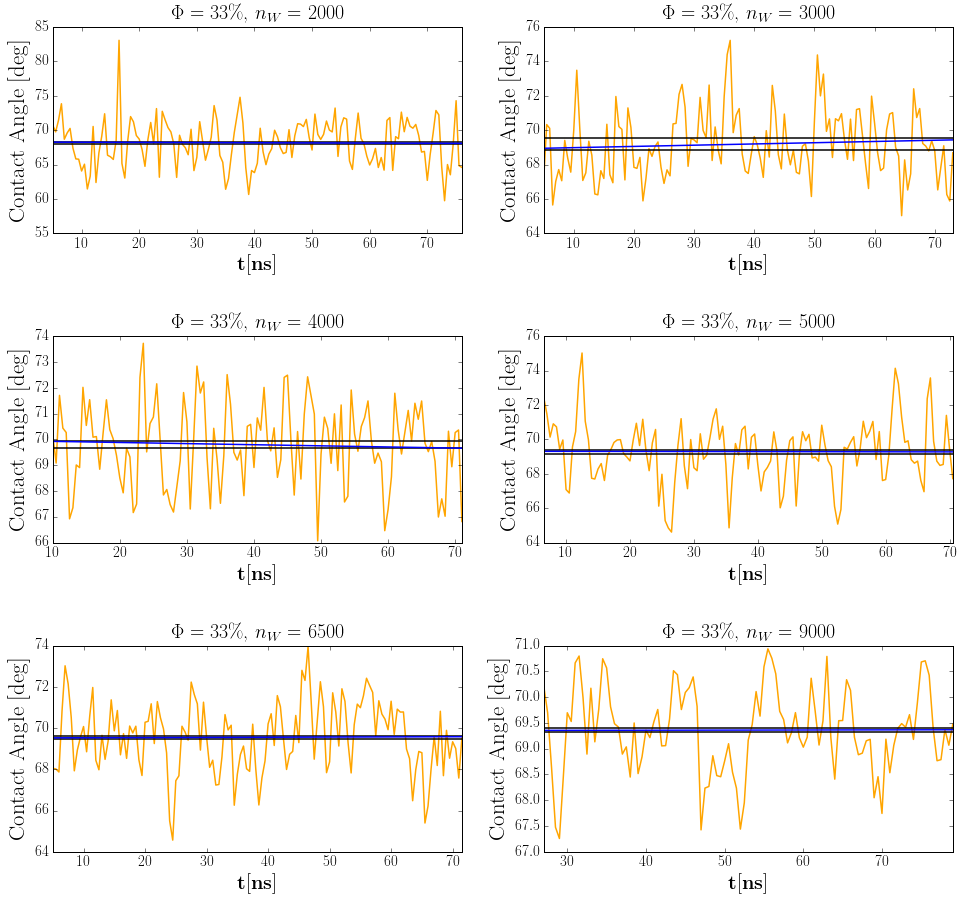

In [25]:
b=33

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

errortheta_w[b]=[]
theta_w[b]=[]
start_theta_w[b]=[]
end_theta_w[b]=[]
equil_theta_w[b]=[]

i = 0
for c in [2000,3000,4000,5000,6500,9000]:
    
    n=Waters.index(c)

    theta2 = array(angles_w[(b, c)])
    
    end=endpoint(theta2)
    start=best_start(theta2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(theta2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (errortheta_w[b]).append(errrorbar)
        (theta_w[b]).append(thetamean)
        (start_theta_w[b]).append(start)
        (end_theta_w[b]).append(end)
        (equil_theta_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], theta2[start:end],'-',color='orange',linewidth=1.5)  
    ax.plot(t[start:end], func(t[start:end], 0, thetamean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, thetamean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),'b', label=text,linewidth=1.5)
    
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)

    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    ax.set_xlim([t[start],t[end-1]])    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
plt.show()
fig.savefig('equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
num of good intervals= 57
3000  molec:
num of good intervals= 25
4000  molec:
num of good intervals= 18
5000  molec:
num of good intervals= 9
6500  molec:
num of good intervals= 54
9000  molec:
num of good intervals= 46


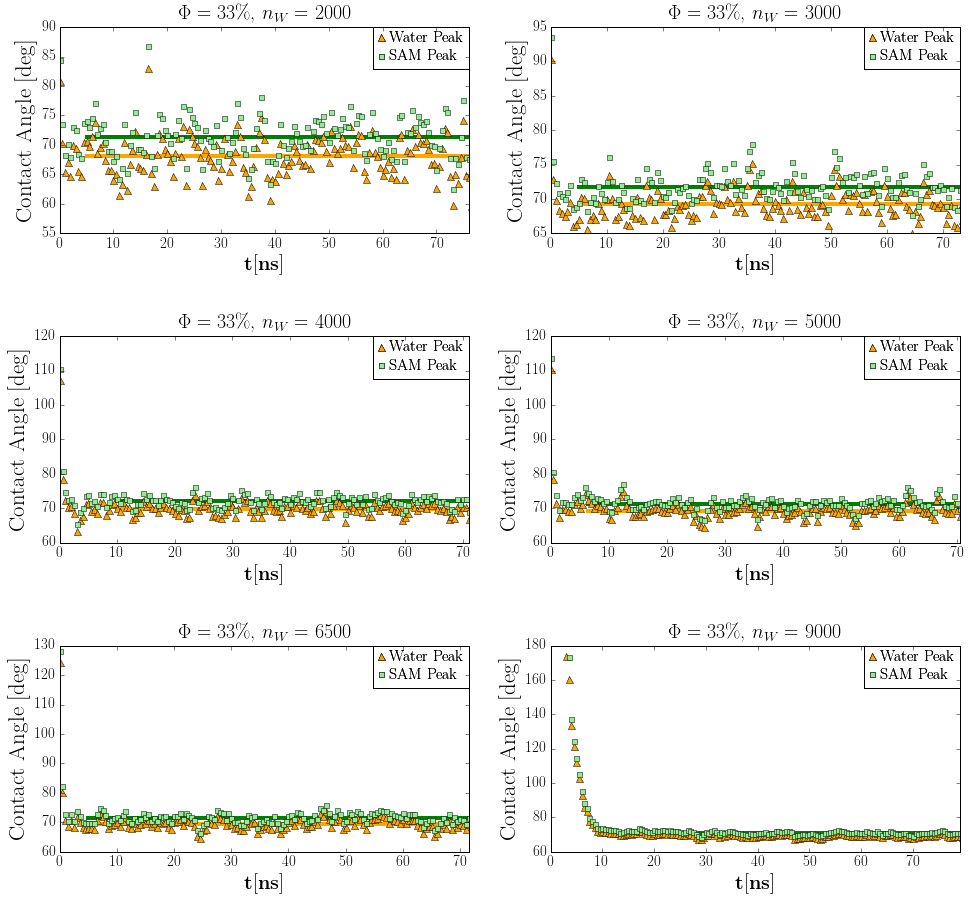

In [26]:
b=33

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#errortheta_m[b]=[]
#theta_m[b]=[]
#start_theta_m[b]=[]
#end_theta_m[b]=[]
#equil_theta_m[b]=[]

errortheta_s[b]=[]
theta_s[b]=[]
start_theta_s[b]=[]
end_theta_s[b]=[]
equil_theta_s[b]=[]

p=0
i = 0
for c in [2000,3000,4000,5000,6500,9000]:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    theta2_w = array(angles_w[(b, c)])
    #theta2_m = array(angles_m[(b, c)])
    theta2_s = array(angles_s[(b, c)])
    
    end=endpoint(theta2_w)
    start=best_start(theta2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        thetamean, errrorbar =blockAverage((theta2_w[start:end]),blocksNum) 
        avrg_w = thetamean*avrg_w
        
        #thetamean, errrorbar =blockAverage((theta2_m[start:end]),blocksNum)        
        #avrg_m = thetamean*avrg_m
                
        #(errortheta_m[b]).append(errrorbar)
        #(theta_m[b]).append(thetamean)
        #(start_theta_m[b]).append(start)
        #(end_theta_m[b]).append(end)
        #(equil_theta_m[b]).append(c)
        
        thetamean, errrorbar =blockAverage((theta2_s[start:end]),blocksNum)        
        avrg_s = thetamean*avrg_s
               
        (errortheta_s[b]).append(errrorbar)
        (theta_s[b]).append(thetamean)
        (start_theta_s[b]).append(start)
        (end_theta_s[b]).append(end)
        (equil_theta_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, theta2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, theta2_m,'h', color='gray',label="GDS",markersize=6.0)
    ax.plot(t,theta2_s,'s',label="SAM Peak",color='lightgreen',markersize=5.0)
    ax.set_xlim([t[0],t[end-1]])
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    
    # Create a legend for the first line.
    #first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.2)
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

for SAM  41 % and  3000  molecules:
 Not equilibrated!
num of good intervals= 40
for SAM  41 % and  4000  molecules:
num of good intervals= 16
for SAM  41 % and  5000  molecules:
num of good intervals= 33
for SAM  41 % and  6500  molecules:
num of good intervals= 46
for SAM  41 % and  9000  molecules:


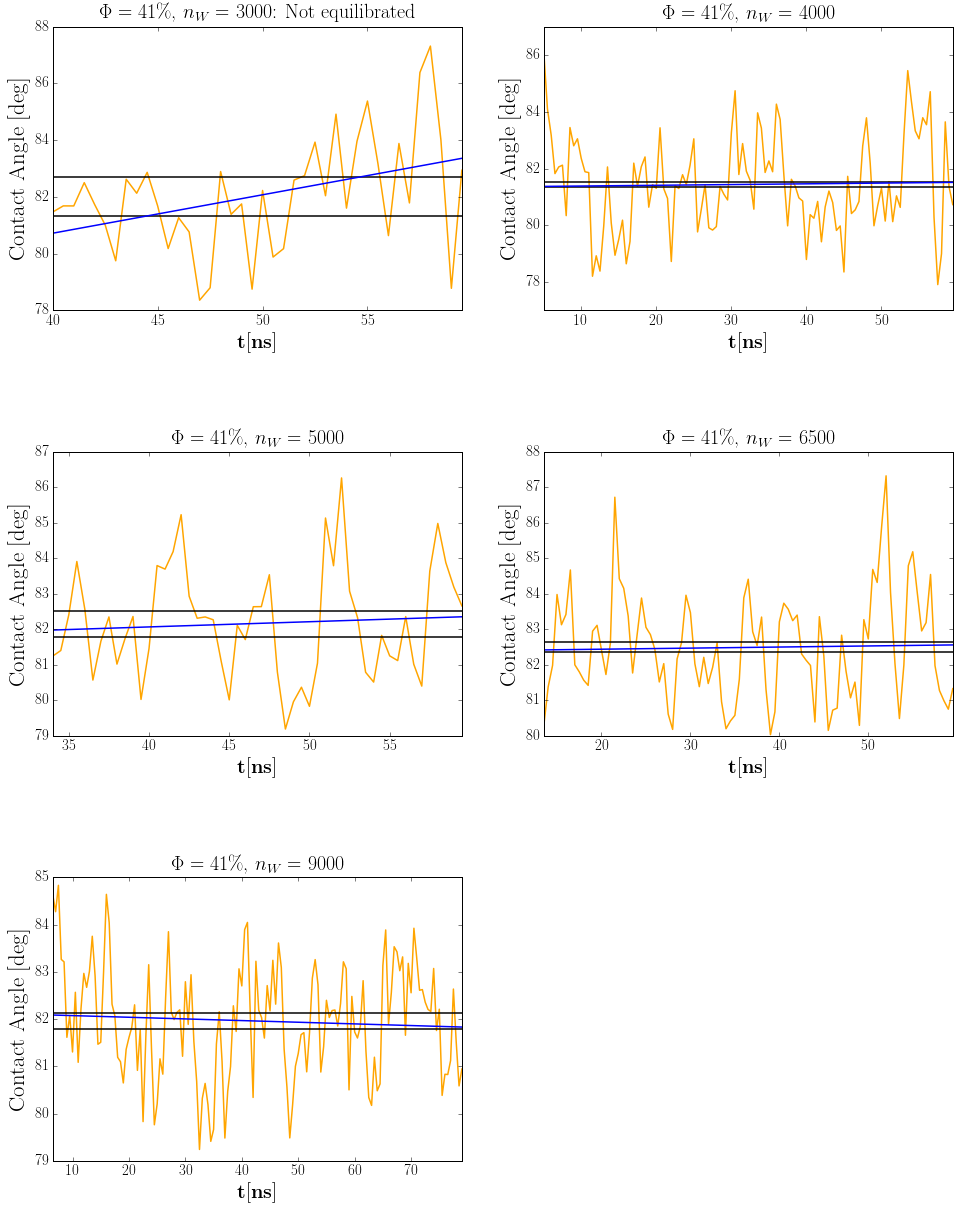

In [62]:
b=41

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 3
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

errortheta_w[b]=[]
theta_w[b]=[]
start_theta_w[b]=[]
end_theta_w[b]=[]
equil_theta_w[b]=[]

i = 0
for c in [3000,4000,5000,6500,9000]:
    
    n=Waters.index(c)

    theta2 = array(angles_w[(b, c)])
    
    end=endpoint(theta2)
    start=best_start(theta2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(theta2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
        thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (errortheta_w[b]).append(errrorbar)
        (theta_w[b]).append(thetamean)
        (start_theta_w[b]).append(start)
        (end_theta_w[b]).append(end)
        (equil_theta_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], theta2[start:end],'-',color='orange',linewidth=1.5)  
    ax.plot(t[start:end], func(t[start:end], 0, thetamean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, thetamean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),'b', label=text,linewidth=1.5)
    
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)

    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    ax.set_xlim([t[start],t[end-1]])    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
plt.show()
fig.savefig('equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

3000  molec:
4000  molec:
num of good intervals= 40
5000  molec:
num of good intervals= 16
6500  molec:
num of good intervals= 33
9000  molec:
num of good intervals= 46


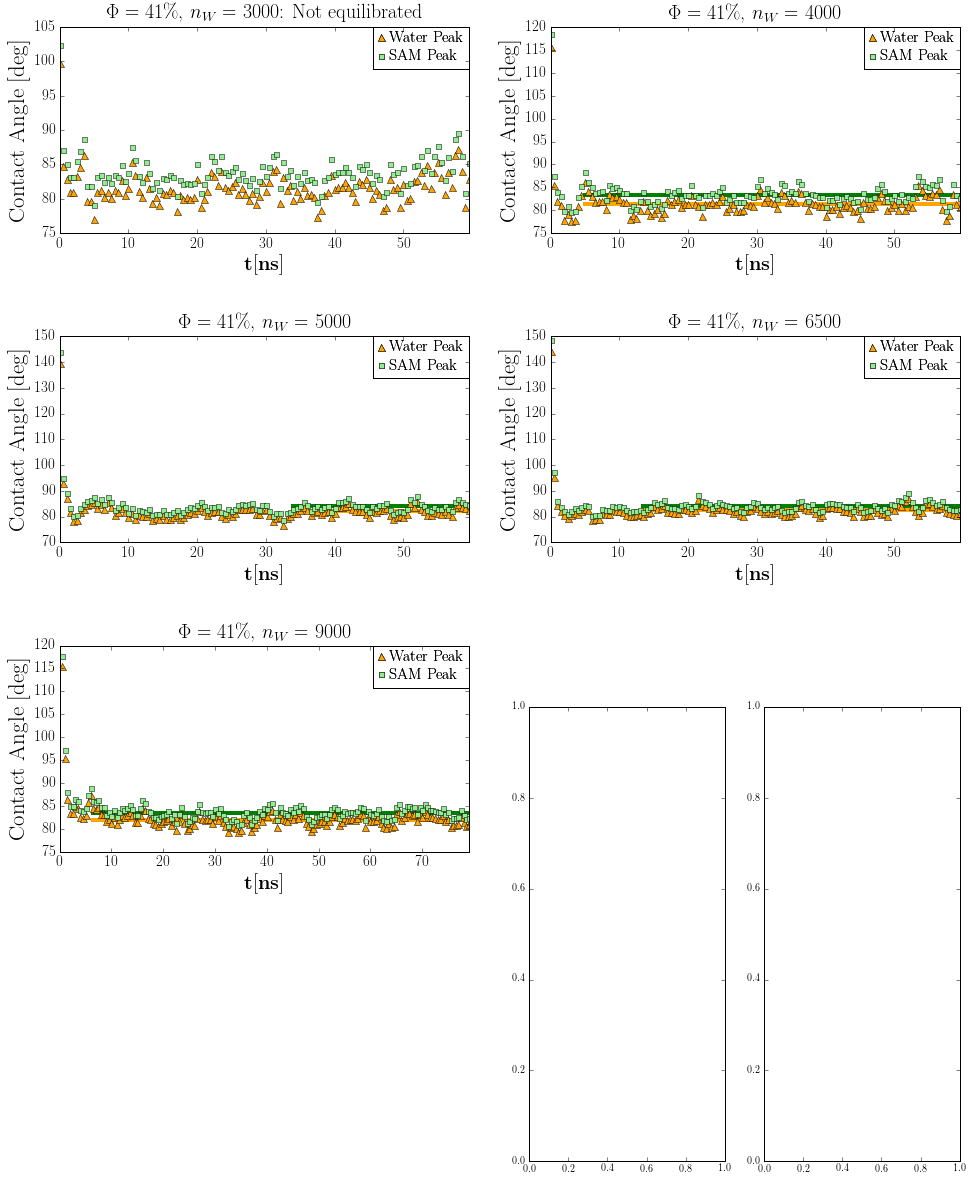

In [63]:
b=41

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#errortheta_m[b]=[]
#theta_m[b]=[]
#start_theta_m[b]=[]
#end_theta_m[b]=[]
#equil_theta_m[b]=[]

errortheta_s[b]=[]
theta_s[b]=[]
start_theta_s[b]=[]
end_theta_s[b]=[]
equil_theta_s[b]=[]

p=0
i = 0
for c in [3000,4000,5000,6500,9000]:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    theta2_w = array(angles_w[(b, c)])
    #theta2_m = array(angles_m[(b, c)])
    theta2_s = array(angles_s[(b, c)])
    
    end=endpoint(theta2_w)
    start=best_start(theta2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        thetamean, errrorbar =blockAverage((theta2_w[start:end]),blocksNum) 
        avrg_w = thetamean*avrg_w
        
        #thetamean, errrorbar =blockAverage((theta2_m[start:end]),blocksNum)        
        #avrg_m = thetamean*avrg_m
                
        #(errortheta_m[b]).append(errrorbar)
        #(theta_m[b]).append(thetamean)
        #(start_theta_m[b]).append(start)
        #(end_theta_m[b]).append(end)
        #(equil_theta_m[b]).append(c)
        
        thetamean, errrorbar =blockAverage((theta2_s[start:end]),blocksNum)        
        avrg_s = thetamean*avrg_s
               
        (errortheta_s[b]).append(errrorbar)
        (theta_s[b]).append(thetamean)
        (start_theta_s[b]).append(start)
        (end_theta_s[b]).append(end)
        (equil_theta_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, theta2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, theta2_m,'h', color='gray',label="GDS",markersize=6.0)
    ax.plot(t,theta2_s,'s',label="SAM Peak",color='lightgreen',markersize=5.0)
    ax.set_xlim([t[0],t[end-1]])
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    #ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    
    # Create a legend for the first line.
    #first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.2)
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'theta_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

num of good intervals= 9
for SAM  0 % and  2000  molecules:
num of good intervals= 52
for SAM  0 % and  3000  molecules:
num of good intervals= 21
for SAM  0 % and  4000  molecules:
num of good intervals= 8
for SAM  0 % and  5000  molecules:
num of good intervals= 13
for SAM  0 % and  6500  molecules:
for SAM  0 % and  7000  molecules:
 Not equilibrated!
num of good intervals= 20
for SAM  0 % and  8000  molecules:
num of good intervals= 16
for SAM  0 % and  9000  molecules:


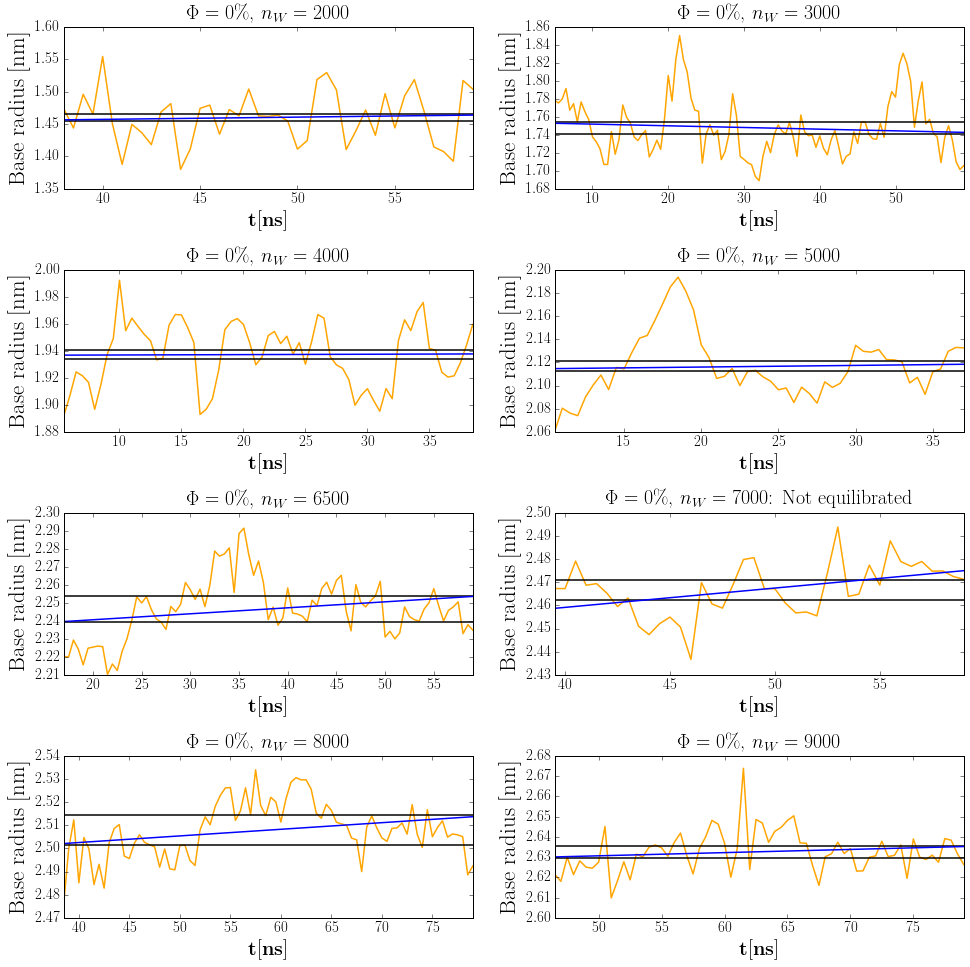

In [55]:
b=0

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

error_rbase_w[b]=[]
rbase_w[b]=[]
start_rbase_w[b]=[]
end_rbase_w[b]=[]
equil_rbase_w[b]=[]
i = 0
for c in Waters:
    
    n=Waters.index(c)

    rbase2 = array(radii_w[(b, c)])
    
    end=endpoint(rbase2)
    start=best_start(rbase2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(rbase2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (error_rbase_w[b]).append(errrorbar)
        (rbase_w[b]).append(rbasemean)
        (start_rbase_w[b]).append(start)
        (end_rbase_w[b]).append(end)
        (equil_rbase_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], rbase2[start:end],'-',color='orange',linewidth=1.5)     
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),color='blue', label=text,linewidth=1.5)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[start],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
    
plt.show()
fig.savefig('equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
num of good intervals= 9
3000  molec:
num of good intervals= 52
4000  molec:
num of good intervals= 21
5000  molec:
num of good intervals= 8
6500  molec:
num of good intervals= 13
7000  molec:
8000  molec:
num of good intervals= 20
9000  molec:
num of good intervals= 16


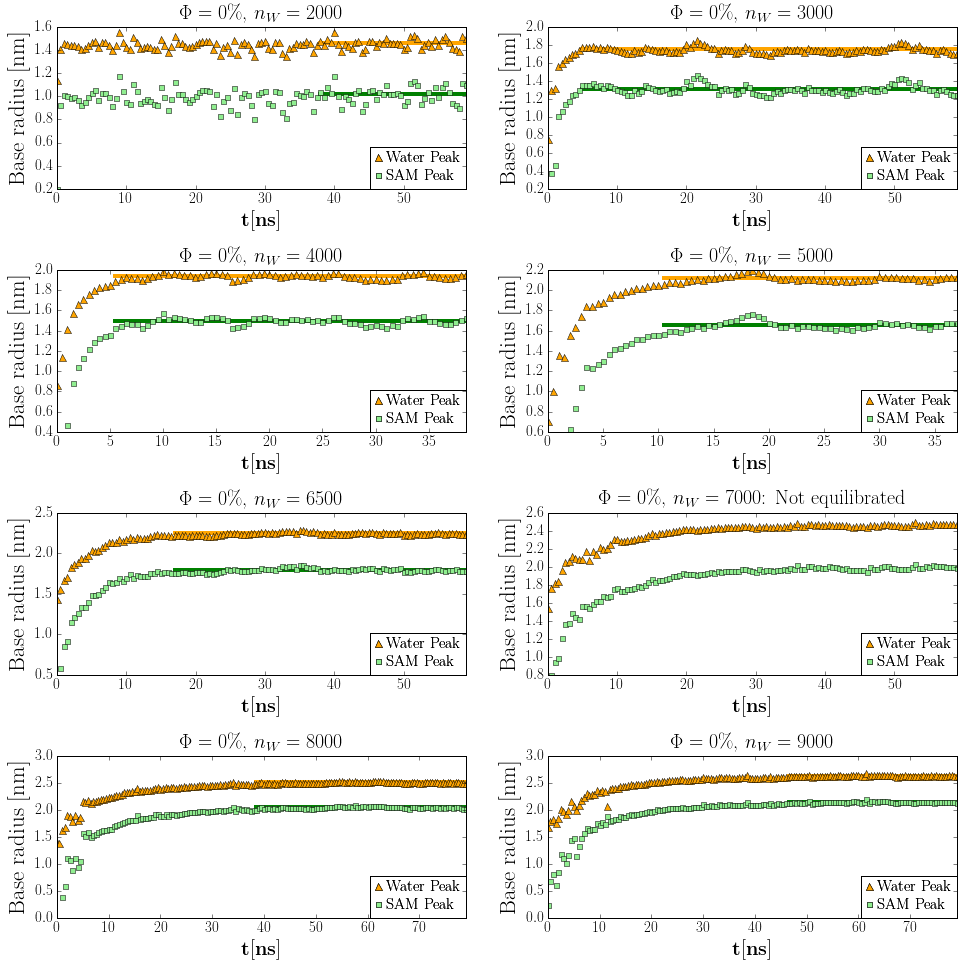

In [29]:
b=0

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#error_rbase_m[b]=[]
#rbase_m[b]=[]
#start_rbase_m[b]=[]
#end_rbase_m[b]=[]
#equil_rbase_m[b]=[]

error_rbase_s[b]=[]
rbase_s[b]=[]
start_rbase_s[b]=[]
end_rbase_s[b]=[]
equil_rbase_s[b]=[]

p=0
i = 0
for c in Waters:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    rbase2_w = array(radii_w[(b, c)])
    #rbase2_m = array(radii_m[(b, c)])
    rbase2_s = array(radii_s[(b, c)])
    
    end=endpoint(rbase2_w)
    start=best_start(rbase2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        rbasemean, errrorbar =blockAverage((rbase2_w[start:end]),blocksNum) 
        avrg_w = rbasemean*avrg_w
        
        #rbasemean, errrorbar =blockAverage((rbase2_m[start:end]),blocksNum)        
        #avrg_m = rbasemean*avrg_m
                
        #(error_rbase_m[b]).append(errrorbar)
        #(rbase_m[b]).append(rbasemean)
        #(start_rbase_m[b]).append(start)
        #(end_rbase_m[b]).append(end)
        #(equil_rbase_m[b]).append(c)
        
        rbasemean, errrorbar =blockAverage((rbase2_s[start:end]),blocksNum)        
        avrg_s = rbasemean*avrg_s
               
        (error_rbase_s[b]).append(errrorbar)
        (rbase_s[b]).append(rbasemean)
        (start_rbase_s[b]).append(start)
        (end_rbase_s[b]).append(end)
        (equil_rbase_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, rbase2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, rbase2_m,'h',  color='gray',label="GDS",markersize=6.0)
    ax.plot(t,rbase2_s,'s',label="SAM Peak", color='lightgreen',markersize=5.0)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[0],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')

    # Create a legend for the first line.
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

num of good intervals= 34
for SAM  5 % and  2000  molecules:
num of good intervals= 31
for SAM  5 % and  3000  molecules:
num of good intervals= 24
for SAM  5 % and  4000  molecules:
num of good intervals= 43
for SAM  5 % and  5000  molecules:
num of good intervals= 29
for SAM  5 % and  6500  molecules:
num of good intervals= 18
for SAM  5 % and  7000  molecules:
num of good intervals= 48
for SAM  5 % and  8000  molecules:
num of good intervals= 38
for SAM  5 % and  9000  molecules:


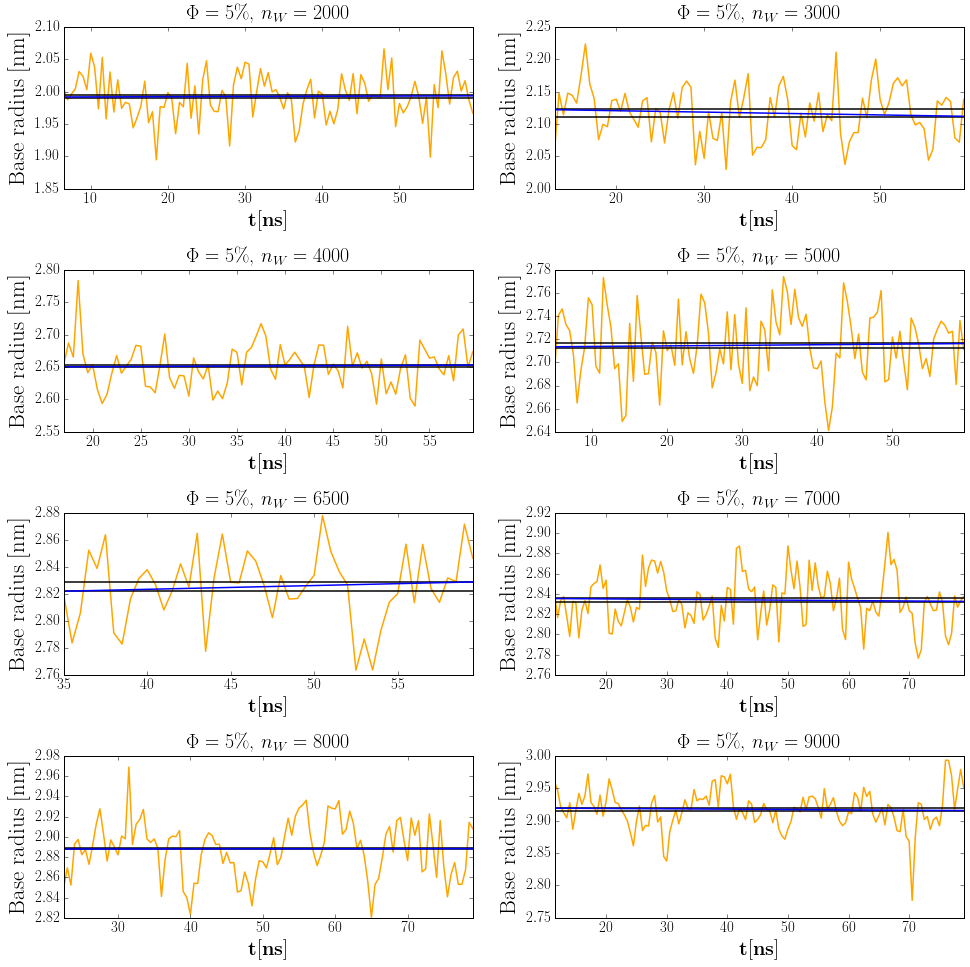

In [30]:
b=5

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

error_rbase_w[b]=[]
rbase_w[b]=[]
start_rbase_w[b]=[]
end_rbase_w[b]=[]
equil_rbase_w[b]=[]
i = 0
for c in Waters:
    
    n=Waters.index(c)

    rbase2 = array(radii_w[(b, c)])
    
    end=endpoint(rbase2)
    start=best_start(rbase2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(rbase2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (error_rbase_w[b]).append(errrorbar)
        (rbase_w[b]).append(rbasemean)
        (start_rbase_w[b]).append(start)
        (end_rbase_w[b]).append(end)
        (equil_rbase_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], rbase2[start:end],'-',color='orange',linewidth=1.5)     
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),color='blue', label=text,linewidth=1.5)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[start],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
    
plt.show()
fig.savefig('equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
num of good intervals= 34
3000  molec:
num of good intervals= 31
4000  molec:
num of good intervals= 24
5000  molec:
num of good intervals= 43
6500  molec:
num of good intervals= 29
7000  molec:
num of good intervals= 18
8000  molec:
num of good intervals= 48
9000  molec:
num of good intervals= 38


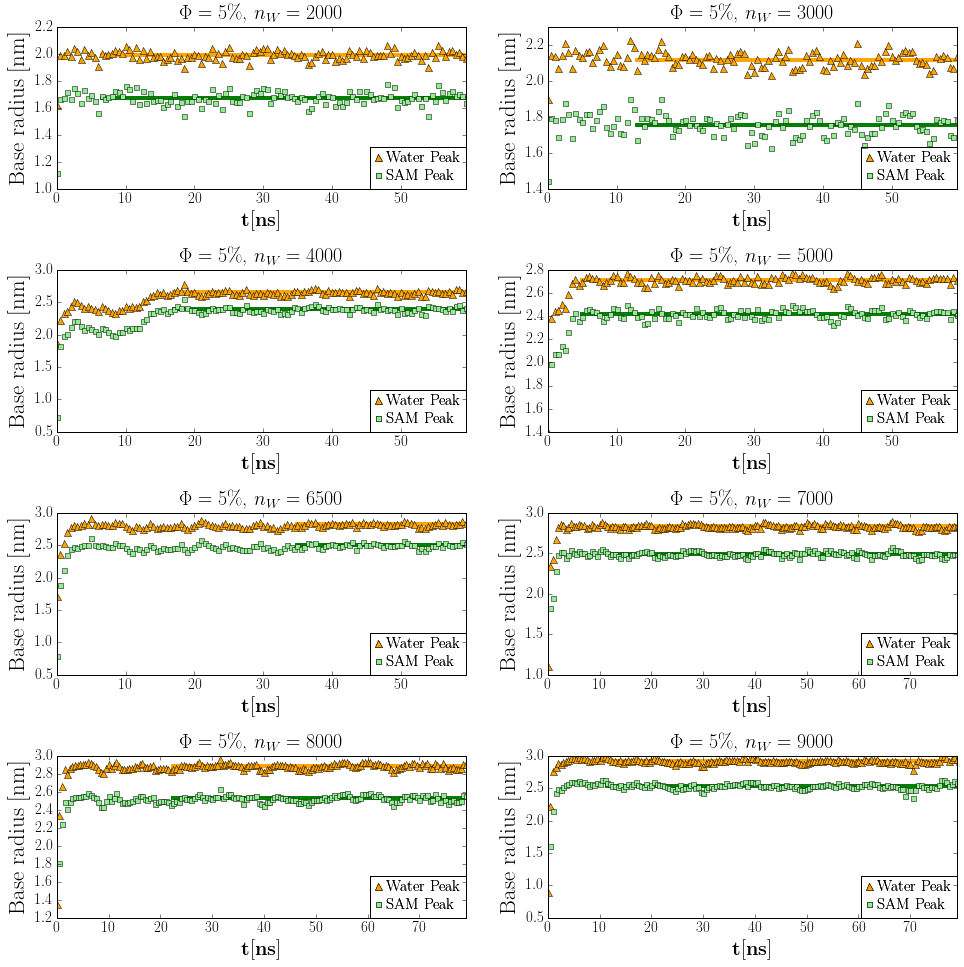

In [31]:
b=5

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#error_rbase_m[b]=[]
#rbase_m[b]=[]
#start_rbase_m[b]=[]
#end_rbase_m[b]=[]
#equil_rbase_m[b]=[]

error_rbase_s[b]=[]
rbase_s[b]=[]
start_rbase_s[b]=[]
end_rbase_s[b]=[]
equil_rbase_s[b]=[]

p=0
i = 0
for c in Waters:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    rbase2_w = array(radii_w[(b, c)])
    #rbase2_m = array(radii_m[(b, c)])
    rbase2_s = array(radii_s[(b, c)])
    
    end=endpoint(rbase2_w)
    start=best_start(rbase2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        rbasemean, errrorbar =blockAverage((rbase2_w[start:end]),blocksNum) 
        avrg_w = rbasemean*avrg_w
        
        #rbasemean, errrorbar =blockAverage((rbase2_m[start:end]),blocksNum)        
        #avrg_m = rbasemean*avrg_m
                
        #(error_rbase_m[b]).append(errrorbar)
        #(rbase_m[b]).append(rbasemean)
        #(start_rbase_m[b]).append(start)
        #(end_rbase_m[b]).append(end)
        #(equil_rbase_m[b]).append(c)
        
        rbasemean, errrorbar =blockAverage((rbase2_s[start:end]),blocksNum)        
        avrg_s = rbasemean*avrg_s
               
        (error_rbase_s[b]).append(errrorbar)
        (rbase_s[b]).append(rbasemean)
        (start_rbase_s[b]).append(start)
        (end_rbase_s[b]).append(end)
        (equil_rbase_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, rbase2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, rbase2_m,'h',  color='gray',label="GDS",markersize=6.0)
    ax.plot(t,rbase2_s,'s',label="SAM Peak", color='lightgreen',markersize=5.0)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[0],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')

    # Create a legend for the first line.
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

num of good intervals= 21
for SAM  11 % and  2000  molecules:
num of good intervals= 6
for SAM  11 % and  3000  molecules:
for SAM  11 % and  4000  molecules:
 Not equilibrated!
num of good intervals= 26
for SAM  11 % and  5000  molecules:
num of good intervals= 5
for SAM  11 % and  6500  molecules:
num of good intervals= 24
for SAM  11 % and  7000  molecules:
num of good intervals= 11
for SAM  11 % and  8000  molecules:
num of good intervals= 15
for SAM  11 % and  9000  molecules:


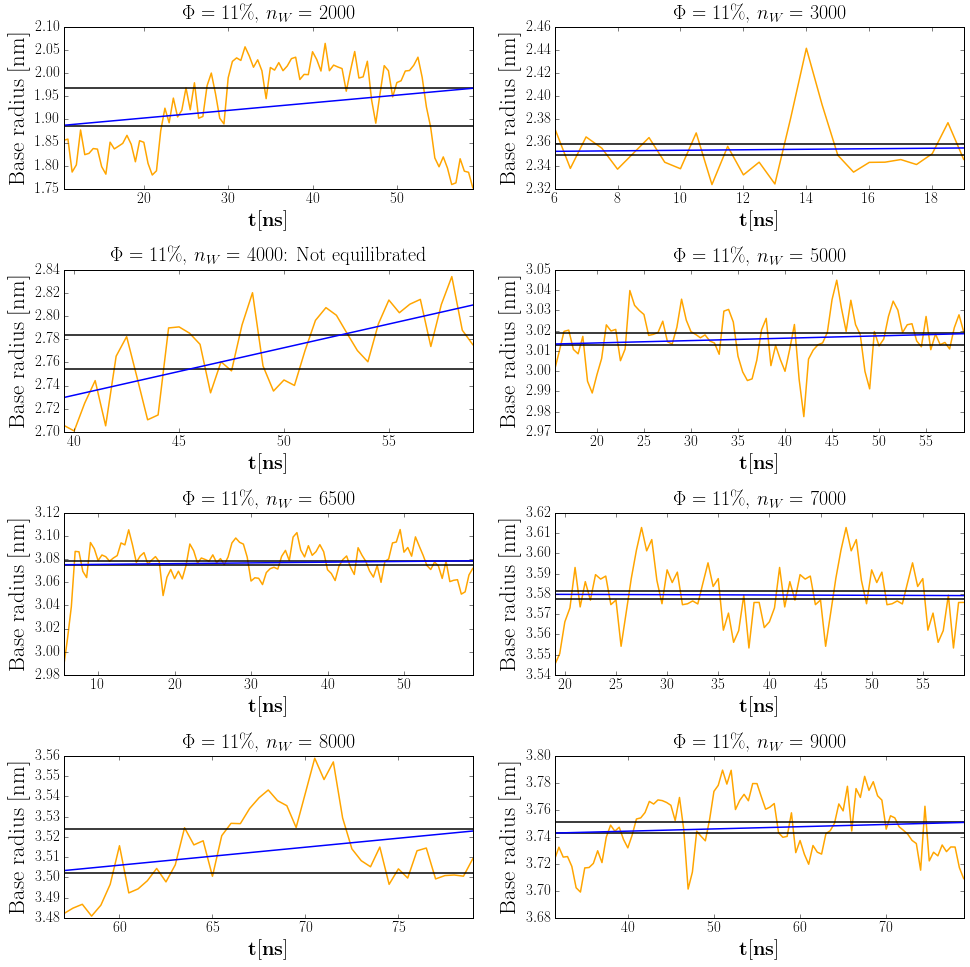

In [32]:
b=11

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

error_rbase_w[b]=[]
rbase_w[b]=[]
start_rbase_w[b]=[]
end_rbase_w[b]=[]
equil_rbase_w[b]=[]
i = 0
for c in Waters:
    
    n=Waters.index(c)

    rbase2 = array(radii_w[(b, c)])
    
    end=endpoint(rbase2)
    start=best_start(rbase2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(rbase2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (error_rbase_w[b]).append(errrorbar)
        (rbase_w[b]).append(rbasemean)
        (start_rbase_w[b]).append(start)
        (end_rbase_w[b]).append(end)
        (equil_rbase_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], rbase2[start:end],'-',color='orange',linewidth=1.5)     
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),color='blue', label=text,linewidth=1.5)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[start],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
    
plt.show()
fig.savefig('equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
num of good intervals= 21
3000  molec:
num of good intervals= 6
4000  molec:
5000  molec:
num of good intervals= 26
6500  molec:
num of good intervals= 5
7000  molec:
num of good intervals= 24
8000  molec:
num of good intervals= 11
9000  molec:
num of good intervals= 15


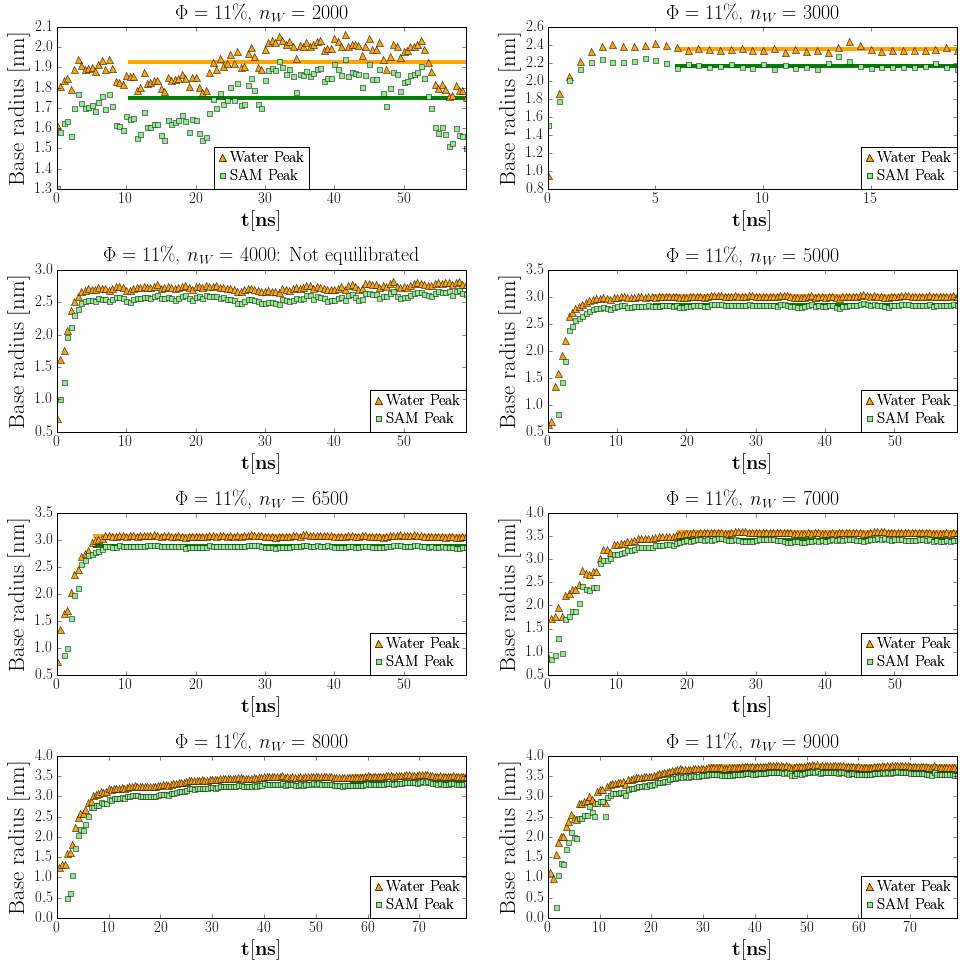

In [33]:
b=11

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#error_rbase_m[b]=[]
#rbase_m[b]=[]
#start_rbase_m[b]=[]
#end_rbase_m[b]=[]
#equil_rbase_m[b]=[]

error_rbase_s[b]=[]
rbase_s[b]=[]
start_rbase_s[b]=[]
end_rbase_s[b]=[]
equil_rbase_s[b]=[]

p=0
i = 0
for c in Waters:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    rbase2_w = array(radii_w[(b, c)])
    #rbase2_m = array(radii_m[(b, c)])
    rbase2_s = array(radii_s[(b, c)])
    
    end=endpoint(rbase2_w)
    start=best_start(rbase2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        rbasemean, errrorbar =blockAverage((rbase2_w[start:end]),blocksNum) 
        avrg_w = rbasemean*avrg_w
        
        #rbasemean, errrorbar =blockAverage((rbase2_m[start:end]),blocksNum)        
        #avrg_m = rbasemean*avrg_m
                
        #(error_rbase_m[b]).append(errrorbar)
        #(rbase_m[b]).append(rbasemean)
        #(start_rbase_m[b]).append(start)
        #(end_rbase_m[b]).append(end)
        #(equil_rbase_m[b]).append(c)
        
        rbasemean, errrorbar =blockAverage((rbase2_s[start:end]),blocksNum)        
        avrg_s = rbasemean*avrg_s
               
        (error_rbase_s[b]).append(errrorbar)
        (rbase_s[b]).append(rbasemean)
        (start_rbase_s[b]).append(start)
        (end_rbase_s[b]).append(end)
        (equil_rbase_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, rbase2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, rbase2_m,'h',  color='gray',label="GDS",markersize=6.0)
    ax.plot(t,rbase2_s,'s',label="SAM Peak", color='lightgreen',markersize=5.0)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[0],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')

    # Create a legend for the first line.
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

for SAM  17 % and  2000  molecules:
 Not equilibrated!
num of good intervals= 23
for SAM  17 % and  3000  molecules:
num of good intervals= 14
for SAM  17 % and  4000  molecules:
num of good intervals= 3
for SAM  17 % and  5000  molecules:
num of good intervals= 27
for SAM  17 % and  6500  molecules:
num of good intervals= 61
for SAM  17 % and  7000  molecules:
num of good intervals= 24
for SAM  17 % and  8000  molecules:
num of good intervals= 7
for SAM  17 % and  9000  molecules:


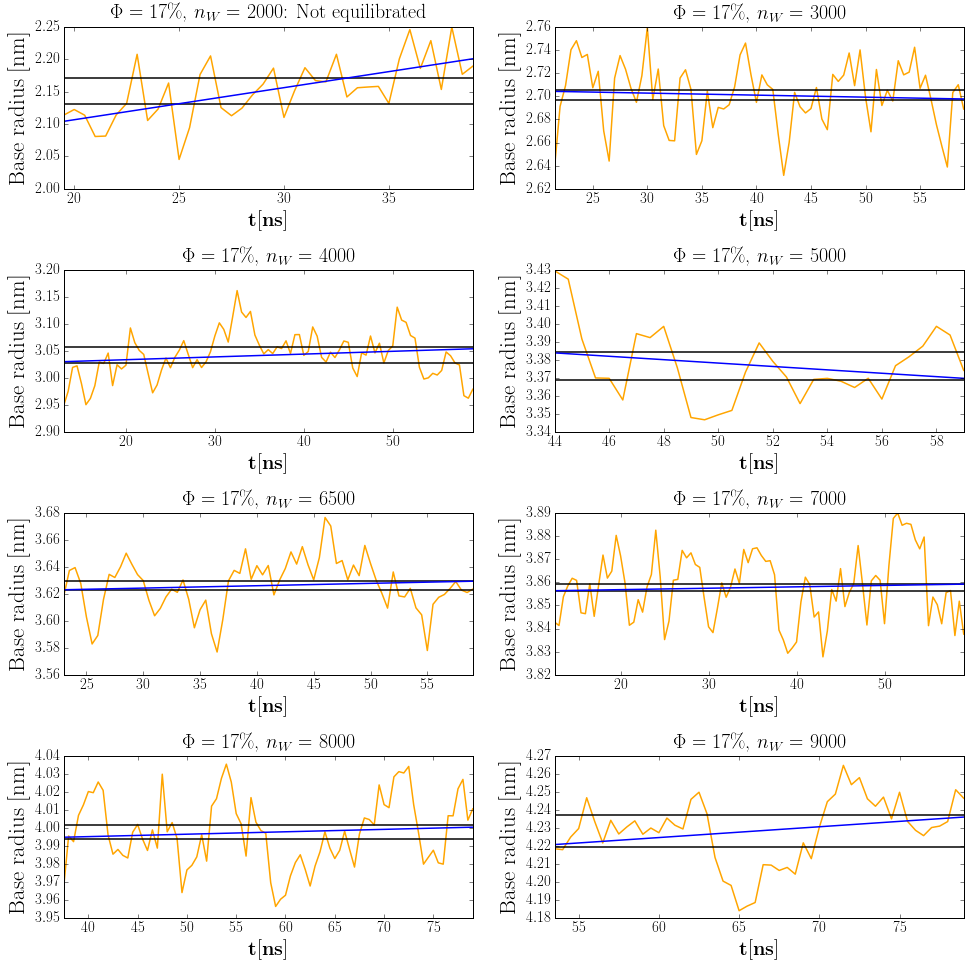

In [34]:
b=17

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

error_rbase_w[b]=[]
rbase_w[b]=[]
start_rbase_w[b]=[]
end_rbase_w[b]=[]
equil_rbase_w[b]=[]
i = 0
for c in Waters:
    
    n=Waters.index(c)

    rbase2 = array(radii_w[(b, c)])
    
    end=endpoint(rbase2)
    start=best_start(rbase2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(rbase2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (error_rbase_w[b]).append(errrorbar)
        (rbase_w[b]).append(rbasemean)
        (start_rbase_w[b]).append(start)
        (end_rbase_w[b]).append(end)
        (equil_rbase_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], rbase2[start:end],'-',color='orange',linewidth=1.5)     
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),color='blue', label=text,linewidth=1.5)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[start],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
    
plt.show()
fig.savefig('equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
3000  molec:
num of good intervals= 23
4000  molec:
num of good intervals= 14
5000  molec:
num of good intervals= 3
6500  molec:
num of good intervals= 27
7000  molec:
num of good intervals= 61
8000  molec:
num of good intervals= 24
9000  molec:
num of good intervals= 7


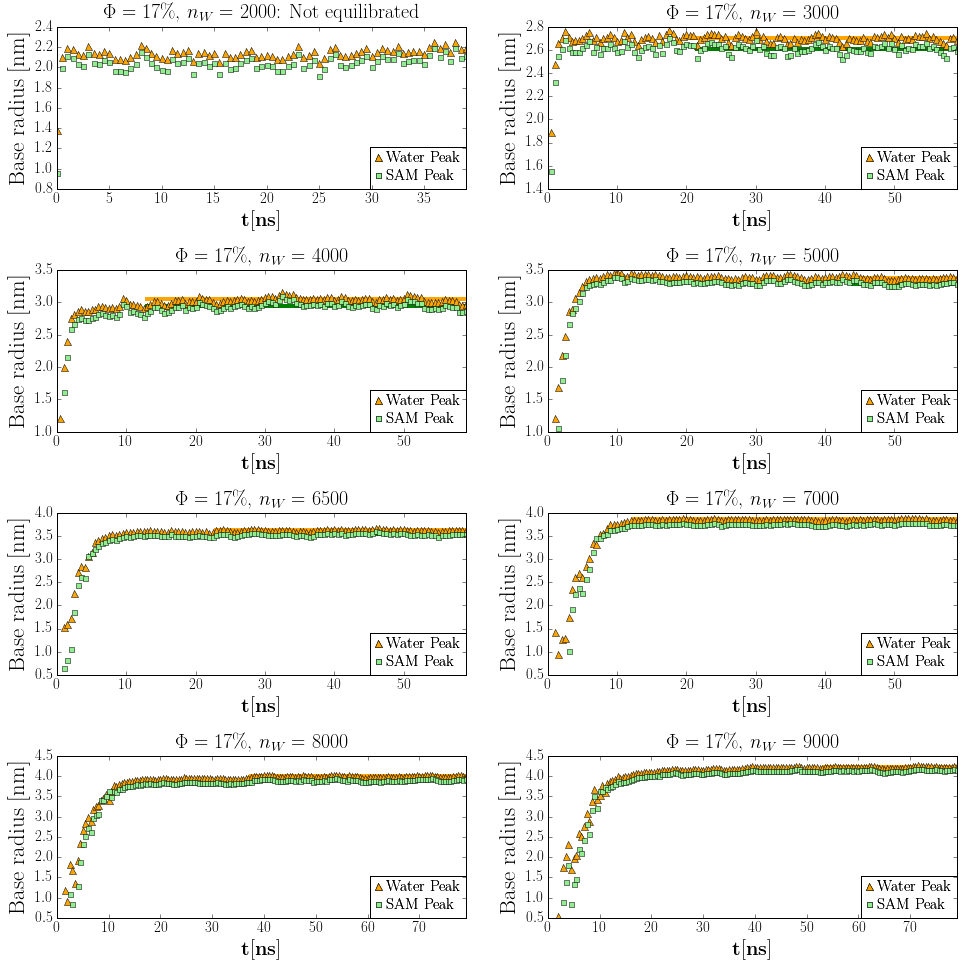

In [35]:
b=17

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 5
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#error_rbase_m[b]=[]
#rbase_m[b]=[]
#start_rbase_m[b]=[]
#end_rbase_m[b]=[]
#equil_rbase_m[b]=[]

error_rbase_s[b]=[]
rbase_s[b]=[]
start_rbase_s[b]=[]
end_rbase_s[b]=[]
equil_rbase_s[b]=[]

p=0
i = 0
for c in Waters:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    rbase2_w = array(radii_w[(b, c)])
    #rbase2_m = array(radii_m[(b, c)])
    rbase2_s = array(radii_s[(b, c)])
    
    end=endpoint(rbase2_w)
    start=best_start(rbase2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        rbasemean, errrorbar =blockAverage((rbase2_w[start:end]),blocksNum) 
        avrg_w = rbasemean*avrg_w
        
        #rbasemean, errrorbar =blockAverage((rbase2_m[start:end]),blocksNum)        
        #avrg_m = rbasemean*avrg_m
                
        #(error_rbase_m[b]).append(errrorbar)
        #(rbase_m[b]).append(rbasemean)
        #(start_rbase_m[b]).append(start)
        #(end_rbase_m[b]).append(end)
        #(equil_rbase_m[b]).append(c)
        
        rbasemean, errrorbar =blockAverage((rbase2_s[start:end]),blocksNum)        
        avrg_s = rbasemean*avrg_s
               
        (error_rbase_s[b]).append(errrorbar)
        (rbase_s[b]).append(rbasemean)
        (start_rbase_s[b]).append(start)
        (end_rbase_s[b]).append(end)
        (equil_rbase_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, rbase2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, rbase2_m,'h',  color='gray',label="GDS",markersize=6.0)
    ax.plot(t,rbase2_s,'s',label="SAM Peak", color='lightgreen',markersize=5.0)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[0],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')

    # Create a legend for the first line.
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

num of good intervals= 19
for SAM  21 % and  2000  molecules:
num of good intervals= 37
for SAM  21 % and  3000  molecules:
num of good intervals= 9
for SAM  21 % and  4000  molecules:
num of good intervals= 28
for SAM  21 % and  5000  molecules:
num of good intervals= 46
for SAM  21 % and  6500  molecules:
num of good intervals= 44
for SAM  21 % and  9000  molecules:


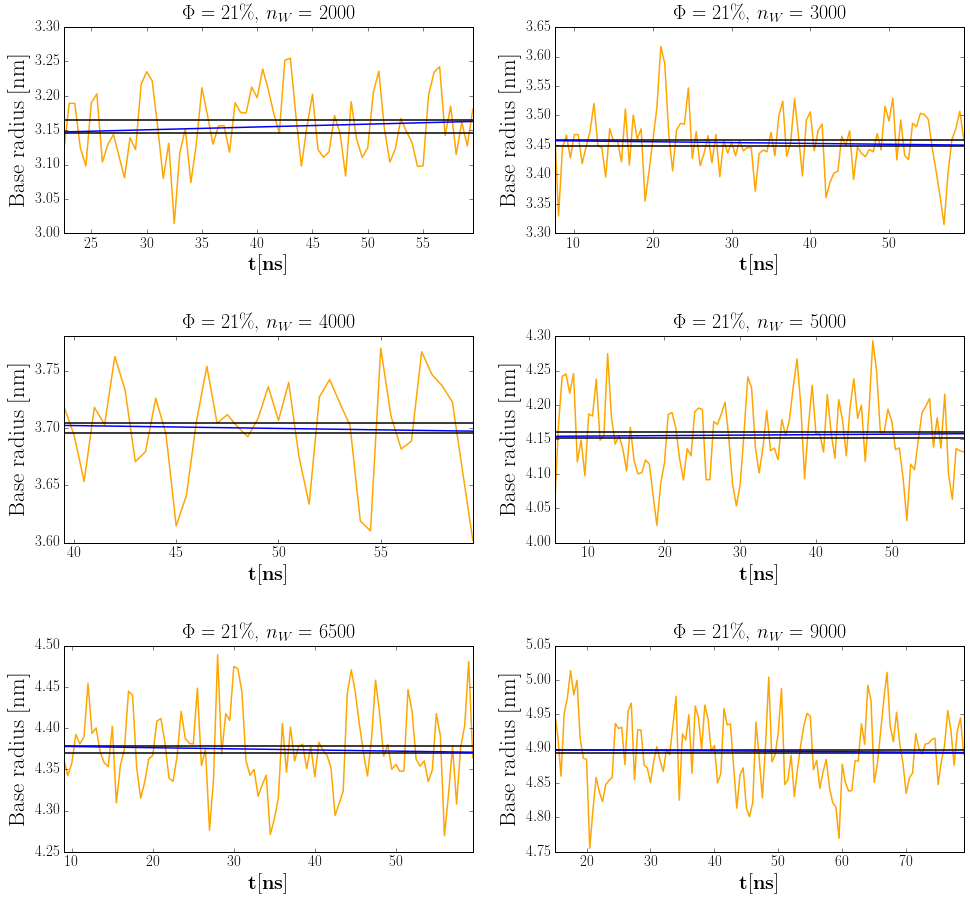

In [36]:
b=21

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

error_rbase_w[b]=[]
rbase_w[b]=[]
start_rbase_w[b]=[]
end_rbase_w[b]=[]
equil_rbase_w[b]=[]
i = 0
for c in [2000,3000,4000,5000,6500,9000]:
    
    n=Waters.index(c)

    rbase2 = array(radii_w[(b, c)])
    
    end=endpoint(rbase2)
    start=best_start(rbase2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(rbase2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (error_rbase_w[b]).append(errrorbar)
        (rbase_w[b]).append(rbasemean)
        (start_rbase_w[b]).append(start)
        (end_rbase_w[b]).append(end)
        (equil_rbase_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], rbase2[start:end],'-',color='orange',linewidth=1.5)     
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),color='blue', label=text,linewidth=1.5)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[start],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
    
plt.show()
fig.savefig('equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
num of good intervals= 19
3000  molec:
num of good intervals= 37
4000  molec:
num of good intervals= 9
5000  molec:
num of good intervals= 28
6500  molec:
num of good intervals= 46
9000  molec:
num of good intervals= 44


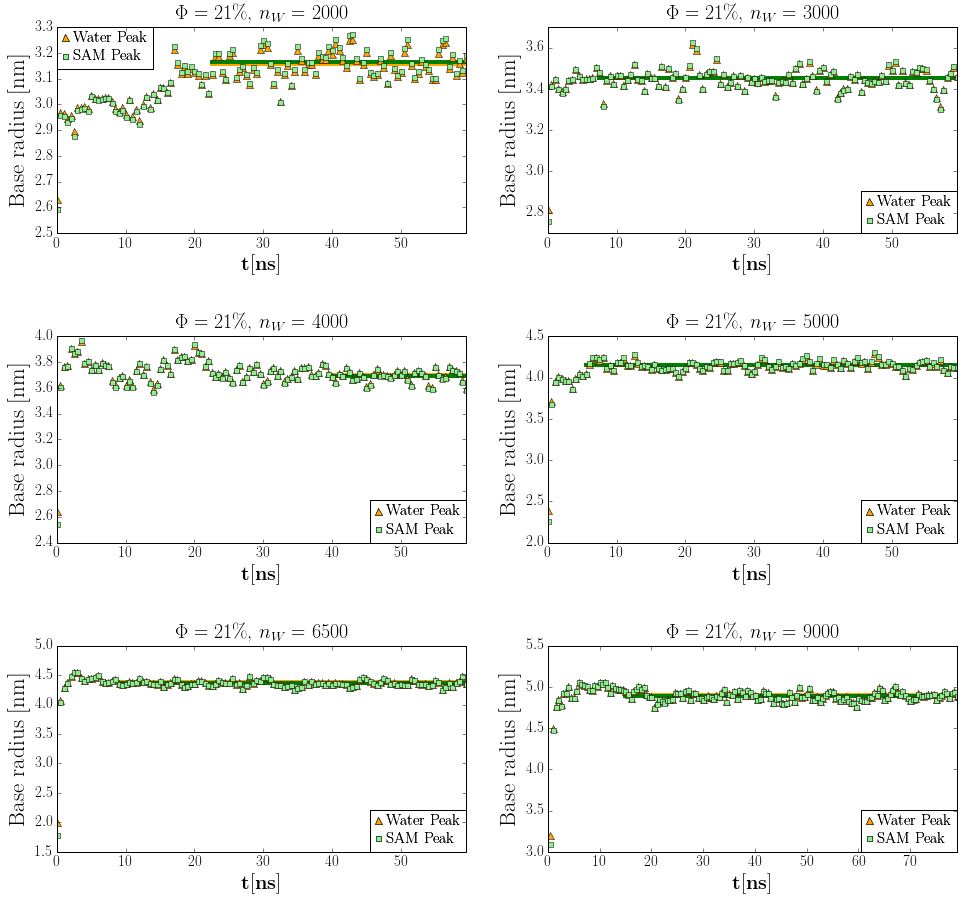

In [37]:
b=21

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#error_rbase_m[b]=[]
#rbase_m[b]=[]
#start_rbase_m[b]=[]
#end_rbase_m[b]=[]
#equil_rbase_m[b]=[]

error_rbase_s[b]=[]
rbase_s[b]=[]
start_rbase_s[b]=[]
end_rbase_s[b]=[]
equil_rbase_s[b]=[]

p=0
i = 0
for c in [2000,3000,4000,5000,6500,9000]:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    rbase2_w = array(radii_w[(b, c)])
    #rbase2_m = array(radii_m[(b, c)])
    rbase2_s = array(radii_s[(b, c)])
    
    end=endpoint(rbase2_w)
    start=best_start(rbase2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        rbasemean, errrorbar =blockAverage((rbase2_w[start:end]),blocksNum) 
        avrg_w = rbasemean*avrg_w
        
        #rbasemean, errrorbar =blockAverage((rbase2_m[start:end]),blocksNum)        
        #avrg_m = rbasemean*avrg_m
                
        #(error_rbase_m[b]).append(errrorbar)
        #(rbase_m[b]).append(rbasemean)
        #(start_rbase_m[b]).append(start)
        #(end_rbase_m[b]).append(end)
        #(equil_rbase_m[b]).append(c)
        
        rbasemean, errrorbar =blockAverage((rbase2_s[start:end]),blocksNum)        
        avrg_s = rbasemean*avrg_s
               
        (error_rbase_s[b]).append(errrorbar)
        (rbase_s[b]).append(rbasemean)
        (start_rbase_s[b]).append(start)
        (end_rbase_s[b]).append(end)
        (equil_rbase_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, rbase2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, rbase2_m,'h',  color='gray',label="GDS",markersize=6.0)
    ax.plot(t,rbase2_s,'s',label="SAM Peak", color='lightgreen',markersize=5.0)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[0],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')

    # Create a legend for the first line.
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

num of good intervals= 90
for SAM  25 % and  2000  molecules:
num of good intervals= 28
for SAM  25 % and  3000  molecules:
num of good intervals= 1
for SAM  25 % and  4000  molecules:
num of good intervals= 33
for SAM  25 % and  5000  molecules:
num of good intervals= 10
for SAM  25 % and  6500  molecules:
num of good intervals= 4
for SAM  25 % and  9000  molecules:


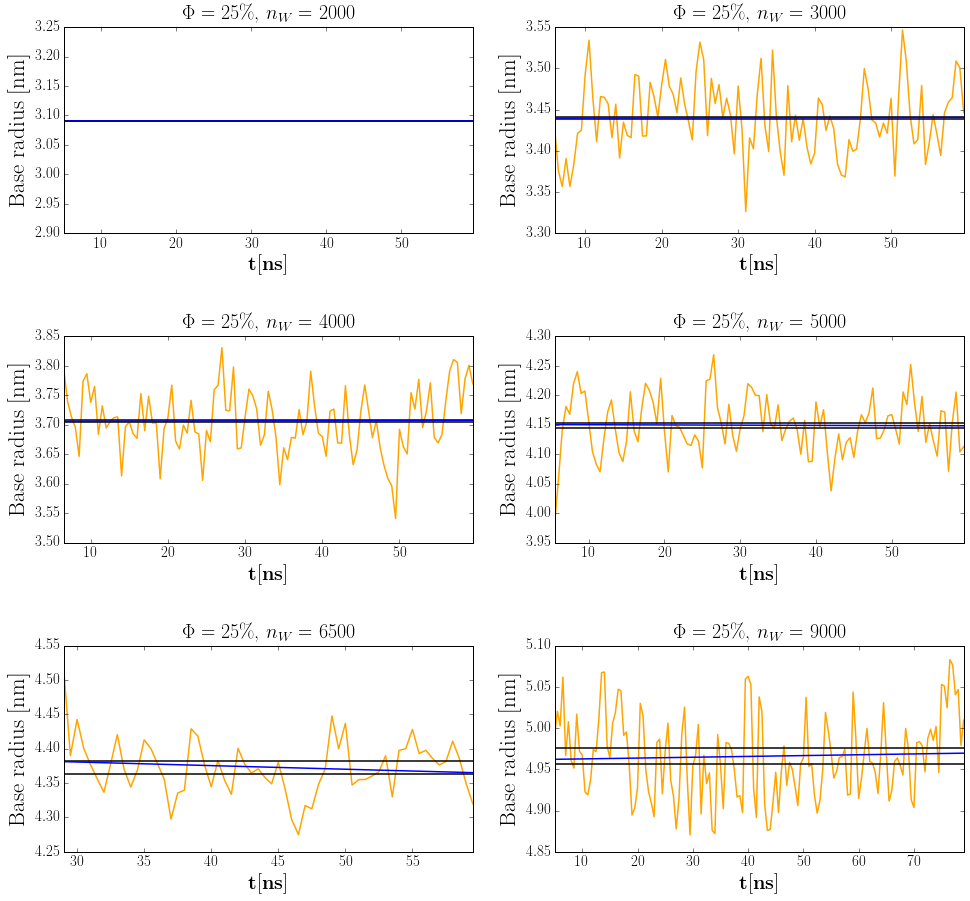

In [38]:
b=25

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

error_rbase_w[b]=[]
rbase_w[b]=[]
start_rbase_w[b]=[]
end_rbase_w[b]=[]
equil_rbase_w[b]=[]
i = 0
for c in [2000,3000,4000,5000,6500,9000]:
    
    n=Waters.index(c)

    rbase2 = array(radii_w[(b, c)])
    
    end=endpoint(rbase2)
    start=best_start(rbase2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(rbase2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (error_rbase_w[b]).append(errrorbar)
        (rbase_w[b]).append(rbasemean)
        (start_rbase_w[b]).append(start)
        (end_rbase_w[b]).append(end)
        (equil_rbase_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], rbase2[start:end],'-',color='orange',linewidth=1.5)     
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),color='blue', label=text,linewidth=1.5)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[start],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
    
plt.show()
fig.savefig('equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
num of good intervals= 90
3000  molec:
num of good intervals= 28
4000  molec:
num of good intervals= 1
5000  molec:
num of good intervals= 33
6500  molec:
num of good intervals= 10
9000  molec:
num of good intervals= 4


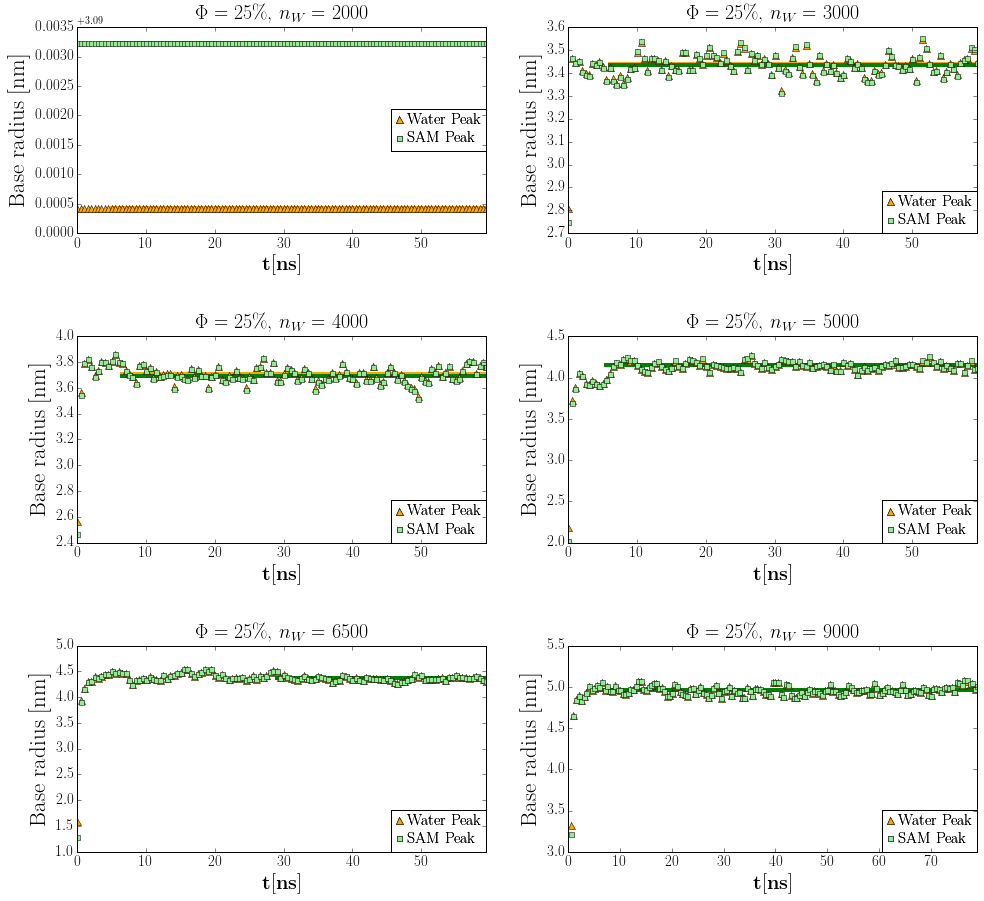

In [39]:
b=25

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#error_rbase_m[b]=[]
#rbase_m[b]=[]
#start_rbase_m[b]=[]
#end_rbase_m[b]=[]
#equil_rbase_m[b]=[]

error_rbase_s[b]=[]
rbase_s[b]=[]
start_rbase_s[b]=[]
end_rbase_s[b]=[]
equil_rbase_s[b]=[]

p=0
i = 0
for c in [2000,3000,4000,5000,6500,9000]:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    rbase2_w = array(radii_w[(b, c)])
    #rbase2_m = array(radii_m[(b, c)])
    rbase2_s = array(radii_s[(b, c)])
    
    end=endpoint(rbase2_w)
    start=best_start(rbase2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        rbasemean, errrorbar =blockAverage((rbase2_w[start:end]),blocksNum) 
        avrg_w = rbasemean*avrg_w
        
        #rbasemean, errrorbar =blockAverage((rbase2_m[start:end]),blocksNum)        
        #avrg_m = rbasemean*avrg_m
                
        #(error_rbase_m[b]).append(errrorbar)
        #(rbase_m[b]).append(rbasemean)
        #(start_rbase_m[b]).append(start)
        #(end_rbase_m[b]).append(end)
        #(equil_rbase_m[b]).append(c)
        
        rbasemean, errrorbar =blockAverage((rbase2_s[start:end]),blocksNum)        
        avrg_s = rbasemean*avrg_s
               
        (error_rbase_s[b]).append(errrorbar)
        (rbase_s[b]).append(rbasemean)
        (start_rbase_s[b]).append(start)
        (end_rbase_s[b]).append(end)
        (equil_rbase_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, rbase2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, rbase2_m,'h',  color='gray',label="GDS",markersize=6.0)
    ax.plot(t,rbase2_s,'s',label="SAM Peak", color='lightgreen',markersize=5.0)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[0],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')

    # Create a legend for the first line.
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

num of good intervals= 59
for SAM  33 % and  2000  molecules:
num of good intervals= 32
for SAM  33 % and  3000  molecules:
num of good intervals= 30
for SAM  33 % and  4000  molecules:
num of good intervals= 9
for SAM  33 % and  5000  molecules:
num of good intervals= 55
for SAM  33 % and  6500  molecules:
num of good intervals= 40
for SAM  33 % and  9000  molecules:


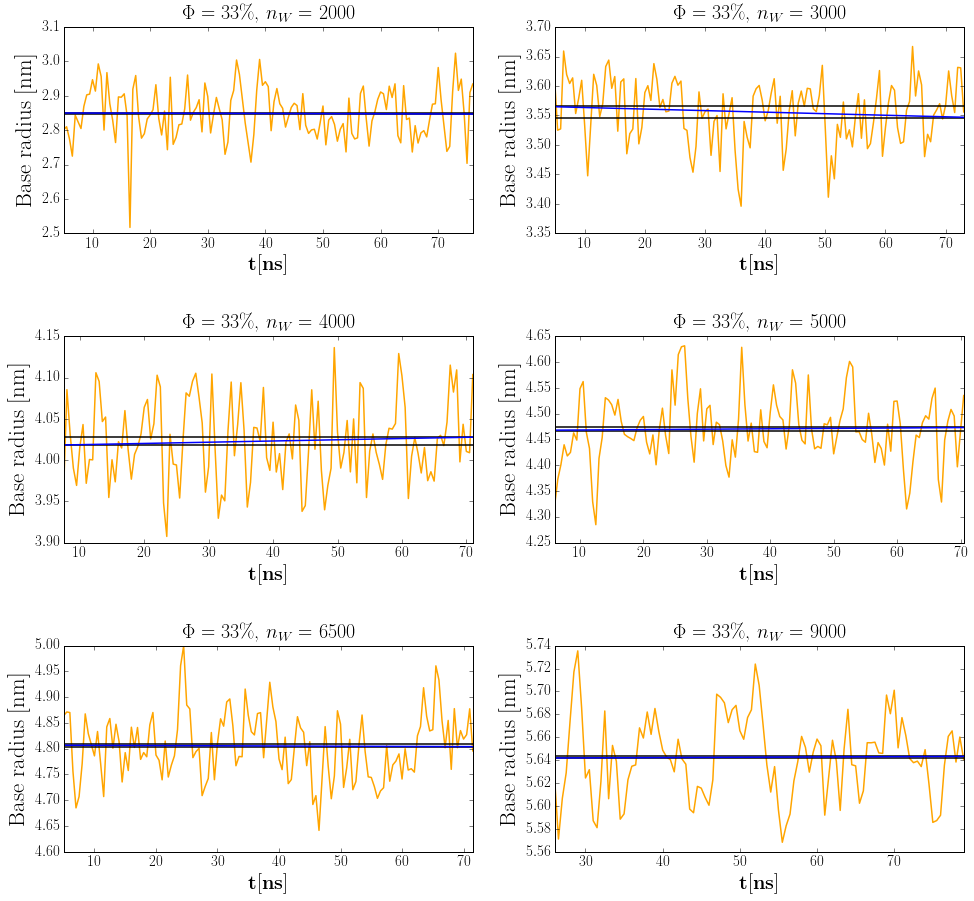

In [40]:
b=33

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

error_rbase_w[b]=[]
rbase_w[b]=[]
start_rbase_w[b]=[]
end_rbase_w[b]=[]
equil_rbase_w[b]=[]
i = 0
for c in [2000,3000,4000,5000,6500,9000]:
    
    n=Waters.index(c)

    rbase2 = array(radii_w[(b, c)])
    
    end=endpoint(rbase2)
    start=best_start(rbase2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(rbase2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (error_rbase_w[b]).append(errrorbar)
        (rbase_w[b]).append(rbasemean)
        (start_rbase_w[b]).append(start)
        (end_rbase_w[b]).append(end)
        (equil_rbase_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], rbase2[start:end],'-',color='orange',linewidth=1.5)     
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),color='blue', label=text,linewidth=1.5)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[start],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
    
plt.show()
fig.savefig('equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

2000  molec:
num of good intervals= 59
3000  molec:
num of good intervals= 32
4000  molec:
num of good intervals= 30
5000  molec:
num of good intervals= 9
6500  molec:
num of good intervals= 55
9000  molec:
num of good intervals= 40


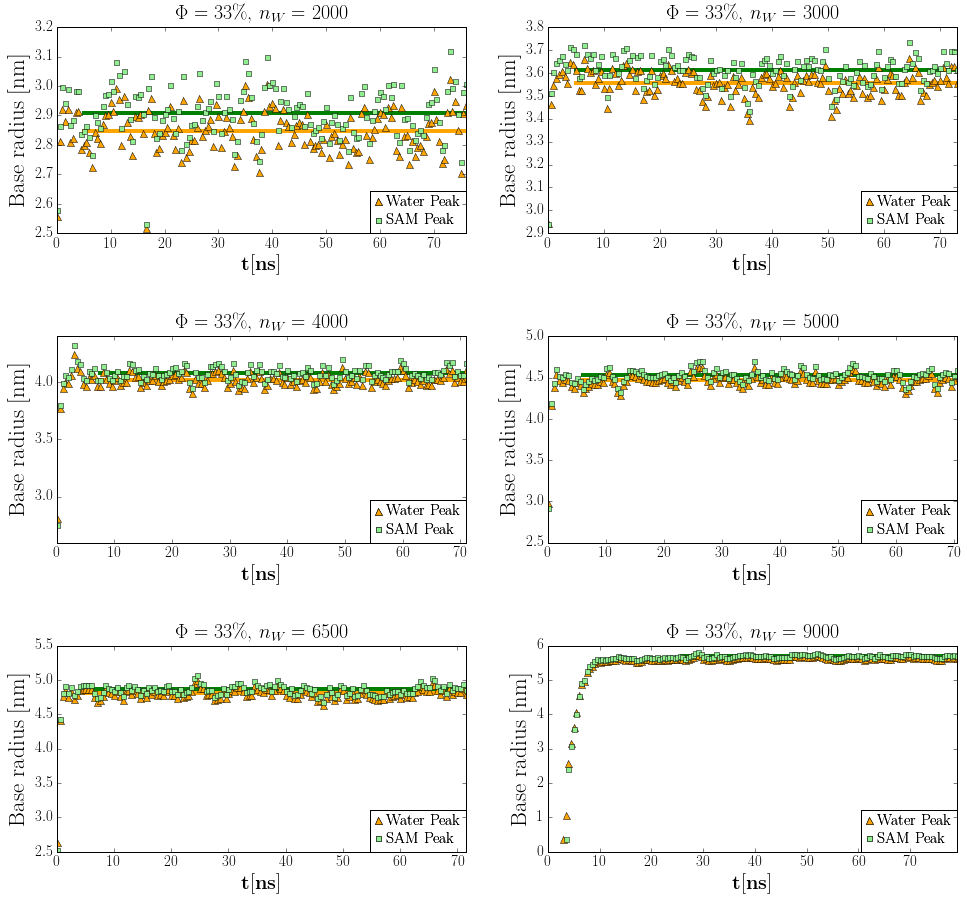

In [41]:
b=33

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#error_rbase_m[b]=[]
#rbase_m[b]=[]
#start_rbase_m[b]=[]
#end_rbase_m[b]=[]
#equil_rbase_m[b]=[]

error_rbase_s[b]=[]
rbase_s[b]=[]
start_rbase_s[b]=[]
end_rbase_s[b]=[]
equil_rbase_s[b]=[]

p=0
i = 0
for c in [2000,3000,4000,5000,6500,9000]:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    rbase2_w = array(radii_w[(b, c)])
    #rbase2_m = array(radii_m[(b, c)])
    rbase2_s = array(radii_s[(b, c)])
    
    end=endpoint(rbase2_w)
    start=best_start(rbase2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        rbasemean, errrorbar =blockAverage((rbase2_w[start:end]),blocksNum) 
        avrg_w = rbasemean*avrg_w
        
        #rbasemean, errrorbar =blockAverage((rbase2_m[start:end]),blocksNum)        
        #avrg_m = rbasemean*avrg_m
                
        #(error_rbase_m[b]).append(errrorbar)
        #(rbase_m[b]).append(rbasemean)
        #(start_rbase_m[b]).append(start)
        #(end_rbase_m[b]).append(end)
        #(equil_rbase_m[b]).append(c)
        
        rbasemean, errrorbar =blockAverage((rbase2_s[start:end]),blocksNum)        
        avrg_s = rbasemean*avrg_s
               
        (error_rbase_s[b]).append(errrorbar)
        (rbase_s[b]).append(rbasemean)
        (start_rbase_s[b]).append(start)
        (end_rbase_s[b]).append(end)
        (equil_rbase_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, rbase2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, rbase2_m,'h',  color='gray',label="GDS",markersize=6.0)
    ax.plot(t,rbase2_s,'s',label="SAM Peak", color='lightgreen',markersize=5.0)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[0],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')

    # Create a legend for the first line.
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

for SAM  41 % and  3000  molecules:
 Not equilibrated!
num of good intervals= 30
for SAM  41 % and  4000  molecules:
num of good intervals= 13
for SAM  41 % and  5000  molecules:
num of good intervals= 26
for SAM  41 % and  6500  molecules:
num of good intervals= 59
for SAM  41 % and  7000  molecules:
num of good intervals= 36
for SAM  41 % and  9000  molecules:


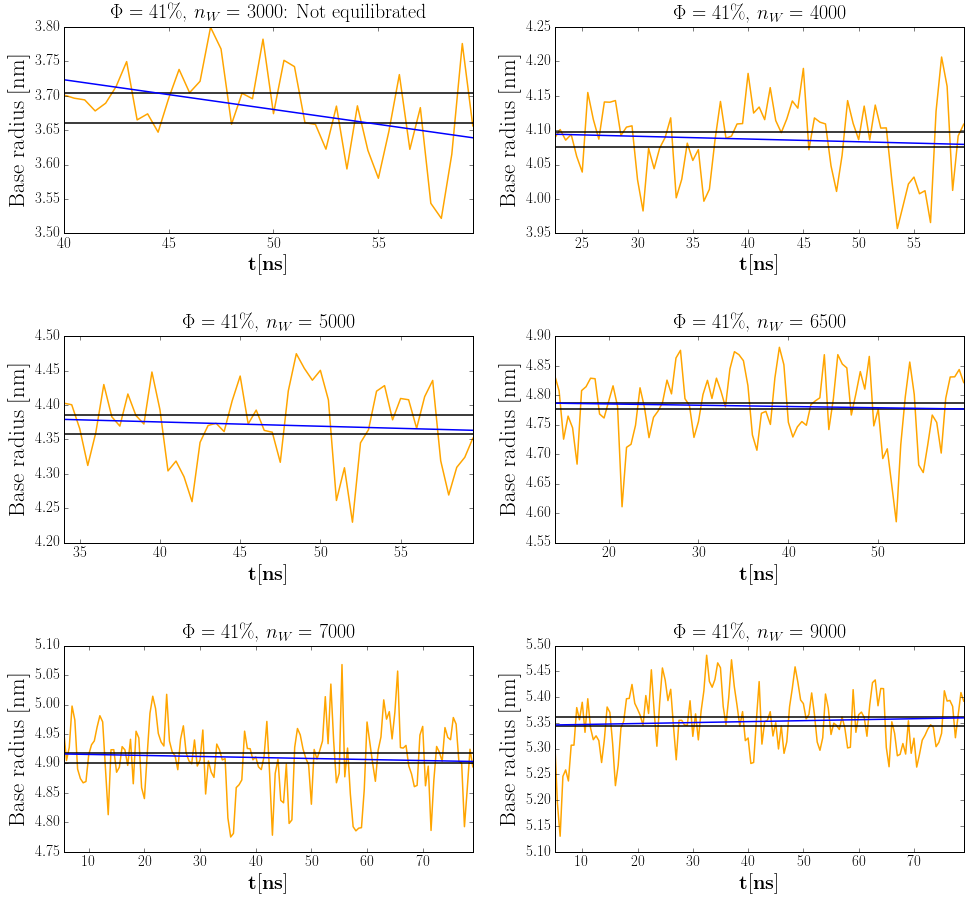

In [64]:
b=41

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2


fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 0

error_rbase_w[b]=[]
rbase_w[b]=[]
start_rbase_w[b]=[]
end_rbase_w[b]=[]
equil_rbase_w[b]=[]
i = 0
for c in [3000,4000,5000,6500,7000,9000]:
    
    n=Waters.index(c)

    rbase2 = array(radii_w[(b, c)])
    
    end=endpoint(rbase2)
    start=best_start(rbase2,t,beg,minblocksize)    
    print "for SAM ",b,"% and ", c, " molecules:"
    
    if start == None:
        print " Not equilibrated!"
        sampling = 0
        end = endpoint(rbase2)
        start = end-40
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        #text='Last 20ns: Not equilibrated'
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

    else:
        slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],rbase2[start:end])
        rbasemean, errrorbar =blockAverage((rbase2[start:end]),blocksNum)
        sampling = (end-start)/2.
        m=str(round(abs(slope)*(end-start)/2.,3))
        text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'
        (error_rbase_w[b]).append(errrorbar)
        (rbase_w[b]).append(rbasemean)
        (start_rbase_w[b]).append(start)
        (end_rbase_w[b]).append(end)
        (equil_rbase_w[b]).append(c)
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)
    ax.plot(t[start:end], rbase2[start:end],'-',color='orange',linewidth=1.5)     
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean+errrorbar),'k-',linewidth=1.5)
    ax.plot(t[start:end], func(t[start:end], 0, rbasemean-errrorbar),'k-',linewidth=1.5)
    line1, = ax.plot(t[start:end], func(t[start:end], slope, intercept),color='blue', label=text,linewidth=1.5)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[start],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')
    

    # Create a legend for the first line.
    #first_legend = plt.legend(loc=1,borderaxespad=0.,borderpad=0.2,fontsize=14)
    # Add the legend manually to the current Axes.
    #ax = plt.gca().add_artist(first_legend)

    i = i+1
    
plt.show()
fig.savefig('equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'equil_Rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

3000  molec:
4000  molec:
num of good intervals= 30
5000  molec:
num of good intervals= 13
6500  molec:
num of good intervals= 26
7000  molec:
num of good intervals= 59
9000  molec:
num of good intervals= 36


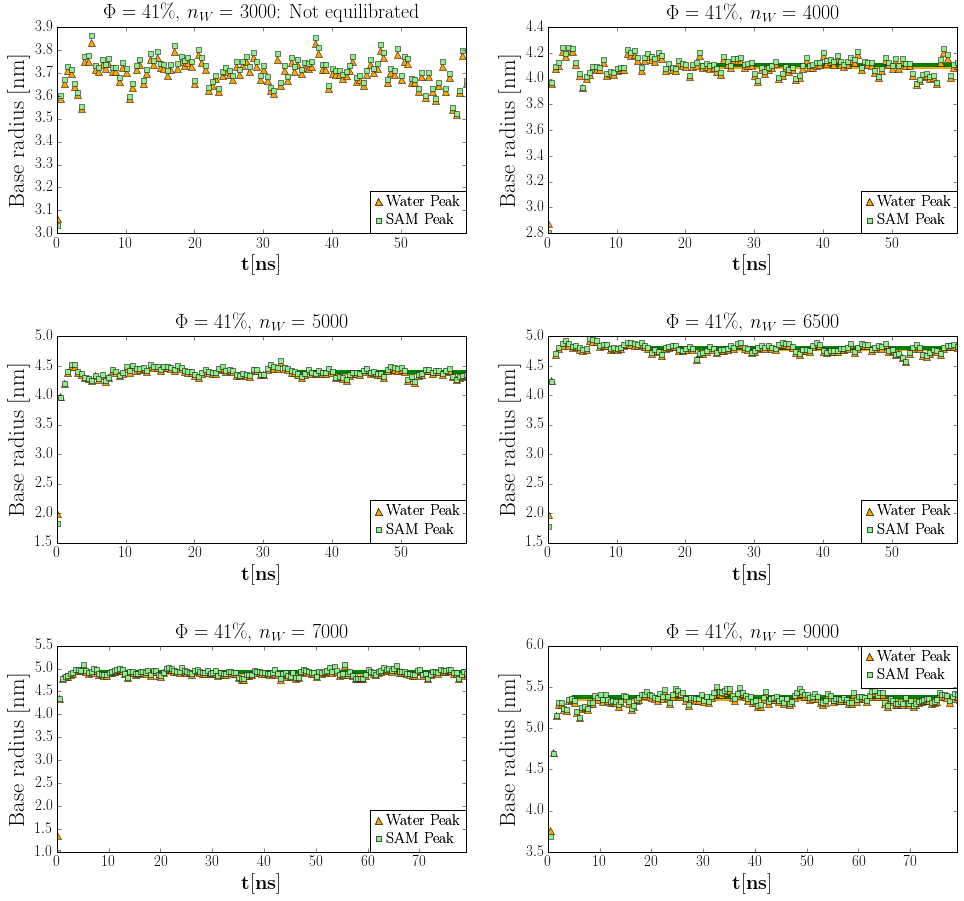

In [65]:
b=41

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging

Nrows = 4
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,3.5),dpi=400)
fig.subplots_adjust(bottom=0.0,top=4.5, left=0., right=2.5, hspace = 0.5)

matplotlib.rcParams['legend.handlelength'] = 1

#error_rbase_m[b]=[]
#rbase_m[b]=[]
#start_rbase_m[b]=[]
#end_rbase_m[b]=[]
#equil_rbase_m[b]=[]

error_rbase_s[b]=[]
rbase_s[b]=[]
start_rbase_s[b]=[]
end_rbase_s[b]=[]
equil_rbase_s[b]=[]

p=0
i = 0
for c in [3000,4000,5000,6500,7000,9000]:
#for c in [1000]:
    print c," molec:"
    n=Waters.index(c)
    
    ax = plt.subplot(Nrows, Ncolumns, i+1)

    rbase2_w = array(radii_w[(b, c)])
    #rbase2_m = array(radii_m[(b, c)])
    rbase2_s = array(radii_s[(b, c)])
    
    end=endpoint(rbase2_w)
    start=best_start(rbase2_w,t,beg,minblocksize)
    # SAVING RESULTS
    if start != None:
        avrg_w = np.ones(end - start)
        #avrg_m = np.ones(end - start)
        avrg_s = np.ones(end - start)
        
        t_avrg_w = t[start:end]
        #t_avrg_m = t[start:end]
        t_avrg_s = t[start:end]
        
        rbasemean, errrorbar =blockAverage((rbase2_w[start:end]),blocksNum) 
        avrg_w = rbasemean*avrg_w
        
        #rbasemean, errrorbar =blockAverage((rbase2_m[start:end]),blocksNum)        
        #avrg_m = rbasemean*avrg_m
                
        #(error_rbase_m[b]).append(errrorbar)
        #(rbase_m[b]).append(rbasemean)
        #(start_rbase_m[b]).append(start)
        #(end_rbase_m[b]).append(end)
        #(equil_rbase_m[b]).append(c)
        
        rbasemean, errrorbar =blockAverage((rbase2_s[start:end]),blocksNum)        
        avrg_s = rbasemean*avrg_s
               
        (error_rbase_s[b]).append(errrorbar)
        (rbase_s[b]).append(rbasemean)
        (start_rbase_s[b]).append(start)
        (end_rbase_s[b]).append(end)
        (equil_rbase_s[b]).append(c)
        
        ax.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
        #ax.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
        ax.plot(t_avrg_s, avrg_s,'g-',linewidth=4)
        
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
    
        p=p+1
        
    else:
        start=end-20
        titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    
    ax.plot(t, rbase2_w,'^',label="Water Peak",color='orange',markersize=7.0)
    #ax.plot(t, rbase2_m,'h',  color='gray',label="GDS",markersize=6.0)
    ax.plot(t,rbase2_s,'s',label="SAM Peak", color='lightgreen',markersize=5.0)
    
    #We set the ticks size
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    # Labels with symbols
    ax.set_xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
    #ax.set_ylabel(r'$\mathbf{\theta_{mic} \ [deg]}$',fontsize=23)
    
    # Labels with names
    #ax.set_ylabel('Contact Angle [deg]',fontsize=23)
    ax.set_ylabel('Base radius [nm]',fontsize=23)
    
    ax.set_xlim([t[0],t[end-1]])
    
    #titles for each subplot:
    ax.set_title(titletext,fontsize=20,fontweight='bold')

    # Create a legend for the first line.
    first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    i = i+1

plt.show()
fig.savefig('rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)
fig.savefig(plotsfolder+'rbase_t_s'+str(b)+'.jpg', bbox_inches='tight',dpi=400)

In [66]:
for i in SAMs:
    x = rbase_w[i]
    y = theta_w[i]
    print "WaterPeak: SAM",i,"%, len(rbase_w)=",len(x),"len(theta_w)=",len(y)
    #x = rbase_m[i]
    #y = theta_m[i]
    #print "MiddlePeak: SAM",i,"%, len(rbase_m)=",len(x),"len(theta_m)=",len(y)
    x = rbase_s[i]
    y = theta_s[i]
    print "SAMPeak: SAM",i,"%, len(rbase_s)=",len(x),"len(theta_s)=",len(y),"\n"
    #if x.all() != 0:
        #x = 1/x
        #y = cos(radians(theta[i]))  

print equil_theta_w[33], equil_rbase_w[33]

WaterPeak: SAM 0 %, len(rbase_w)= 7 len(theta_w)= 7
SAMPeak: SAM 0 %, len(rbase_s)= 7 len(theta_s)= 7 

WaterPeak: SAM 5 %, len(rbase_w)= 8 len(theta_w)= 8
SAMPeak: SAM 5 %, len(rbase_s)= 8 len(theta_s)= 8 

WaterPeak: SAM 11 %, len(rbase_w)= 7 len(theta_w)= 7
SAMPeak: SAM 11 %, len(rbase_s)= 7 len(theta_s)= 7 

WaterPeak: SAM 17 %, len(rbase_w)= 7 len(theta_w)= 7
SAMPeak: SAM 17 %, len(rbase_s)= 7 len(theta_s)= 7 

WaterPeak: SAM 21 %, len(rbase_w)= 6 len(theta_w)= 6
SAMPeak: SAM 21 %, len(rbase_s)= 6 len(theta_s)= 6 

WaterPeak: SAM 25 %, len(rbase_w)= 6 len(theta_w)= 6
SAMPeak: SAM 25 %, len(rbase_s)= 6 len(theta_s)= 6 

WaterPeak: SAM 33 %, len(rbase_w)= 6 len(theta_w)= 6
SAMPeak: SAM 33 %, len(rbase_s)= 6 len(theta_s)= 6 

WaterPeak: SAM 41 %, len(rbase_w)= 5 len(theta_w)= 4
SAMPeak: SAM 41 %, len(rbase_s)= 5 len(theta_s)= 4 

[2000, 3000, 4000, 5000, 6500, 9000] [2000, 3000, 4000, 5000, 6500, 9000]


Checking vector lengths...
7 7 7 7
x= [0.68489927657790095, 0.57216805035851837, 0.51617604357193603, 0.472482541700328, 0.4451246579204225, 0.39873950119327334, 0.37984989966729188]
y= [-0.67325568544198322, -0.70734949281119608, -0.72179212716014785, -0.72855668996951872, -0.73644698846547518, -0.73813394272412691, -0.73555691627279973]
x_error= [0.0022844159412540505, 0.0022104745361675952, 0.00090502093417454748, 0.00097503971236840951, 0.0014032565541093908, 0.0010540578388901942, 0.00042817853314534729]
y_error= [-0.00074903787682089901, -0.0024127482044876791, -0.001172589925085985, -0.0012465244499655199, -0.0019345477339718544, -0.0015813692762161387, -0.00074049646884666504]


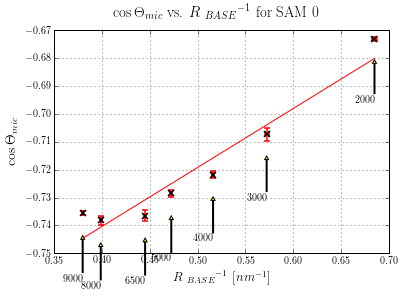

In [50]:
i=0
x = []
y = []
x_error = []
y_error = []
mn=min(len(rbase_w[i]),len(theta_w[i]))
for j in range(mn):
    x.append(1/rbase_w[i][j])
    x_error.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
    y.append(cos(radians(theta_w[i][j])))
    y_error.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j]))

print "Checking vector lengths..."
print len(x),len(y),len(x_error),len(y_error)
print "x=",x
print "y=",y
print "x_error=",x_error
print "y_error=",y_error
    
slope, intercept, delete1, delete2, delete3 = stats.linregress(x,y)

yline=np.zeros(len(x))
m=0
for l in x:
    yline[m] = func(l, slope, intercept)
    m = m+1


# PLOT INSTEAD OF SUBPLOT
plt.figure()
plt.errorbar(x, y, xerr=x_error, yerr=y_error,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(x, yline, color='r')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$',fontsize=13)
plt.ylabel(r' $\cos\Theta_{mic}$ ',fontsize=14)
mytitle = plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(i)+'%', fontsize=15,fontweight='bold')

# Labels next to each point
for j in range(mn):
    xarrow = x[j]
    yarrow =y[j] + ((y[j])*0.01)
    xtext = x[j]
    ytext = y[j] + ((y[j])*0.03)
    plt.annotate(str(equil_rbase_w[i][j]), xy=(xarrow,yarrow), xytext=(xtext,ytext),arrowprops=dict(facecolor='yellow', shrink=0.05,
                                                                                                  width=1, headwidth=4),
                horizontalalignment='right', verticalalignment='top',)
    #ax.annotate(str(equil_rbase[i][j]), xytext=(xtext,ytext), xy=(xarrow,yarrow),horizontalalignment='right', verticalalignment='top',)
    
plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
plt.show()
fig.savefig('s'+str(i)+'_cos_r.jpg',bbox_extra_artists=(mytitle,), bbox_inches='tight')

Checking vector lengths...
8 8 8 8
x= [0.50188581055277637, 0.4723765215866545, 0.37712432086104319, 0.36833867349518501, 0.35392210581834288, 0.35286759569861242, 0.34624890188068491, 0.34277491861235615]
y= [-0.60301406183314998, -0.65850992948465603, -0.54634951318564928, -0.59452961400754722, -0.63947060403397937, -0.6543503793190214, -0.67429238350256249, -0.69679431365927824]
x_error= [0.00045112781860626107, 0.001447636262541963, 0.00021289934280000391, 0.00029733084187309478, 0.00045048508904043446, 0.00023037458478369398, 7.3621062728306197e-05, 0.00033239610313193338]
y_error= [-0.00066195823725364374, -0.0019080554349477062, -0.00044725707035733867, -0.00053597504598023888, -0.0011573503323290362, -0.00038653504562521939, -0.00013910199923443677, -0.00060789801832233307]


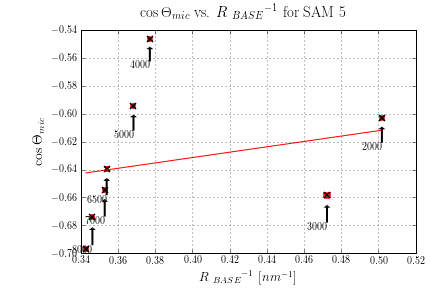

In [51]:
i=5
x = []
y = []
x_error = []
y_error = []
mn=min(len(rbase_w[i]),len(theta_w[i]))
for j in range(mn):
    x.append(1/rbase_w[i][j])
    x_error.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
    y.append(cos(radians(theta_w[i][j])))
    y_error.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j]))

print "Checking vector lengths..."
print len(x),len(y),len(x_error),len(y_error)
print "x=",x
print "y=",y
print "x_error=",x_error
print "y_error=",y_error
    
slope, intercept, delete1, delete2, delete3 = stats.linregress(x,y)

yline=np.zeros(len(x))
m=0
for l in x:
    yline[m] = func(l, slope, intercept)
    m = m+1


# PLOT INSTEAD OF SUBPLOT
plt.figure()
plt.errorbar(x, y, xerr=x_error, yerr=y_error,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(x, yline, color='r')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$',fontsize=13)
plt.ylabel(r' $\cos\Theta_{mic}$ ',fontsize=14)
mytitle = plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(i)+'%', fontsize=15,fontweight='bold')

# Labels next to each point
for j in range(mn):
    xarrow = x[j]
    yarrow =y[j] + ((y[j])*0.01)
    xtext = x[j]
    ytext = y[j] + ((y[j])*0.03)
    plt.annotate(str(equil_rbase_w[i][j]), xy=(xarrow,yarrow), xytext=(xtext,ytext),arrowprops=dict(facecolor='yellow', shrink=0.05,
                                                                                                  width=1, headwidth=4),
                horizontalalignment='right', verticalalignment='top',)
    #ax.annotate(str(equil_rbase[i][j]), xytext=(xtext,ytext), xy=(xarrow,yarrow),horizontalalignment='right', verticalalignment='top',)
    
plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
plt.show()
fig.savefig('s'+str(i)+'_cos_r.jpg',bbox_extra_artists=(mytitle,), bbox_inches='tight')

Checking vector lengths...
7 7 7 7
x= [0.51889139645101134, 0.42483973487859467, 0.33158260507395426, 0.32500929014241864, 0.27937466499804631, 0.2846504183878153, 0.26690171542881841]
y= [-0.35508520393961451, -0.41598652785058376, -0.38824406476336715, -0.45932139473067962, -0.3791566979096902, -0.43388755345469776, -0.40944590297684968]
x_error= [0.011076823289662608, 0.00080965541183776479, 0.00030331516230373888, 0.00019056188935675882, 0.00015021856763222939, 0.00088213771290432885, 0.00029627774136231096]
y_error= [-0.011703679259262056, -0.0012313437974955631, -0.00057864817675390488, -0.00031078111884461719, -0.00027855520207234133, -0.0018033529989148578, -0.00065458789331198503]


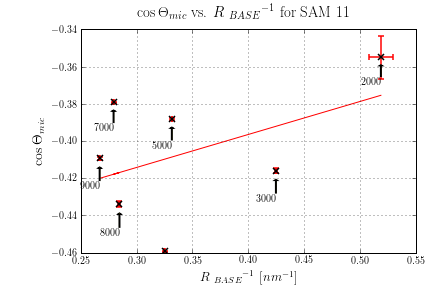

In [52]:
i=11
x = []
y = []
x_error = []
y_error = []
mn=min(len(rbase_w[i]),len(theta_w[i]))
for j in range(mn):
    x.append(1/rbase_w[i][j])
    x_error.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
    y.append(cos(radians(theta_w[i][j])))
    y_error.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j]))

print "Checking vector lengths..."
print len(x),len(y),len(x_error),len(y_error)
print "x=",x
print "y=",y
print "x_error=",x_error
print "y_error=",y_error
    
slope, intercept, delete1, delete2, delete3 = stats.linregress(x,y)

yline=np.zeros(len(x))
m=0
for l in x:
    yline[m] = func(l, slope, intercept)
    m = m+1


# PLOT INSTEAD OF SUBPLOT
plt.figure()
plt.errorbar(x, y, xerr=x_error, yerr=y_error,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(x, yline, color='r')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$',fontsize=13)
plt.ylabel(r' $\cos\Theta_{mic}$ ',fontsize=14)
mytitle = plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(i)+'%', fontsize=15,fontweight='bold')

# Labels next to each point
for j in range(mn):
    xarrow = x[j]
    yarrow =y[j] + ((y[j])*0.01)
    xtext = x[j]
    ytext = y[j] + ((y[j])*0.03)
    plt.annotate(str(equil_rbase_w[i][j]), xy=(xarrow,yarrow), xytext=(xtext,ytext),arrowprops=dict(facecolor='yellow', shrink=0.05,
                                                                                                  width=1, headwidth=4),
                horizontalalignment='right', verticalalignment='top',)
    #ax.annotate(str(equil_rbase[i][j]), xytext=(xtext,ytext), xy=(xarrow,yarrow),horizontalalignment='right', verticalalignment='top',)
    
plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
plt.show()
fig.savefig('s'+str(i)+'_cos_r.jpg',bbox_extra_artists=(mytitle,), bbox_inches='tight')

Checking vector lengths...
7 7 7 7
x= [0.37025282883257987, 0.32875306416260924, 0.29614085378024585, 0.27577226507269165, 0.25922035534845012, 0.25015326870005322, 0.23651624110093361]
y= [-0.19025751112114328, -0.21095702970002114, -0.19599258079495538, -0.21036454864653423, -0.26242116278857769, -0.2388155913632278, -0.22180584126950512]
x_error= [0.00056241469571575141, 0.0016177287303163034, 0.00068682838026265795, 0.00027331219952151303, 0.0001049433245924271, 0.00023566010027508595, 0.00049565410292830943]
y_error= [-0.00029706167087464939, -0.001998363980666459, -0.0007506018032789871, -0.00059659190596312119, -0.00032288801089127764, -0.0004855334237519977, -0.00084350484602183291]


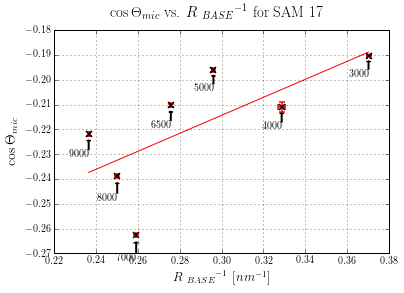

In [49]:
i=17
x = []
y = []
x_error = []
y_error = []
mn=min(len(rbase_w[i]),len(theta_w[i]))
for j in range(mn):
    x.append(1/rbase_w[i][j])
    x_error.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
    y.append(cos(radians(theta_w[i][j])))
    y_error.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j]))

print "Checking vector lengths..."
print len(x),len(y),len(x_error),len(y_error)
print "x=",x
print "y=",y
print "x_error=",x_error
print "y_error=",y_error
    
slope, intercept, delete1, delete2, delete3 = stats.linregress(x,y)

yline=np.zeros(len(x))
m=0
for l in x:
    yline[m] = func(l, slope, intercept)
    m = m+1


# PLOT INSTEAD OF SUBPLOT
plt.figure()
plt.errorbar(x, y, xerr=x_error, yerr=y_error,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(x, yline, color='r')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$',fontsize=13)
plt.ylabel(r' $\cos\Theta_{mic}$ ',fontsize=14)
mytitle = plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(i)+'%', fontsize=15,fontweight='bold')

# Labels next to each point
for j in range(mn):
    xarrow = x[j]
    yarrow =y[j] + ((y[j])*0.01)
    xtext = x[j]
    ytext = y[j] + ((y[j])*0.03)
    plt.annotate(str(equil_rbase_w[i][j]), xy=(xarrow,yarrow), xytext=(xtext,ytext),arrowprops=dict(facecolor='yellow', shrink=0.05,
                                                                                                  width=1, headwidth=4),
                horizontalalignment='right', verticalalignment='top',)
    #ax.annotate(str(equil_rbase[i][j]), xytext=(xtext,ytext), xy=(xarrow,yarrow),horizontalalignment='right', verticalalignment='top',)
    
plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
plt.show()
fig.savefig('s'+str(i)+'_cos_r.jpg',bbox_extra_artists=(mytitle,), bbox_inches='tight')

Checking vector lengths...
6 6 6 6
x= [0.31695291859272767, 0.28956911345213854, 0.27028689474655759, 0.24059312955915052, 0.22861035275775757, 0.20422965038651367]
y= [0.084619433313068329, 0.0055103507341046579, -0.054701634464632894, 0.025246704448908988, -0.055837915742015978, -0.044971012786249452]
x_error= [0.0009869510451438932, 0.00041297802849854016, 0.00030340439896803896, 0.00022861260723275475, 0.00021116115438327244, 9.0377487231794629e-05]
y_error= [0.00041945699078722534, 5.3566114483405671e-06, -0.00015409587372978487, 5.8709912656319276e-05, -9.1632245626448169e-05, -3.3157547174838142e-05]


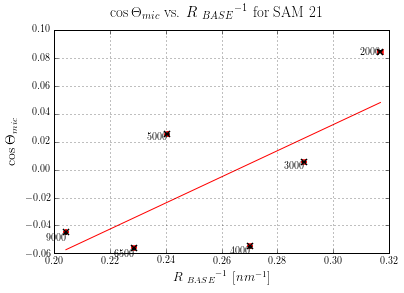

In [48]:
i=21
x = []
y = []
x_error = []
y_error = []
mn=min(len(rbase_w[i]),len(theta_w[i]))
for j in range(mn):
    x.append(1/rbase_w[i][j])
    x_error.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
    y.append(cos(radians(theta_w[i][j])))
    y_error.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j]))

print "Checking vector lengths..."
print len(x),len(y),len(x_error),len(y_error)
print "x=",x
print "y=",y
print "x_error=",x_error
print "y_error=",y_error
    
slope, intercept, delete1, delete2, delete3 = stats.linregress(x,y)

yline=np.zeros(len(x))
m=0
for l in x:
    yline[m] = func(l, slope, intercept)
    m = m+1


# PLOT INSTEAD OF SUBPLOT
plt.figure()
plt.errorbar(x, y, xerr=x_error, yerr=y_error,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(x, yline, color='r')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$',fontsize=13)
plt.ylabel(r' $\cos\Theta_{mic}$ ',fontsize=14)
mytitle = plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(i)+'%', fontsize=15,fontweight='bold')

# Labels next to each point
for j in range(mn):
    xarrow = x[j]
    yarrow =y[j] + ((y[j])*0.01)
    xtext = x[j]
    ytext = y[j] + ((y[j])*0.03)
    plt.annotate(str(equil_rbase_w[i][j]), xy=(xarrow,yarrow), xytext=(xtext,ytext),arrowprops=dict(facecolor='yellow', shrink=0.05,
                                                                                                  width=1, headwidth=4),
                horizontalalignment='right', verticalalignment='top',)
    #ax.annotate(str(equil_rbase[i][j]), xytext=(xtext,ytext), xy=(xarrow,yarrow),horizontalalignment='right', verticalalignment='top',)
    
plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
plt.show()
fig.savefig('s'+str(i)+'_cos_r.jpg',bbox_extra_artists=(mytitle,), bbox_inches='tight')

Checking vector lengths...
6 6 6 6
x= [0.32357964988623095, 0.29069970145118335, 0.26980026811832925, 0.24101117542165115, 0.22868387526076625, 0.20138169341191692]
y= [0.042570393910025796, -0.00049464823513187045, -0.051577362611553802, 0.023498673298616362, -0.053972007634903681, -0.018487227035918971]
x_error= [0.0, 0.00012957633501131275, 8.0095976196079143e-05, 0.00024973748219981408, 0.0005015597306628069, 0.00039752347520477125]
y_error= [0.0, -5.9969769072495987e-07, -6.4565239208071959e-05, 4.6940803366512624e-05, -0.00022558258388486163, -7.5429324235162779e-05]


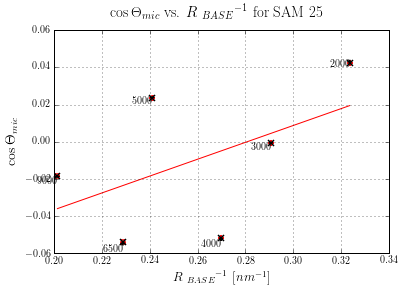

In [47]:
i=25
x = []
y = []
x_error = []
y_error = []
mn=min(len(rbase_w[i]),len(theta_w[i]))
for j in range(mn):
    x.append(1/rbase_w[i][j])
    x_error.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
    y.append(cos(radians(theta_w[i][j])))
    y_error.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j]))

print "Checking vector lengths..."
print len(x),len(y),len(x_error),len(y_error)
print "x=",x
print "y=",y
print "x_error=",x_error
print "y_error=",y_error
    
slope, intercept, delete1, delete2, delete3 = stats.linregress(x,y)

yline=np.zeros(len(x))
m=0
for l in x:
    yline[m] = func(l, slope, intercept)
    m = m+1


# PLOT INSTEAD OF SUBPLOT
plt.figure()
plt.errorbar(x, y, xerr=x_error, yerr=y_error,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(x, yline, color='r')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$',fontsize=13)
plt.ylabel(r' $\cos\Theta_{mic}$ ',fontsize=14)
mytitle = plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(i)+'%', fontsize=15,fontweight='bold')

# Labels next to each point
for j in range(mn):
    xarrow = x[j]
    yarrow =y[j] + ((y[j])*0.01)
    xtext = x[j]
    ytext = y[j] + ((y[j])*0.03)
    plt.annotate(str(equil_rbase_w[i][j]), xy=(xarrow,yarrow), xytext=(xtext,ytext),arrowprops=dict(facecolor='yellow', shrink=0.05,
                                                                                                  width=1, headwidth=4),
                horizontalalignment='right', verticalalignment='top',)
    #ax.annotate(str(equil_rbase[i][j]), xytext=(xtext,ytext), xy=(xarrow,yarrow),horizontalalignment='right', verticalalignment='top',)
    
plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
plt.show()
fig.savefig('s'+str(i)+'_cos_r.jpg',bbox_extra_artists=(mytitle,), bbox_inches='tight')

Checking vector lengths...
6 6 6 6
x= [0.35106124126686283, 0.28122069091127833, 0.24857808312919946, 0.22368539162056486, 0.20809801108735076, 0.17722290309019706]
y= [0.37188452673318345, 0.35532135652159719, 0.34541720808198212, 0.35362318609743804, 0.34934825809575965, 0.35247074897222574]
x_error= [0.00032103924356329493, 0.00079511644530436511, 0.00031414462025349877, 0.00016239586025457422, 0.00012572942868323815, 2.6443526957513694e-05]
y_error= [0.00077780292741702172, 0.0021748040277740056, 0.00081039251666785092, 0.0006819013741281608, 0.00044515362942845131, 0.00022303950007874953]


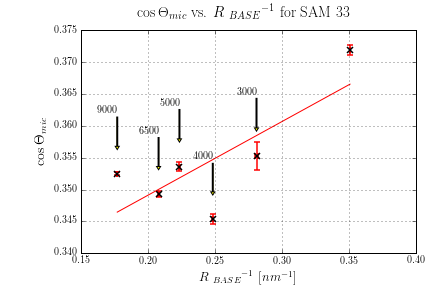

In [45]:
i=33
x = []
y = []
x_error = []
y_error = []
mn=min(len(rbase_w[i]),len(theta_w[i]))
for j in range(mn):
    x.append(1/rbase_w[i][j])
    x_error.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
    y.append(cos(radians(theta_w[i][j])))
    y_error.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j]))

print "Checking vector lengths..."
print len(x),len(y),len(x_error),len(y_error)
print "x=",x
print "y=",y
print "x_error=",x_error
print "y_error=",y_error
    
slope, intercept, delete1, delete2, delete3 = stats.linregress(x,y)

yline=np.zeros(len(x))
m=0
for l in x:
    yline[m] = func(l, slope, intercept)
    m = m+1


# PLOT INSTEAD OF SUBPLOT
plt.figure()
plt.errorbar(x, y, xerr=x_error, yerr=y_error,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(x, yline, color='r')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$',fontsize=13)
plt.ylabel(r' $\cos\Theta_{mic}$ ',fontsize=14)
mytitle = plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(i)+'%', fontsize=15,fontweight='bold')

# Labels next to each point
for j in range(mn):
    xarrow = x[j]
    yarrow =y[j] + ((y[j])*0.01)
    xtext = x[j]
    ytext = y[j] + ((y[j])*0.03)
    plt.annotate(str(equil_rbase_w[i][j]), xy=(xarrow,yarrow), xytext=(xtext,ytext),arrowprops=dict(facecolor='yellow', shrink=0.05,
                                                                                                  width=1, headwidth=4),
                horizontalalignment='right', verticalalignment='top',)
    #ax.annotate(str(equil_rbase[i][j]), xytext=(xtext,ytext), xy=(xarrow,yarrow),horizontalalignment='right', verticalalignment='top',)
    
plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
plt.show()
fig.savefig('s'+str(i)+'_cos_r.jpg',bbox_extra_artists=(mytitle,), bbox_inches='tight')

Checking vector lengths...
4 4 4 4
x= [0.24469616110549999, 0.22874936382640412, 0.20912799719361641, 0.20367762595140748]
y= [0.14881833080499951, 0.1365103055201517, 0.13075630416192119, 0.1399259553609794]
x_error= [0.00065669075195063211, 0.00069253169372071979, 0.00023108550031759593, 0.00033876339886034233]
y_error= [0.0002468786666602156, 0.00086627237048793706, 0.00032220159940773367, 0.00041275119364198709]


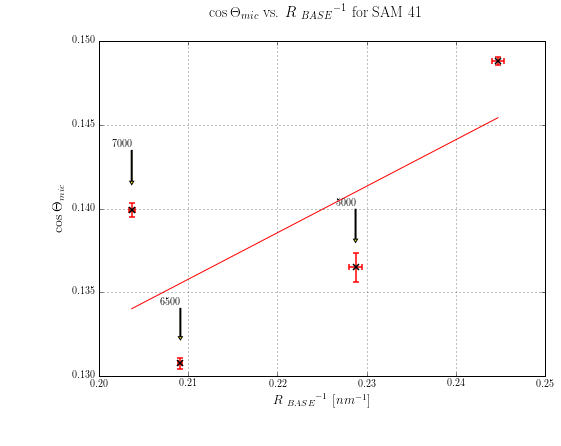

In [76]:
i=41
x = []
y = []
x_error = []
y_error = []
mn=min(len(rbase_w[i]),len(theta_w[i]))
for j in range(mn):
    x.append(1/rbase_w[i][j])
    x_error.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
    y.append(cos(radians(theta_w[i][j])))
    y_error.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j]))

print "Checking vector lengths..."
print len(x),len(y),len(x_error),len(y_error)
print "x=",x
print "y=",y
print "x_error=",x_error
print "y_error=",y_error
    
slope, intercept, delete1, delete2, delete3 = stats.linregress(x,y)

yline=np.zeros(len(x))
m=0
for l in x:
    yline[m] = func(l, slope, intercept)
    m = m+1


# PLOT INSTEAD OF SUBPLOT
plt.figure()
plt.errorbar(x, y, xerr=x_error, yerr=y_error,fmt='x', ecolor='red',elinewidth=1.5, color='black',markeredgewidth=1.5)
plt.plot(x, yline, color='r')

plt.xlabel('${R \ _{BASE}}^{-1}\ [ nm ^{-1} ]$',fontsize=13)
plt.ylabel(r' $\cos\Theta_{mic}$ ',fontsize=14)
mytitle = plt.suptitle(r'$\cos\Theta_{mic}$ vs. ${R \ _{BASE}}^{-1}$ for SAM '+str(i)+'%', fontsize=15,fontweight='bold')

# Labels next to each point
for j in range(mn):
    xarrow = x[j]
    yarrow =y[j] + ((y[j])*0.01)
    xtext = x[j]
    ytext = y[j] + ((y[j])*0.03)
    plt.annotate(str(equil_rbase_w[i][j]), xy=(xarrow,yarrow), xytext=(xtext,ytext),arrowprops=dict(facecolor='yellow', shrink=0.05,
                                                                                                  width=1, headwidth=4),
                horizontalalignment='right', verticalalignment='top',)
    #ax.annotate(str(equil_rbase[i][j]), xytext=(xtext,ytext), xy=(xarrow,yarrow),horizontalalignment='right', verticalalignment='top',)
    
plt.grid(True)
#plt.axis([0.3, 0.9, -1.0, 0.0])
plt.show()
fig.savefig('s'+str(i)+'_cos_r2.jpg',bbox_extra_artists=(mytitle,), bbox_inches='tight')

mn= 7
mn= 8
mn= 7
mn= 7
mn= 6
mn= 6
mn= 6
mn= 4


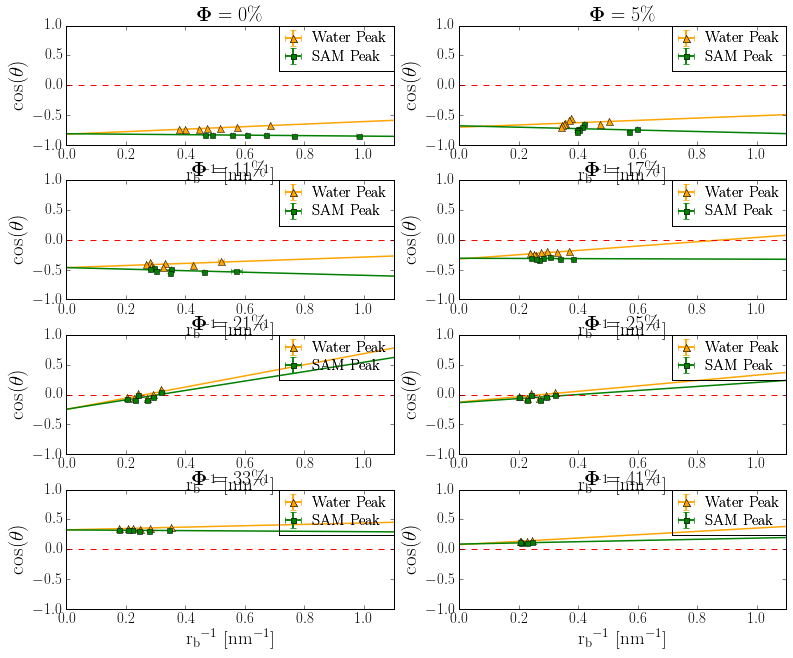

In [67]:
# WITH ERRORBARS: PLOTS SCALED EQUALLY WITH 3 DEFINITIONS OF Z=0
#(for the 3 def. of z=0)
slopes_all_w=[]
intercepts_all_w=[]
#slopes_all_m=[]
#intercepts_all_m=[]
slopes_all_s=[]
intercepts_all_s=[]

line1=[]
line2=[]
line3=[]
line4=[]

Nrows = 4
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows,figsize=(5,1.8))
fig.subplots_adjust(bottom=0.0,top=1.5, left=0.0, right=2, hspace = 0.3)
matplotlib.rcParams['legend.handlelength'] = 1  #the length of the legend handles
matplotlib.rcParams['legend.markerscale'] = 1.5
matplotlib.rcParams['legend.handletextpad'] = 0.7 #the pad between the legend handle and text
matplotlib.rcParams['font.family'] = 'Times New Roman'
#rcParams['legend.numpoints'] = 1

k = 0
for i in SAMs:
    ax = plt.subplot(Nrows, Ncolumns, k+1)
    x_w = []
    y_w = []
    x_error_w = []
    y_error_w = []
    #mn=min(len(rbase_w[i]),len(theta_w[i]))
    mn=len(theta_w[i])
    print "mn=",mn
    for j in range(mn):
        x_w.append(1/rbase_w[i][j])
        x_error_w.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
        y_w.append(cos(radians(theta_w[i][j])))
        y_error_w.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j])) 
    slope, intercept, delete1, delete2, delete3 = stats.linregress(x_w,y_w)
    slopes_all_w.append(slope)
    intercepts_all_w.append(intercept)
    m=0
    l_w=arange(0,1.3,0.1)
    yline_w=np.zeros(len(l_w))
    for l in l_w:
        yline_w[m] = func(l, slope, intercept)
        m = m+1

    # x_m = []
    # y_m = []
    # x_error_m = []
    # y_error_m = [] 
    # #mn=min(len(rbase_m[i]),len(theta_m[i]))
    # mn=len(theta_m[i])
    # for j in range(mn):
    #     x_m.append(1/rbase_m[i][j])
    #     x_error_m.append((rbase_m[i][j]**(-2))*error_rbase_m[i][j])
    #     y_m.append(cos(radians(theta_m[i][j])))
    #     y_error_m.append(cos(radians(theta_m[i][j]))*radians(errortheta_m[i][j]))
    # slope, intercept, delete1, delete2, delete3 = stats.linregress(x_m,y_m)
    # slopes_all_m.append(slope)
    # intercepts_all_m.append(intercept)
    # m=0
    # l_m=arange(0,1.3,0.1)
    # yline_m=np.zeros(len(l_m))
    # for l in l_m:
    #     yline_m[m] = func(l, slope, intercept)
    #     m = m+1
    
    x_s = []
    y_s = []
    x_error_s = []
    y_error_s = []
    #mn=min(len(rbase_s[i]),len(theta_s[i]))
    mn=len(theta_s[i])
    for j in range(mn):
        x_s.append(1/rbase_s[i][j])
        x_error_s.append((rbase_s[i][j]**(-2))*error_rbase_s[i][j])
        y_s.append(cos(radians(theta_s[i][j])))
        y_error_s.append(cos(radians(theta_s[i][j]))*radians(errortheta_s[i][j]))
    slope, intercept, delete1, delete2, delete3 = stats.linregress(x_s,y_s)
    slopes_all_s.append(slope)
    intercepts_all_s.append(intercept)        
    m=0
    #for l in max(x_s):
    l_s=arange(0,1.3,0.1)
    yline_s=np.zeros(len(l_s))
    for l in l_s:
        yline_s[m] = func(l, slope, intercept)
        m = m+1

    #plot of the data points
    line2, = ax.plot(l_w, yline_w,'c',color='orange', linewidth=1.5)
    #line3, = ax.plot(l_m, yline_m ,color='black',linewidth=1.5)
    line4, = ax.plot(l_s, yline_s,'g',linewidth=1.5)
    
    #plot of a black line through y=0
    zeropoints=np.zeros(len(l_w))
    ax.plot(l_w, zeropoints,'r--')

    #plots of errorbars
    ax.errorbar(x_w, y_w,xerr=x_error_w, yerr=y_error_w, fmt='^',color='orange',markersize=7,linewidth=1.5,label='Water Peak')
    #ax.errorbar(x_m, y_m,xerr=x_error_m, yerr=y_error_m, fmt='h',color='gray',markersize=7,linewidth=1.5,label='GDS')
    ax.errorbar(x_s, y_s,xerr=x_error_s, yerr=y_error_s, fmt='gs',markersize=5,linewidth=1.5,label='SAM Peak')
    #other options for errorbars: ecolor='red',elinewidth=1.5, color='red',markeredgewidth=1.5
    
    ax.set_xlim([0,1.1])
    ax.set_ylim([-1,+1])

    # Set bold labels
    #ax.set_xlabel(r'$\mathbf{{r_{b}}^{-1}\ [ nm ^{-1} ]}$',fontsize=19)
    #ax.set_ylabel(r'$\mathbf{cos(\theta)}$',fontsize=19)
    
    # Non-bold labels
    ax.set_xlabel(r'$\mathrm{{r_{b}}^{-1}\ [ nm ^{-1} ]}$',fontsize=19)
    ax.set_ylabel(r'$\mathrm{cos(\theta)}$',fontsize=21)
    
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    #titles for each subplot:
    mysubtitle=ax.set_title('$\mathbf{\Phi= \ }$'+str(i)+'\%',fontweight='bold',fontsize=20)
    plt.setp(mysubtitle, color='black')         #set the color of title to white
    
    # Create a legend for the first line.
    first_legend = plt.legend(loc=1,borderaxespad=0.,markerscale=1,fontsize=16)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    
    
    # Set size of subplots
    fig.subplots_adjust(top=4.5) 
    
    #plt.grid(True)
    k = k + 1

#titletext='On the Same Scale: '+ r'$cos(\theta_{mic})$' +' vs 1/R$\ _{BASE} $ for Three Definitions \n OF $z=0$ Together with Pressure Tensor Results'
#mytitle = plt.suptitle(titletext, fontsize=20, fontweight='bold', x=1.0, y=4.7)

plt.show()
fig.savefig(plotsfolder+'scaled_errors_all_cos_r.jpg',bbox_extra_artists=(first_legend,mysubtitle,), bbox_inches='tight', dpi=400)
fig.savefig('scaled_errors_all_cos_r.jpg',bbox_extra_artists=(first_legend,mysubtitle,), bbox_inches='tight', dpi=400)

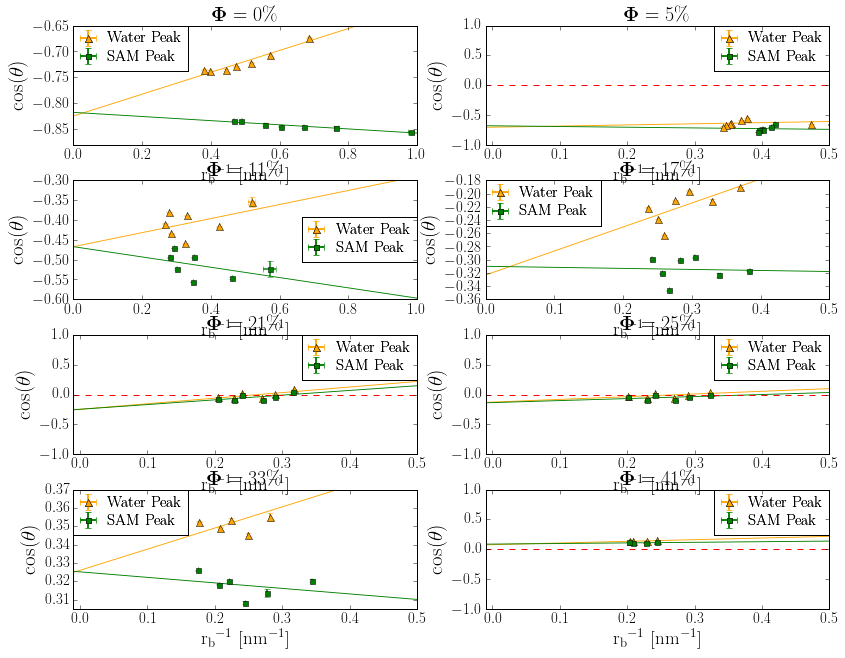

In [68]:
# WITH ERRORBARS: PLOTS SCALED EQUALLY WITH PRESSURE TENSOR RESULTS AND 3 DEFINITIONS OF Z=0
#(for the 3 def. of z=0)
slopes_all_w=[]
intercepts_all_w=[]
#slopes_all_m=[]
#intercepts_all_m=[]
slopes_all_s=[]
intercepts_all_s=[]

line1=[]
line2=[]
line3=[]
line4=[]

Nrows = 4
Ncolumns = 2
fig, ax = plt.subplots(Ncolumns, Nrows ,figsize=(5,1.8),dpi=400)
fig.subplots_adjust(bottom=0.0,top=1.5, left=0.0, right=2.1, hspace = 0.3)

matplotlib.rcParams['legend.handlelength'] = 1  #the length of the legend handles
#matplotlib.rcParams['legend.markerscale'] = 1.5
matplotlib.rcParams['legend.handletextpad'] = 0.7 #the pad between the legend handle and text
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['legend.numpoints'] = 1
matplotlib.rcParams['legend.markerscale'] = 1.5


k = 0
for i in SAMs:
    ax = plt.subplot(Nrows, Ncolumns, k+1)
    x_w = []
    y_w = []
    x_error_w = []
    y_error_w = []
    #mn=min(len(rbase_w[i]),len(theta_w[i]))
    mn=len(theta_w[i])
    for j in range(mn):
        x_w.append(1/rbase_w[i][j])
        x_error_w.append((rbase_w[i][j]**(-2))*error_rbase_w[i][j])
        y_w.append(cos(radians(theta_w[i][j])))
        y_error_w.append(cos(radians(theta_w[i][j]))*radians(errortheta_w[i][j])) 
    slope, intercept, delete1, delete2, delete3 = stats.linregress(x_w,y_w)
    slopes_all_w.append(slope)
    intercepts_all_w.append(intercept)
    m=0
    l_w=arange(-0.1,1.3,0.1)
    yline_w=np.zeros(len(l_w))
    for l in l_w:
        yline_w[m] = func(l, slope, intercept)
        m = m+1

    #x_m = []
    #y_m = []
    #x_error_m = []
    #y_error_m = [] 
    ##mn=min(len(rbase_m[i]),len(theta_m[i]))
    #mn=len(theta_m[i])
    #for j in range(mn):
    #    x_m.append(1/rbase_m[i][j])
    #    x_error_m.append((rbase_m[i][j]**(-2))*error_rbase_m[i][j])
    #    y_m.append(cos(radians(theta_m[i][j])))
    #    y_error_m.append(cos(radians(theta_m[i][j]))*radians(errortheta_m[i][j]))
    #slope, intercept, delete1, delete2, delete3 = stats.linregress(x_m,y_m)
    #slopes_all_m.append(slope)
    #intercepts_all_m.append(intercept)
    #m=0
    #l_m=arange(-0.1,1.3,0.1)
    #yline_m=np.zeros(len(l_m))
    #for l in l_m:
    #    yline_m[m] = func(l, slope, intercept)
    #    m = m+1
    
    x_s = []
    y_s = []
    x_error_s = []
    y_error_s = []
    #mn=min(len(rbase_s[i]),len(theta_s[i]))
    mn=len(theta_s[i])
    for j in range(mn):
        x_s.append(1/rbase_s[i][j])
        x_error_s.append((rbase_s[i][j]**(-2))*error_rbase_s[i][j])
        y_s.append(cos(radians(theta_s[i][j])))
        y_error_s.append(cos(radians(theta_s[i][j]))*radians(errortheta_s[i][j]))
    slope, intercept, delete1, delete2, delete3 = stats.linregress(x_s,y_s)
    slopes_all_s.append(slope)
    intercepts_all_s.append(intercept)        
    m=0
    #for l in max(x_s):
    l_s=arange(-0.1,1.3,0.1)
    yline_s=np.zeros(len(l_s))
    for l in l_s:
        yline_s[m] = func(l, slope, intercept)
        m = m+1
    if intercept<0:
        signtext='x'
    else:
        signtext='x+'

    #plot of the data points   
    ax.plot(l_w, yline_w,'c',color='orange', linewidth=0.9) #1.5
    #ax.plot(l_m, yline_m ,color='black',linewidth=0.9)
    ax.plot(l_s, yline_s,'g',linewidth=0.9)
    
    #plot of a black line through y=0
    zeropoints=np.zeros(len(l_w))
    ax.plot(l_w, zeropoints,'r--')

    #plots of errorbars
    ax.errorbar(x_w, y_w,xerr=x_error_w, yerr=y_error_w, fmt='^',color='orange',markersize=7,linewidth=1.5,label='Water Peak')
    #ax.errorbar(x_m, y_m,xerr=x_error_m, yerr=y_error_m, fmt='h',color='gray',markersize=7,linewidth=1.5,label='GDS')
    ax.errorbar(x_s, y_s,xerr=x_error_s, yerr=y_error_s, fmt='gs',markersize=5,linewidth=1.5,label='SAM Peak')
    #other options for errorbars: ecolor='red',elinewidth=1.5, color='red',markeredgewidth=1.5

            
    if i==0:
        ax.set_xlim([0,1.])
        ax.set_ylim([-0.88,-0.65])
    elif i==5:
        ax.set_xlim([-0.01,0.5])
        ax.set_ylim([-1,1])
    elif i==11:
        ax.set_xlim([0,1.])
        ax.set_ylim([-0.6,-0.3])
    elif i==17:
        ax.set_xlim([0,0.5])
        ax.set_ylim([-0.36,-0.18])
    elif i==21:
        ax.set_xlim([-0.01,0.5])
        ax.set_ylim([-1,1])
    elif i==25:
        ax.set_xlim([-0.01,0.5])
        ax.set_ylim([-1,1])
    elif i==33:
        ax.set_xlim([-0.01,0.5])
        ax.set_ylim([0.305,0.37])
    elif i==41:
        ax.set_xlim([-0.01,0.5])
        ax.set_ylim([-1,1])


    # Set bold labels
    #ax.set_xlabel(r'$\mathbf{{R_{BASE}}^{-1}\ [ nm ^{-1} ]}$',fontsize=15)
    #ax.set_ylabel(r'$\mathbf{cos(\theta_{mic})}$',fontsize=19)
    
    # Set non-bold labels
    ax.set_xlabel(r'$\mathrm{{r_{b}}^{-1}\ [ nm ^{-1} ]}$',fontsize=19)
    ax.set_ylabel(r'$\mathrm{cos(\theta)}$',fontsize=21)
    
    #for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)

    for item in (ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(15)
    
    #titles for each subplot:
    mysubtitle=ax.set_title('$\mathbf{\Phi= \ }$'+str(i)+'\%',fontweight='bold',fontsize=20)
    plt.setp(mysubtitle, color='black')         #set the color of title to white
    
    # Create a legend for the first line.
    first_legend = plt.legend(loc=0,borderaxespad=0.,markerscale=1,fontsize=16)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)    
    
    # Set size of subplots
    fig.subplots_adjust(top=4.5) 
    
    k = k + 1

plt.show()    
#fig.savefig('/Users/burbol2/Dropbox/Apps/Texpad/Diplom/DiplomThesis/subfiles/Methods/Images/all_cos_r_zoom.pdf', format='pdf',bbox_inches='tight',dpi=400)
fig.savefig('all_cos_r_zoom.pdf',format='pdf', bbox_inches='tight',dpi=400)
#plt.show()

In [69]:
print slopes_all_w
print intercepts_all_w
print len(slopes_all_w), len(intercepts_all_w)

#print slopes_all_m
#print intercepts_all_m
#print len(slopes_all_m), len(intercepts_all_m)

print slopes_all_s
print intercepts_all_s
print len(slopes_all_s), len(intercepts_all_s)

[0.21131339408904867, 0.19237420423720969, 0.17718839461569516, 0.36282163852793925, 0.93605143048427897, 0.45324407827937568, 0.11544095697094744, 0.27813597068097362]
[-0.82489013981475501, -0.70833251322215396, -0.46741665701297519, -0.32319373814770197, -0.24854006198064357, -0.12722126514773782, 0.32601228177249791, 0.07737814312763705]
8 8
[-0.04001192626990651, -0.12015798163021379, -0.12979262734341085, -0.015724416471929931, 0.79062428665278106, 0.33920936133766971, -0.030115551078295232, 0.10057951819757976]
[-0.81774728723980517, -0.68425982423744336, -0.46728460766637891, -0.31010656908448297, -0.24771402364835468, -0.13578189180528627, 0.32515272734303363, 0.086466185962743497]
8 8


In [70]:
# WE CALCULATE THE MACROSCOPIC CONTACT ANGLES (theta_mac_w in radians) AND THE LINE TENSIONS (sigma_w)

theta_mac_w=np.zeros(len(intercepts_all_w))
sigma_w=np.zeros(len(slopes_all_w))
for i in range(len(intercepts_all_w)):
    theta_mac_w[i]=arccos(intercepts_all_w[i])
    sigma_w[i]=(-52.7)*slopes_all_w[i]
print "theta_mac_w", theta_mac_w
print "sigma_w",sigma_w

#theta_mac_m=np.zeros(len(intercepts_all_m))
#sigma_m=np.zeros(len(slopes_all_m))
#for i in range(len(intercepts_all_m)):
#    theta_mac_m[i]=arccos(intercepts_all_m[i])
#    sigma_m[i]=(-52.7)*slopes_all_m[i]
#print "theta_mac_m",theta_mac_m
#print "sigma_m",sigma_m

theta_mac_s=np.zeros(len(intercepts_all_s))
sigma_s=np.zeros(len(slopes_all_s))
for i in range(len(intercepts_all_s)):
    theta_mac_s[i]=arccos(intercepts_all_s[i])
    sigma_s[i]=(-52.7)*slopes_all_s[i]
print "theta_mac_s",theta_mac_s
print "sigma_s",sigma_s

theta_mac_w [ 2.54080416  2.35792944  2.05716263  1.89989874  1.82196906  1.6983633
  1.23871401  1.49334076]
sigma_w [-11.13621587 -10.13812056  -9.3378284  -19.12070035 -49.32991039
 -23.88596293  -6.08373843 -14.65776565]
theta_mac_s [ 2.52828256  2.32438454  2.05701326  1.88610145  1.82111635  1.70699895
  1.2396231   1.48422203]
sigma_s [  2.10862851   6.33232563   6.84007146   0.82867675 -41.66589991
 -17.87633334   1.58708954  -5.30054061]


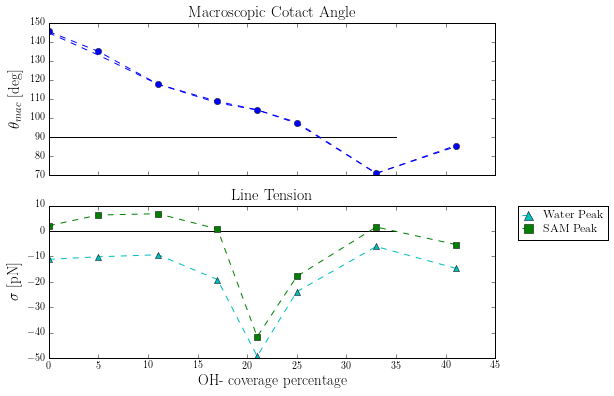

In [72]:
#plots without complete wetting results
# Two subplots, unpack the axes array immediately
fig, axarr = plt.subplots(2, sharex=True,figsize=(8,6), dpi=400)
rcParams['figure.figsize'] = 8, 6 #size of plots

# we mark the zero point with a line
zerox=range(36)
linezero=np.zeros(36)
axarr[1].plot(zerox,linezero,'k-')

# we mark the 90 deg. point with a line for the contact angle
zerox=range(36)
lineninety=36*[90]
axarr[0].plot(zerox,lineninety,'k-')

axarr[0].plot(SAMs,degrees(theta_mac_w),'bo--')
#axarr[0].plot(SAMs,degrees(theta_mac_m),'o--', color='orange')
axarr[0].plot(SAMs,degrees(theta_mac_s),'--')
mytitle1=axarr[0].set_title('Macroscopic Cotact Angle',fontsize=16, fontweight='bold')

axarr[1].plot(SAMs,sigma_w,'c^--',label="Water Peak")
#axarr[1].plot(SAMs,sigma_m,'o--', color='orange',label="Middle Point")
axarr[1].plot(SAMs,sigma_s,'gs--',label="SAM Peak")
axarr[1].set_title('Line Tension',fontsize=16, fontweight='bold')

axarr[0].set_ylabel(r'$\theta_{mac}$ [deg]',fontsize=15)
axarr[1].set_ylabel('$\sigma$ [pN]',fontsize=15)
axarr[1].set_xlabel('OH- coverage percentage',fontsize=15)

first_legend=axarr[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
fig.savefig('subplt_alltheta_mac_sigma2.jpg',bbox_extra_artists=(first_legend,mytitle1,), bbox_inches='tight')

In [73]:
# we add the results of SAM 50% and SAM 60% to sigma (in sigma2) and to theta_mac (in theta_mac2)
# and change all the types to list (incl. percentages-> percentages2)

sigma2_w=list(sigma_w)
sigma2_w=sigma2_w+[0,0]
print sigma2_w

theta_mac2_w=list(theta_mac_w)
theta_mac2_w=theta_mac2_w+[0,0]
print theta_mac2_w

#sigma2_m=list(sigma_m)
#sigma2_m=sigma2_m+[0,0]
#print sigma2_m

#theta_mac2_m=list(theta_mac_m)
#theta_mac2_m=theta_mac2_m+[0,0]
#print theta_mac2_m

sigma2_s=list(sigma_s)
sigma2_s=sigma2_s+[0,0]
print sigma2_s

theta_mac2_s=list(theta_mac_s)
theta_mac2_s=theta_mac2_s+[0,0]
print theta_mac2_s

percentages2=list(percentages)
print percentages2

[-11.136215868492865, -10.138120563300951, -9.3378283962471347, -19.1207003504224, -49.329910386521505, -23.885962925323099, -6.0837384323689303, -14.65776565488731, 0, 0]
[2.5408041571597737, 2.3579294429614985, 2.0571626287298326, 1.8998987350211523, 1.8219690572584781, 1.6983633005003411, 1.238714012673366, 1.4933407595270864, 0, 0]
[2.1086285144240731, 6.3323256319122674, 6.840071460997752, 0.82867674807070735, -41.665899906601567, -17.876333342495194, 1.5870895418261588, -5.3005406090124536, 0, 0]
[2.5282825620182807, 2.3243845431881089, 2.0570132638142842, 1.8861014523612343, 1.8211163526933263, 1.706998947455902, 1.2396231000078817, 1.4842220340723888, 0, 0]
[0, 5, 11, 17, 21, 25, 33, 41, 50, 66]


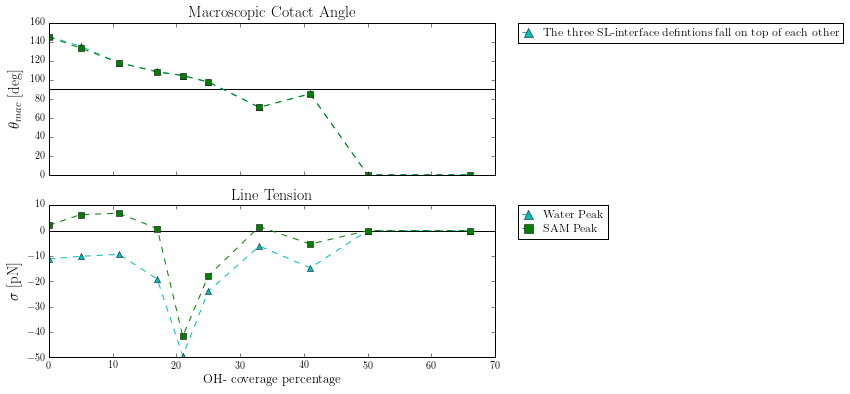

In [75]:
# plots with complete wetting results AND with pressure tensor results
# Two subplots, unpack the axes array immediately
fig, axarr = plt.subplots(2, sharex=True)

# we mark the zero point with a line for the line tension
zerox=range(71)
linezero=np.zeros(71)
axarr[1].plot(zerox,linezero,'k-')

# we mark the 90 deg. point with a line for the contact angle
zerox=range(71)
lineninety=71*[90]
axarr[0].plot(zerox,lineninety,'k-')

axarr[0].plot(percentages2,degrees(theta_mac2_w), 'c^--',label='The three SL-interface defintions fall on top of each other')
#axarr[0].plot(percentages2,degrees(theta_mac2_m),'--', color='orange')
axarr[0].plot(percentages2,degrees(theta_mac2_s),'gs--')
mytitle1=axarr[0].set_title('Macroscopic Cotact Angle',fontsize=16, fontweight='bold')

#line2, =axarr[0].plot(percentages2,ptensor,'rs--',label='Pressure Tensor Method')

axarr[1].plot(percentages2,sigma2_w,'c^--',label="Water Peak")
#axarr[1].plot(percentages2,sigma2_m,'o--',color='orange',label="GDS")
axarr[1].plot(percentages2,sigma2_s,'gs--',label="SAM Peak")
axarr[1].set_title('Line Tension',fontsize=16, fontweight='bold')

axarr[0].set_ylabel(r'$\theta_{mac}$ [deg]',fontsize=15)
axarr[1].set_ylabel('$\sigma$ [pN]',fontsize=15)
axarr[1].set_xlabel('OH- coverage percentage',fontsize=13)

first_legend=axarr[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
second_legend=axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
fig.savefig('subplt2_theta_mac_sigma2.jpg',bbox_extra_artists=(first_legend,second_legend,mytitle1,), bbox_inches='tight')

In [ ]:
# This plot is done to get the 2 plots side by side, because otherwise Latex makes the figures so small 
# that the axes cannot be distinguisehd anymore.
fig = plt.figure()
fig.subplots_adjust(bottom=0.0,top=0.5, left=0, right=1.5, hspace = 0.5)

axarr0 = fig.add_subplot(121)

# we mark the 90 deg. point with a line for the contact angle
zerox=range(71)
lineninety=71*[90]
axarr0.plot(zerox,lineninety,'k-')

axarr0.plot(percentages2,degrees(theta_mac2_w),'bo--',label='Mac. Contact Angle')
#axarr0.plot(percentages2,degrees(theta_mac2_m),'--', color='orange')
axarr0.plot(percentages2,degrees(theta_mac2_s),'--')
#mytitle1=axarr0.set_title('Macroscopic Cotact Angle',fontsize=16, fontweight='bold')
axarr0.set_ylabel(r'$\mathbf{\theta_{\infty} \ [deg]}$',fontsize=19)
axarr0.set_xlabel(r'$\mathbf{\Phi} \ [\%]$',fontsize=18)
axarr0.set_xticks(percentages2)
axarr0.set_yticks([0,30,60,90,120,150,180])

#line2, =axarr[0].plot(percentages2,ptensor,'rs--',label='Pressure Tensor Method')
axarr1 = fig.add_subplot(122)

# we mark the zero point with a line for the line tension
zerox=range(41)
linezero=np.zeros(41)
axarr1.plot(zerox,linezero,'k-')

axarr1.plot(SAMs,sigma_w,'c^--',label="Water Peak")
#axarr1.plot(SAMs,sigma_m,'o--', color='orange',label="Middle Point")
axarr1.plot(SAMs,sigma_s,'gs--',label="SAM Peak")
#axarr1.set_title('Line Tension',fontsize=16, fontweight='bold')

axarr1.set_ylabel(r'$\mathbf{\tau \ [pN]}$',fontsize=20)
axarr1.set_xlabel(r'$\mathbf{\Phi} \ [\%]$',fontsize=19)
axarr1.set_xlim([0,33])
axarr1.set_xticks(SAMs)

for item in (axarr0.get_xticklabels() + axarr0.get_yticklabels() + axarr1.get_xticklabels() + axarr1.get_yticklabels()):item.set_fontsize(15)
    
first_legend=axarr1.legend(loc=0, borderaxespad=0.,fontsize=18)
second_legend=axarr0.legend(loc=0, borderaxespad=0.,fontsize=18)

plt.show()
fig.savefig('subplt_theta_mac_tau.jpg',bbox_extra_artists=(first_legend,second_legend,), bbox_inches='tight', dpi=400)

In [ ]:
#Separate plot of macroscopic contact angle
plt.figure(figsize=(6.5,4.5), dpi=400)

# we mark the 90 deg. point with a line for the contact angle
zerox=range(71)
lineninety=71*[90]
plt.plot(zerox,lineninety,'r-')

#plt.plot(percentages2,degrees(theta_mac2_w),'-')
#plt.plot(percentages2,degrees(theta_mac2_m),'h-', color='orange')
plt.plot(percentages2,degrees(theta_mac2_s),'bh', label='Mac.Contact Angle',markersize=7)

#Interpolation until 50% using the next cell!
#plt.plot(xnew2, myfunction2_w(xnew2),'--')

#mytitle1=plt.suptitle('Macroscopic Cotact Angle',fontsize=20, fontweight='bold')

ylabel(r'$\mathbf{\theta_{\infty} \ [deg]}$',fontsize=22)
xlabel(r'$\mathbf{\Phi} \ [\%]$',fontsize=22)

first_legend = plt.legend(loc=0,handletextpad=0.1,borderpad=0.3,fontsize=19,markerscale=1)

xticks(percentages2,fontsize=16)
yticks([0,30,60,90,120,150,180],fontsize=16)
ylim(-0.5,180)
xlim(-0.5,70)

#resultsfolder = '/Users/burbol2/Dropbox/Apps/Texpad/Diplom/DiplomThesis/subfiles/Results/Images/'
#plt.savefig(resultsfolder+'plt_theta_mac_phi.eps', bbox_inches='tight',dp
plt.savefig('plt_theta_mac_phi.eps', bbox_inches='tight',dpi=400)
plt.show()

In [ ]:
# Interpolation on mac. contact angle
xnew2 = np.linspace(0, 50, 100)

print list(degrees(theta_mac_s))+[0]
print SAMs+[50]
myfunction2_w = interp1d(SAMs+[50], list(degrees(theta_mac_s))+[0], kind='cubic')

plt.plot(percentages2,theta_mac2_s,'o', xnew2, myfunction2_w(xnew2),'--')

plt.show()

In [ ]:
#Separate plot of Line Tension
plt.figure(figsize=(6.5,4.5), dpi=400)

# we mark the zero point with a line for the line tension
zerox=range(71)
linezero=np.zeros(71)
plt.plot(zerox,linezero,'r--')

plt.plot(SAMs,sigma_w,'^',color='orange',label="Water Peak",markersize=7)
#plt.plot(SAMs,sigma_m,'h', color='gray',label="GDS",markersize=7)
plt.plot(SAMs,sigma_s,'s',color='green',label="SAM Peak")

xlim(-0.3,33.3)

ylabel(r'$\mathbf{\tau \ [pN]}$',fontsize=22)
xlabel(r'$\mathbf{\Phi} \ [\%]$',fontsize=22)

first_legend = plt.legend(loc=0,handletextpad=0.1,borderpad=0.3,fontsize=19,markerscale=1)

xticks(SAMs,fontsize=16)
yticks(fontsize=16)

#plt.savefig('plt_tau_phi.eps', bbox_inches='tight',dpi=400)
#plt.show()

print sigma_w
#print sigma_m
print sigma_s

In [ ]:
# Interpolation of line tensions
xnew = np.linspace(0, 41, 100)
myfunction_w = interp1d(SAMs, sigma_w, kind='cubic')
#myfunction_m = interp1d(SAMs, sigma_m, kind='cubic')
myfunction_s = interp1d(SAMs, sigma_s, kind='cubic')
plt.plot(SAMs,sigma_w,'o', xnew, myfunction_w(xnew),'--')
#plt.plot(SAMs,sigma_m,'o', xnew, myfunction_m(xnew),'--')
plt.plot(SAMs,sigma_s,'o', xnew, myfunction_s(xnew),'--')
plt.show()

In [ ]:
print len(SAMs)
>>> from scipy.interpolate import splev, splrep
>>> tck = splrep(SAMs[0:7], sigma_w[0:7])
>>> x2 = np.linspace(0, 41, 200)
>>> y2 = splev(x2, tck)
>>> plt.plot(x, y, 'o', x2, y2)
>>> plt.show()

In [ ]:
#Separate plot of Line Tension
plt.figure(figsize=(6.5,4.5), dpi=400)

# we mark the zero point with a line for the line tension
zerox=range(71)
linezero=np.zeros(71)
plt.plot(zerox,linezero,'r-')

plt.plot(SAMs,sigma_w,'^',color='orange',label="Water Peak",markersize=7)
#plt.plot(SAMs,sigma_m,'h', color='gray',label="GDS",markersize=7)
plt.plot(SAMs,sigma_s,'s',color='green',label="SAM Peak")

# Interpolation of line tensions
myfunction_w = interp1d(SAMs, sigma_w, kind='cubic')
#myfunction_m = interp1d(SAMs, sigma_m, kind='cubic')
myfunction_s = interp1d(SAMs, sigma_s, kind='cubic')
plt.plot(xnew, myfunction_w(xnew),'--',color='orange')
#plt.plot(xnew, myfunction_m(xnew),'--',color='black')
plt.plot(xnew, myfunction_s(xnew),'--',color='green')

xlim(-0.3,33.3)

ylabel(r'$\mathbf{\tau \ [pN]}$',fontsize=22)
xlabel(r'$\mathbf{\Phi} \ [\%]$',fontsize=22)

first_legend = plt.legend(bbox_to_anchor=(0.39, 0.3),loc=0,handletextpad=0.1,borderpad=0.1,fontsize=19,markerscale=1) 
#borderaxespad=0.2

xticks(SAMs,fontsize=16)
yticks(fontsize=16)

#resultsfolder = '/Users/burbol2/Dropbox/Apps/Texpad/Diplom/DiplomThesis/subfiles/Results/Images/'
plt.savefig('plt_tau_phi.eps', bbox_inches='tight',dpi=400)
#plt.savefig(resultsfolder+'plt_tau_phi.eps', bbox_inches='tight',dpi=400)
plt.show()

print sigma_w
print sigma_m
print sigma_s

In [ ]:
x2_w=sigma_w
y2_w=cos(theta_mac_w)

x2_m=sigma_m
y2_m=cos(theta_mac_m)

x2_s=sigma_s
y2_s=cos(theta_mac_s)
print "x=",x2_w
print "y=",y2_w

fig = plt.figure()
fig.subplots_adjust(bottom=0.0,top=0.5, left=0, right=1.5, hspace = 0.5)

ax1 = fig.add_subplot(121)

zerox=frange(min(degrees(arccos(y2_w))),max(degrees(arccos(y2_w))))
linezero=np.zeros(len(zerox))
ax1.plot(zerox,linezero,'k-')

ax1.plot(degrees(arccos(y2_w)),x2_w,'c^-',label="Water Peak")
ax1.plot(degrees(arccos(y2_m)),x2_m,'o-',color='orange',label="Middle Point")
ax1.plot(degrees(arccos(y2_s)),x2_s,'gs-',label="SAM Peak")
ax1.set_xlim([min(degrees(arccos(y2_w))),max(degrees(arccos(y2_w)))])
ax1.set_ylim([-15,15])

ax2  = fig.add_subplot(122)

zerox=frange(min(y2_w),max(y2_w),0.1)
print zerox
linezero=np.zeros(len(zerox))
ax2.plot(zerox,linezero,'k-')

ax2.plot(y2_w,x2_w,'c^-',label="Water Peak")
ax2.plot(y2_m,x2_m,'o-',color='orange',label="Middle Point")
ax2.plot(y2_s,x2_s,'gs-',label="SAM Peak")
ax2.set_xlim([min(y2_w),max(y2_w)])
ax2.set_ylim([-15,15])

#ax.set_yticklabels(y_label, fontsize=20)
ax1.set_ylabel(r'$\mathbf{\tau \ [pN]}$',fontsize=19)
ax1.set_xlabel(r'$\mathbf{\theta_{\infty} [deg]}$',fontsize=19)

ax2.set_xlabel(r'$cos(\theta_{\infty})$ ',fontsize=19)
ax2.set_ylabel(r'$\mathbf{\tau \ [pN]}$',fontsize=19)

for item in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):item.set_fontsize(15)
first_legend=ax1.legend(loc=0, borderaxespad=0., fontsize=15)
second_legend=ax2.legend(loc=0, borderaxespad=0., fontsize=15)

#plt.grid(which='major', axis='both') #(use grid if numbers are changed)

fig.savefig('newview_theta_mac_tau.eps',bbox_extra_artists=(first_legend,second_legend,), bbox_inches='tight',dpi=1000)
plt.show()

In [ ]:
plt.figure(figsize=(6,4), dpi=400)

x2_w=sigma_w
y2_w=theta_mac_w

x2_m=sigma_m
y2_m=theta_mac_m

x2_s=sigma_s
y2_s=theta_mac_s
print "x=",x2_w
print "y=",y2_w


zerox=frange(min(degrees(y2_w)),max(degrees(y2_w)))
linezero=np.zeros(len(zerox))
plt.plot(zerox,linezero,'r--')

plt.plot(degrees(y2_w),x2_w,'^-',color='orange',label="Water Peak")
plt.plot(degrees(y2_w),x2_m,'h-',color='gray',label="GDS")
plt.plot(degrees(y2_w),x2_s,'s-',color='green',label="SAM Peak")

xlim([min(degrees(y2_w)),max(degrees(y2_w))])
ylim(-15,15)
xticks(fontsize=15)
yticks(fontsize=15)

#Labels with symbols
ylabel(r'$\mathbf{\tau \ [pN]}$',fontsize=19)
xlabel(r'$\mathbf{\theta_{\infty} [deg]}$',fontsize=19)

#Labels with names
#ylabel('Line tension [pN]',fontsize=19)
#xlabel('Mac. contact angle [deg]',fontsize=19)


#first_legend=plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1.1,handlelength=0.4,handletextpad=0.3)


#plt.grid(which='major', axis='both') #(use grid if numbers are changed)

#plt.savefig('newview_theta_mac_tau2.jpg',bbox_extra_artists=(first_legend,mytitle,), bbox_inches='tight',dpi=1000)
#plt.savefig('newview_theta_mac_tau2.jpg',bbox_inches='tight',dpi=400)
plt.show()

In [ ]:
#NOW WE PLOT AGAIN TAU vs. THETA_MAC BUT INTERPOLATING THE DATA POINTS
plt.figure(figsize=(6,4), dpi=400)

x2_w=sigma_w
y2_w=theta_mac_w

x2_m=sigma_m
y2_m=theta_mac_m

x2_s=sigma_s
y2_s=theta_mac_s
print "x=",x2_w
print "y=",y2_w


zerox=frange(min(degrees(y2_w)),max(degrees(y2_w)))
linezero=np.zeros(len(zerox))
plt.plot(zerox,linezero,'r-')


# Interpolation of line tensions
xnew3_w = np.linspace(min(degrees(y2_w)), max(degrees(y2_w)), 100)
xnew3_m = np.linspace(min(degrees(y2_m)), max(degrees(y2_m)), 100)
xnew3_s = np.linspace(min(degrees(y2_s)), max(degrees(y2_s)), 100)

myfunction3_w = interp1d(degrees(y2_w), x2_w, kind='cubic')
myfunction3_m = interp1d(degrees(y2_m), x2_m, kind='cubic')
myfunction3_s = interp1d(degrees(y2_s), x2_s, kind='cubic')

plt.plot(xnew3_w, myfunction3_w(xnew3_w),'--',color='orange')
plt.plot(xnew3_m, myfunction3_m(xnew3_m),'--',color='black')
plt.plot(xnew3_s, myfunction3_s(xnew3_s),'--',color='green')

plt.plot(degrees(y2_w),x2_w,'^',color='orange',label="Water Peak")
plt.plot(degrees(y2_w),x2_m,'h',color='gray',label="GDS")
plt.plot(degrees(y2_w),x2_s,'s',color='green',label="SAM Peak")

xlim([min(degrees(y2_w)),max(degrees(y2_w))])
ylim(-20,15)
xticks(fontsize=15)
yticks(fontsize=15)

#Labels with symbols
ylabel(r'$\mathbf{\tau \ [pN]}$',fontsize=19)
xlabel(r'$\mathbf{\theta_{\infty} [deg]}$',fontsize=19)

#Labels with names
#ylabel('Line tension [pN]',fontsize=19)
#xlabel('Mac. contact angle [deg]',fontsize=19)


#first_legend=plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1.1,handlelength=0.4,handletextpad=0.3)


#plt.grid(which='major', axis='both') #(use grid if numbers are changed)

plt.savefig('newview_theta_mac_tau2.jpg',bbox_inches='tight',dpi=400)
resultsfolder = '/Users/burbol2/Dropbox/Apps/Texpad/Diplom/DiplomThesis/subfiles/Results/Images/'
plt.savefig(resultsfolder+'newview_theta_mac_tau2.jpg', bbox_inches='tight',dpi=400)
plt.show()

In [ ]:
plt.figure(figsize=(6,4), dpi=400)
b=0
c=9000
#n=Waters.index(c)
n = c

minblocksize=20 # The minimum block size is 10ns=20 points
beg = 10 # We leave out the first 5ns=10 points
blocksNum=3 #the function best_start uses also 3 blocks for averaging
#matplotlib.rcParams['legend.handlelength'] = 1

print c," molec:"
    
rbase2_w = array(angles_w[(b, c)])
rbase2_m = array(angles_m[(b, c)])
rbase2_s = array(angles_s[(b, c)])
    
end=endpoint(rbase2_m)
start=best_start(rbase2_m,t,beg,minblocksize)

if start != None:
    avrg_w = np.ones(end - start)
    avrg_m = np.ones(end - start)
    avrg_s = np.ones(end - start)
        
    t_avrg_w = t[start:end]
    t_avrg_m = t[start:end]
    t_avrg_s = t[start:end]
        
    rbasemean, errrorbar =blockAverage((rbase2_w[start:end]),blocksNum) 
    avrg_w = rbasemean*avrg_w
        
    rbasemean, errrorbar =blockAverage((rbase2_m[start:end]),blocksNum)        
    avrg_m = rbasemean*avrg_m
        
    rbasemean, errrorbar =blockAverage((rbase2_s[start:end]),blocksNum)        
    avrg_s = rbasemean*avrg_s
                     
    plt.plot(t_avrg_w, avrg_w,'-',color='orange',linewidth=4)
    plt.plot(t_avrg_m, avrg_m,'-',color='black', linewidth=4)
    plt.plot(t_avrg_s, avrg_s,'-',color='green',linewidth=4)
        
    titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)
        
else:
    start=end-20
    titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'
    


plt.plot(t, rbase2_w,'^',color='orange',label="Water Peak",markersize=7.0)
plt.plot(t, rbase2_m,'h', color='gray',label="GDS",markersize=6.0)
plt.plot(t,rbase2_s,'s',color='lightgreen',label="SAM Peak",markersize=5.0)
    
xlim(t[0],t[end-1])
#ylim(-15,15)

xticks(fontsize=15)
yticks(fontsize=15)

#xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
xlabel(r'$\mathrm{time \ [ns]}$',fontsize=20)
ylabel('contact angle [deg]',fontsize=23)
#ylabel('Base radius [nm]',fontsize=23)
    
#plt.legend(fontsize=16)

# Create a legend for the first line.
first_legend = plt.legend(loc=0,borderaxespad=0.,borderpad=0.3,fontsize=16,numpoints=1, markerscale=1,handlelength=0.4,handletextpad=0.3)

thetitle = plt.suptitle(titletext,fontsize=20,fontweight='bold')


#mytitle = plt.suptitle(r'Contact Angle $\rbase_{mic}$ vs. Time for SAM'+str(b)+'%', fontsize=19, fontweight='bold',x=0.7, y=4.65)
#plt.show()
plotsfolder="/Users/burbol2/Dropbox/Apps/Texpad/Diplom/DiplomThesis/subfiles/Methods/Images/"
plt.savefig(plotsfolder+'c_angle_t_s'+str(b)+'w'+str(n)+'.eps',bbox_extra_artists=(first_legend,thetitle,), bbox_inches='tight',dpi=400)

In [ ]:
plt.figure(figsize=(6,4), dpi=400)
b=0
c=8000
n=c    
#n=Waters.index(c)

theta2 = array(angles_w[(b, c)])
    
end=endpoint(theta2)
start=best_start(theta2,t,beg,minblocksize)    
print "for SAM ",b,"% and ", c, " molecules:"
    
if start == None:
    print " Not equilibrated!"
    sampling = 0
    end = endpoint(theta2)
    start = end-40
    slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
    thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
    titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)+': Not equilibrated'

else:
    slope, intercept, delete1, delete2, delete3 = stats.linregress(t[start:end],theta2[start:end])
    thetamean, errrorbar =blockAverage((theta2[start:end]),blocksNum)
    sampling = (end-start)/2.
    m=str(round(abs(slope)*(end-start)/2.,3))
    text='std.dev. '+str(round(2*errrorbar,3))+'$^\circ \geq $'+m+'$^\circ $ shift'

    titletext = r'$\Phi=\ $'+str(b)+'\%, $n_{W}=\ $'+str(c)

plt.plot(t[start:end], theta2[start:end],'-',color='orange',linewidth=1.5)   
plt.plot(t[start:end], func(t[start:end], 0, thetamean+errrorbar),'k-',linewidth=1.5)
plt.plot(t[start:end], func(t[start:end], 0, thetamean-errrorbar),'k-',linewidth=1.5) 
plt.plot(t[start:end], func(t[start:end], slope, intercept),color='blue', label=text,linewidth=1.5)
    
    
xticks(fontsize=15)
yticks(fontsize=15)
xlim([t[start],t[end-1]]) 

#xlabel(r'$\mathbf{t [ns]}$',fontsize=20)
xlabel(r'$\mathrm{time\ [ns]}$',fontsize=20)
ylabel('contact angle [deg]',fontsize=23)
#ylabel('Base radius [nm]',fontsize=23)
    
#plt.legend(fontsize=16)

# Create a legend for the first line.
#plt.legend(loc=0,borderaxespad=0.,borderpad=0.2,fontsize=16,numpoints=1, markerscale=2,handletextpad=1)

thetitle = plt.suptitle(titletext,fontsize=20,fontweight='bold')

#plt.show()
plotsfolder="/Users/burbol2/Dropbox/Apps/Texpad/Diplom/DiplomThesis/subfiles/Methods/Images/"
plt.savefig(plotsfolder+'equil_theta_t_s'+str(b)+'w'+str(n)+'.eps', bbox_inches='tight',dpi=400)

In [ ]:
# IN THIS CELL WE SAVE THE SPHERE RADIUS AND MIC. CONTACT ANGLES TO .txt FILES (FOR THE GDS Interface definition)

txtoutput='Mic_C_Angle_and_Rc_GDS.txt'
    
with open(txtoutput, 'w') as myfile:

    # We write the first line of the output file: the titles of the 3 columns of data
    print >> myfile, '{0}  {1}  {2}  {3}  {4}'.format('Sphere radius', 'Mic. contact angle', 'Base radius','SAM', 'Water molecs.')
    print 'Sphere radius//', 'Mic. contact angle//','Base radius//', 'SAM//', 'Water molecs.//'

    for b in SAMs:
    
        new_rbase=rbase_m[b]
        new_theta=theta_m[b]

        new_i = 0
        for c in equil_rbase_w[b]:
        
            sphere_R = new_rbase[new_i]/cos(radians(new_theta[new_i]-90))
    
            print >> myfile, '{0} {1} {2} {3} {4}'.format(sphere_R, new_theta[new_i],new_rbase[new_i], b, c)
            print sphere_R, new_theta[new_i],new_rbase[new_i], b, c
            
            new_i = new_i + 1

In [ ]:
print sigma_m, theta_mac_m

In [ ]:
# IN THIS CELL WE SAVE THE SPHERE RADIUS AND MIC. CONTACT ANGLES TO .txt FILES (FOR THE GDS Interface definition)

txtoutput='LineTension_and_MacAngle.txt'
    
with open(txtoutput, 'w') as myfile:

    # We write the first line of the output file: the titles of the 3 columns of data
    print >> myfile, '{0}  {1}  {2} '.format('Line Tension', 'Mac. contact angle','SAM')
    print 'Line Tension// Mac. contact angle// SAM'

    new_i = 0
    for b in SAMs:
    
        print >> myfile, '{0} {1} {2}'.format(sigma_m[new_i], theta_mac_m[new_i], b)
        print sigma_m[new_i], theta_mac_m[new_i], b
        
        new_i = new_i + 1